# Linear Regression Using Gradient Descent

In [1]:
%matplotlib inline
import numpy as np                                         # Import the required paackages
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('multivarient.csv')                  # Read csv as Pandas DataFrame

print("Shape of DataFrame ",data.shape)
data.head()                                             # DataFrame Sample display

Shape of DataFrame  (1000, 3)


Math  Reading  Writing
0    48       68       63
1    62       81       72
2    79       80       78
3    76       83       79
4    59       64       62

In [2]:
data.describe()                    # Explore the Basic Info about the DataFrame

Math      Reading      Writing
count  1000.000000  1000.000000  1000.000000
mean     67.290000    69.872000    68.616000
std      15.085008    14.657027    15.241287
min      13.000000    19.000000    14.000000
25%      58.000000    60.750000    58.000000
50%      68.000000    70.000000    69.500000
75%      78.000000    81.000000    79.000000
max     100.000000   100.000000   100.000000

### Get Value of required Fields:

In [3]:
x = data['Reading'].values       
y = data['Writing'].values

### Create an Numpy Array of independent Variable

In [4]:
num = len(x)
x0 = np.ones(num)               
X = np.array([x0, x]).T

In [5]:
# Initial Coefficients
B = np.array([0, 0])
Y = np.array(y)
alpha = 0.0001

In [6]:
# Declare the Cost Function to calculate Error

def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [7]:
# Calcualte the initial Cost of the Data

inital_cost = cost_function(X, Y, B)
print(inital_cost)

2470.11


In [8]:
# Declare the function to plot the best_fit Line
def plot_best_fit_line(B,read):
    slope=B[1]
    intercept=B[0]
    Y_pred=slope*read + intercept   # Calculate the predicted Y Values as per given X
    plt.figure(figsize=(20,10))
    plt.scatter(read,Y,color='blue')
    plt.plot(read,Y_pred,color="red")
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title("Linear Regression ",fontsize=30)
    plt.xlabel("Independent Variable",fontsize=20)
    plt.ylabel("Dependent Variable",fontsize=20)
    plt.legend( ['Best Fit Line', 'Data Points'],prop={'size': 18})
#     plt.savefig(str(time.time()).replace(".","_")+'.png')
    plt.savefig("foo.png")
    plt.show()

In [9]:
# Declare the gradient descent where the learing take place

def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        h = X.dot(B)
        # Difference b/w actual and Actual Y
        loss = h - Y
        # Gradient calc
        gradient = X.T.dot(loss) / m
        # Update Values of B using Gradient
        B = B - alpha * gradient
        # latest cost value
        cost = cost_function(X, Y, B)
        # append cost value 
        cost_history[iteration] = cost
        # plot the best fit to see how the algorithm works
        plot_best_fit_line(B,x)
        
        
    return B, cost_history

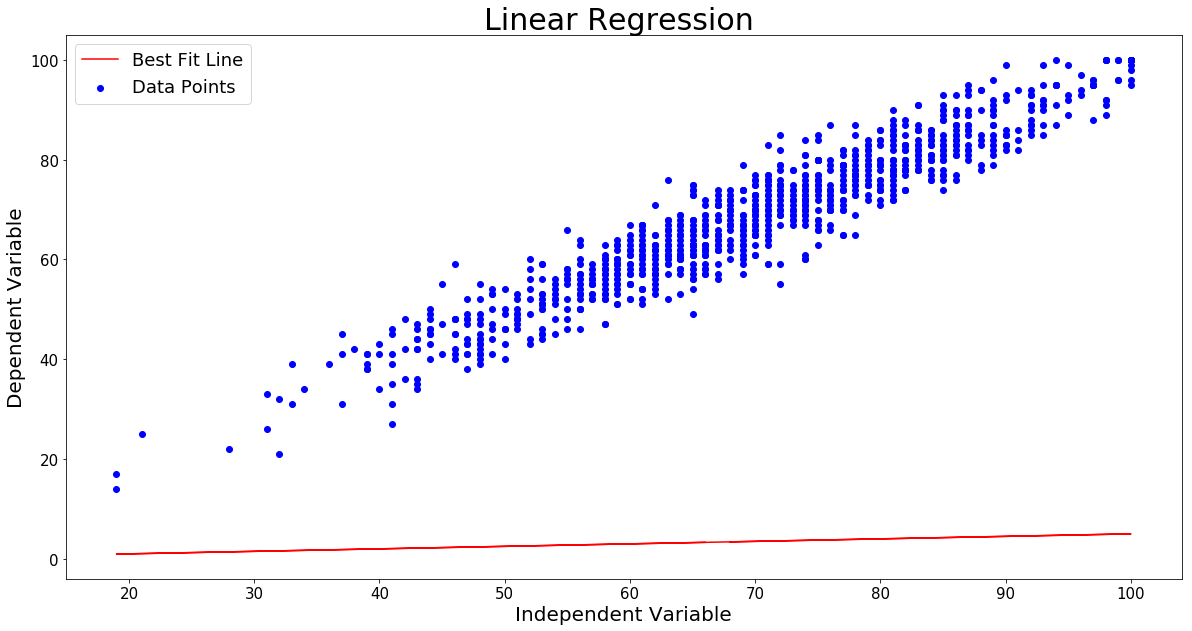

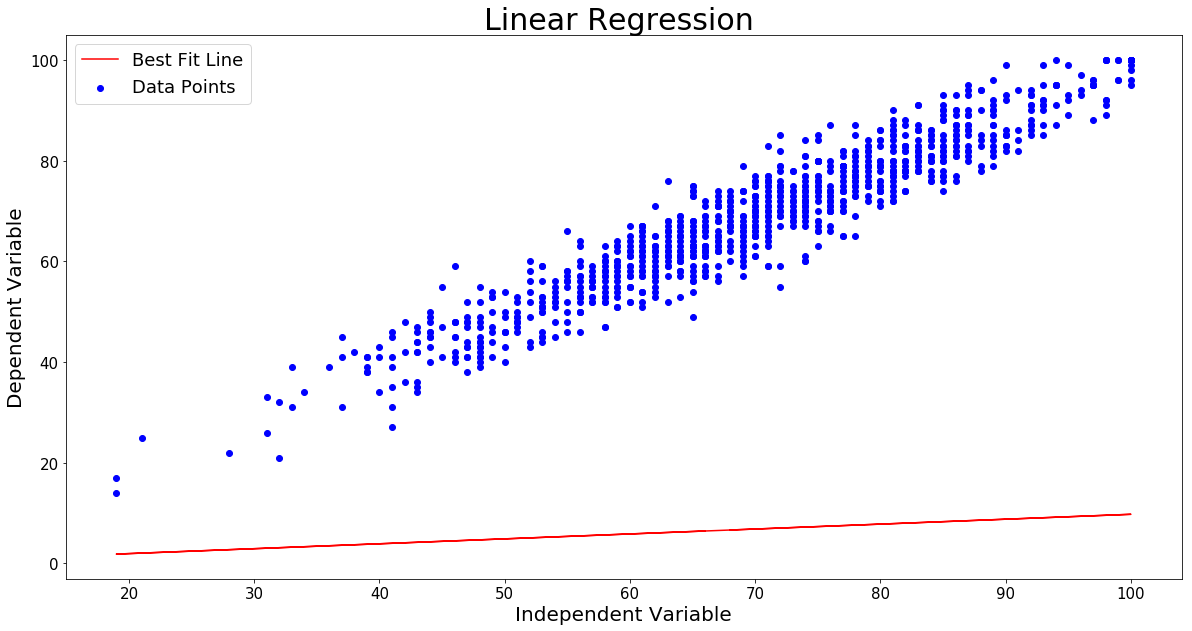

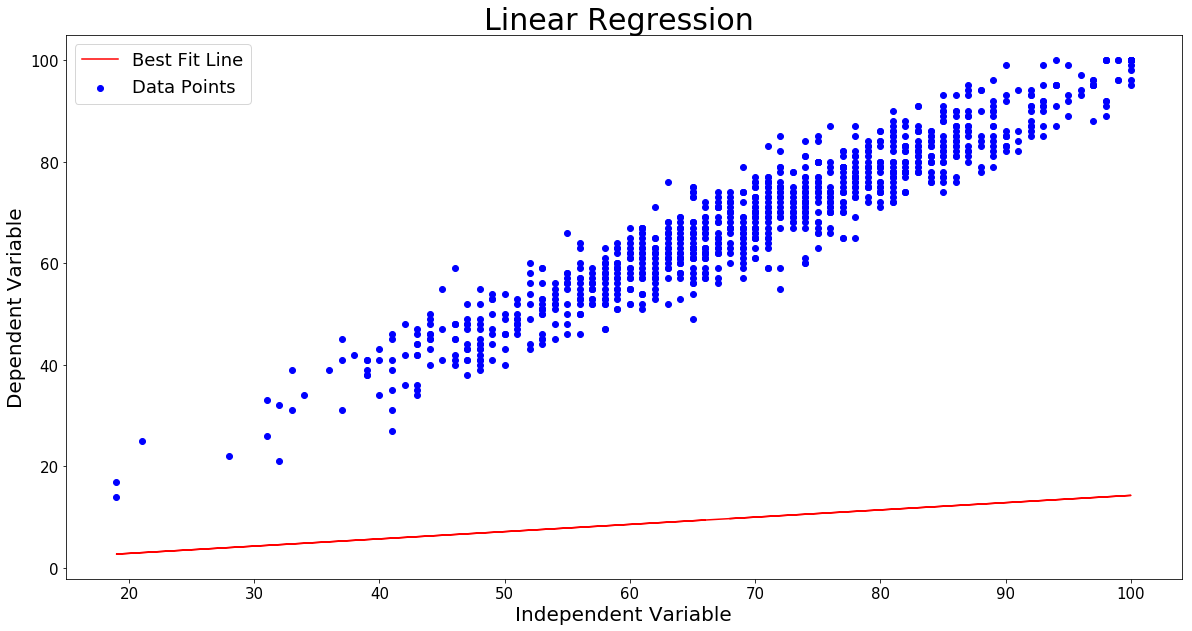

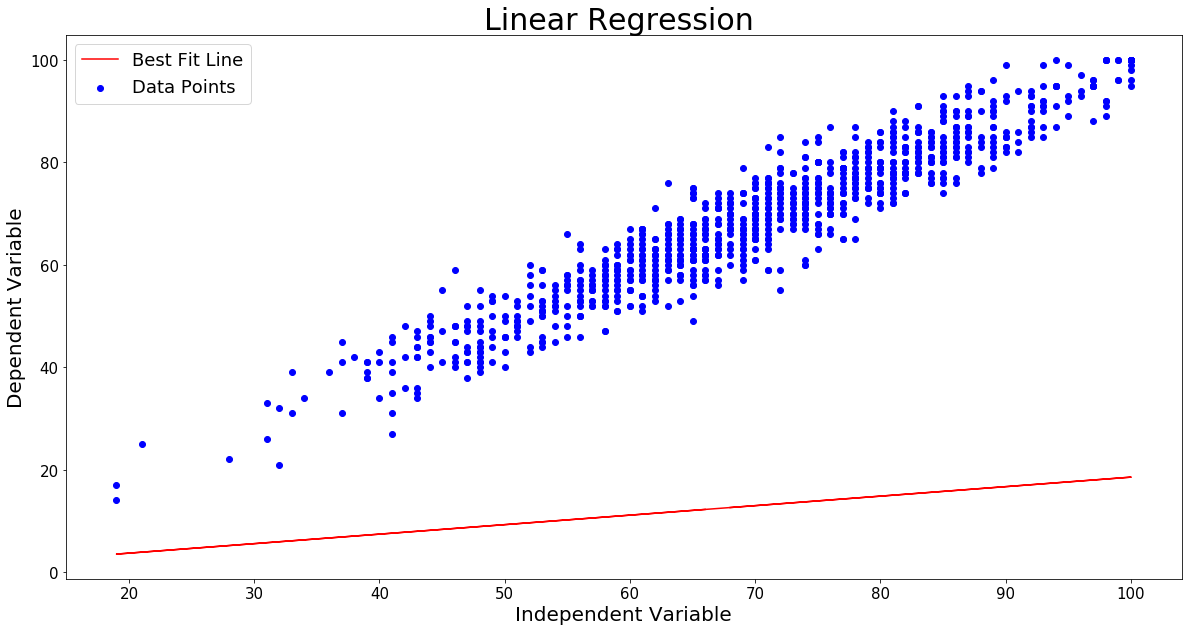

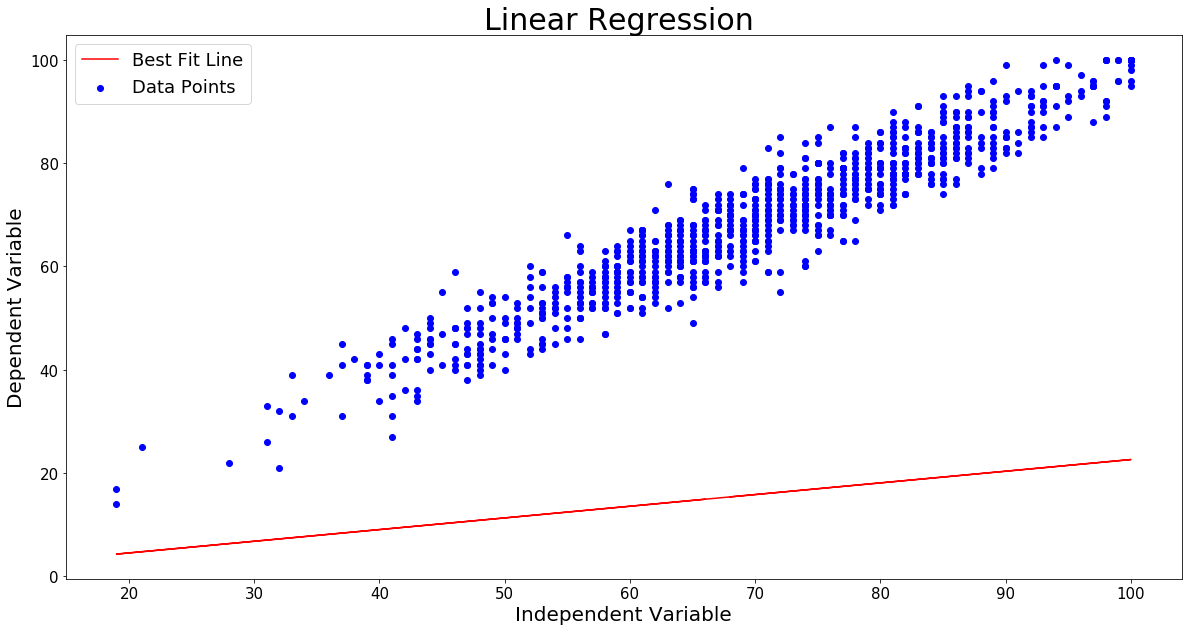

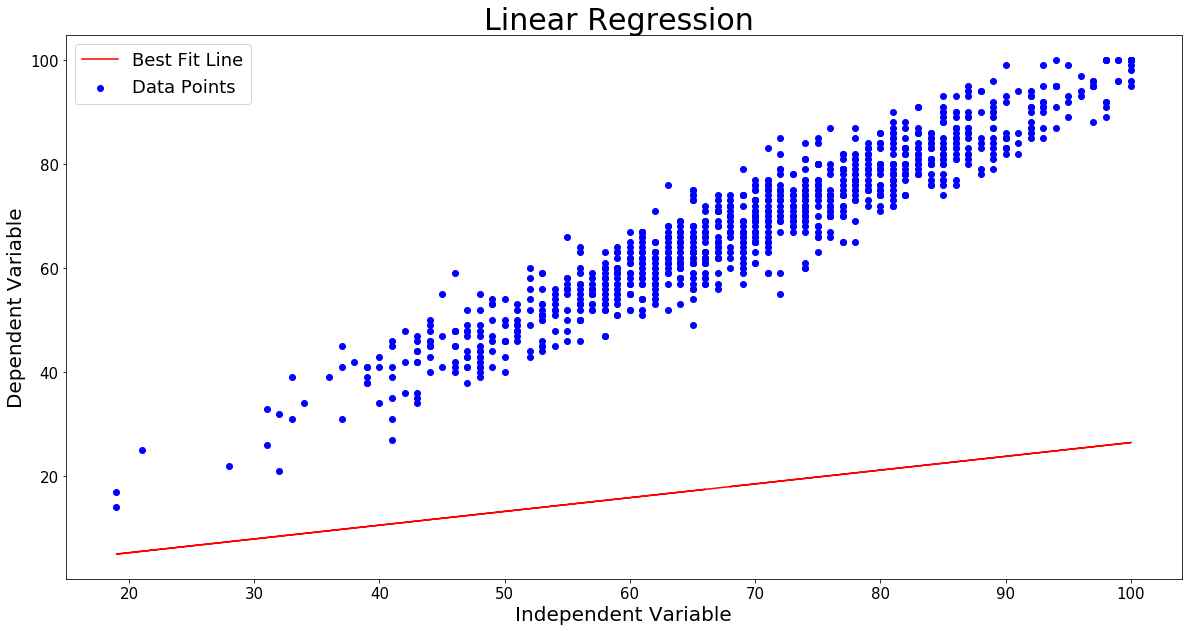

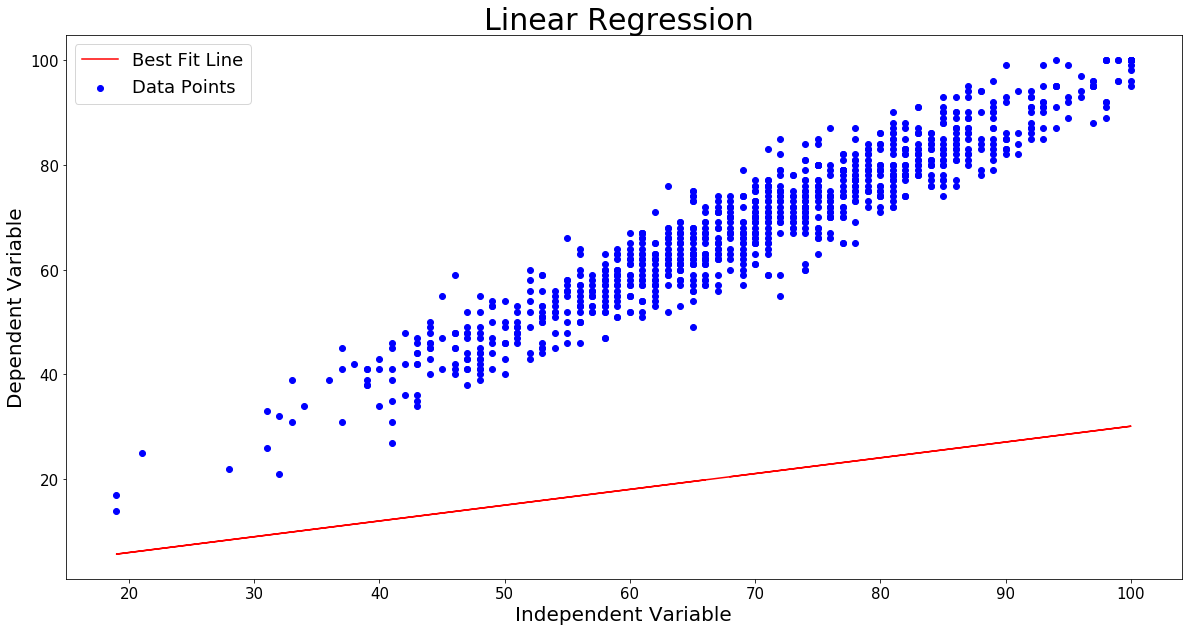

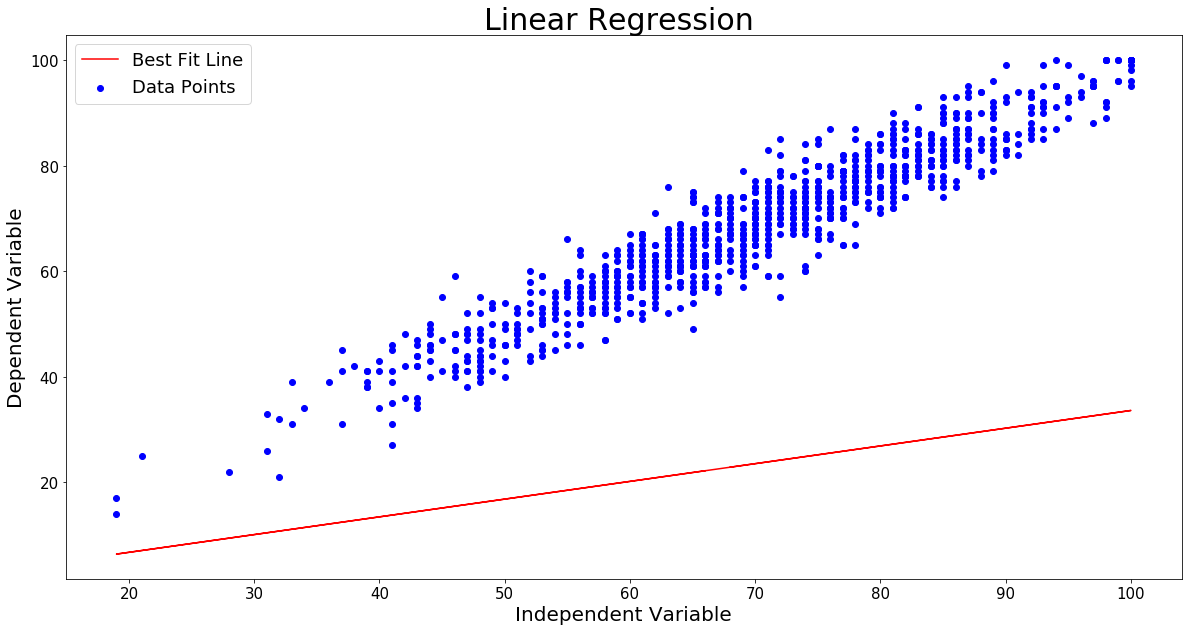

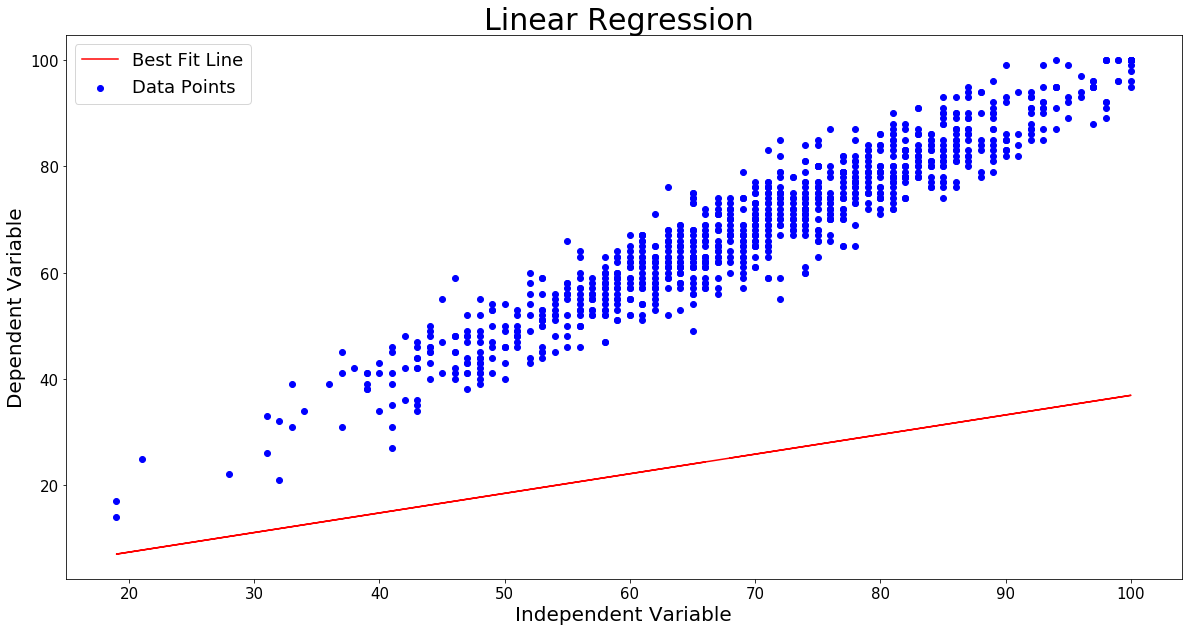

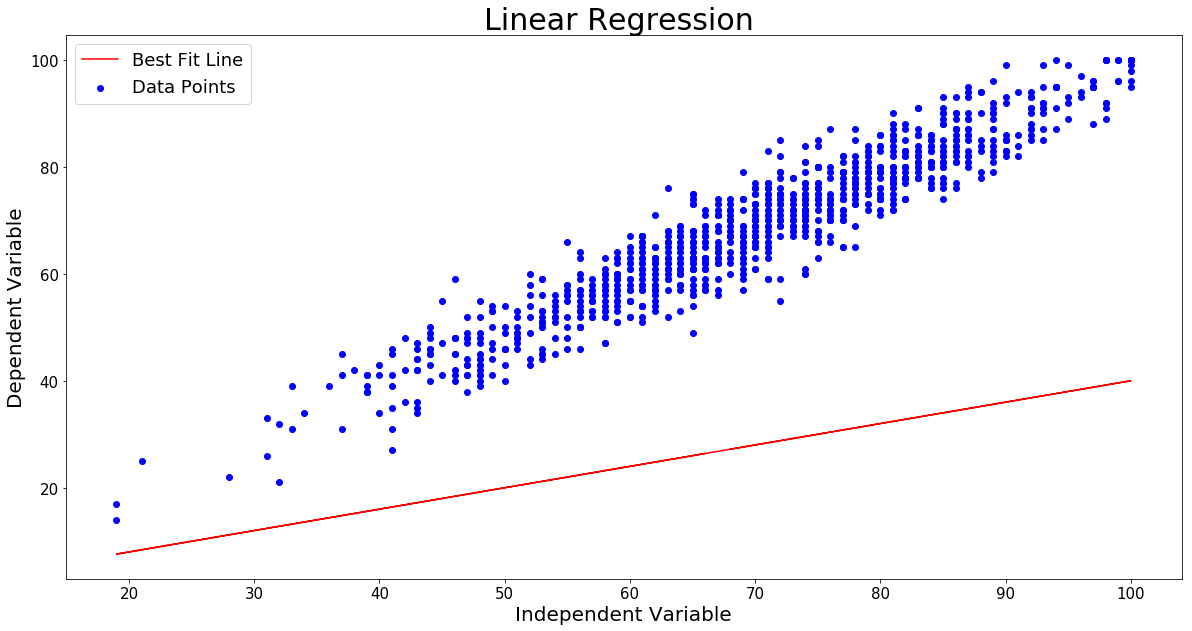

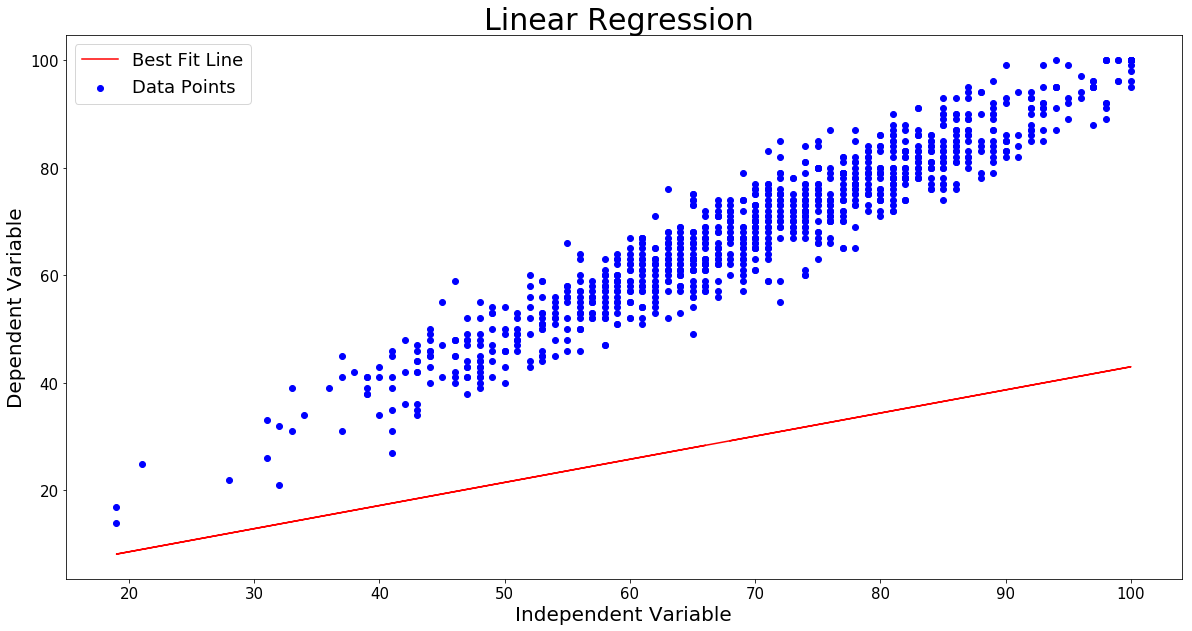

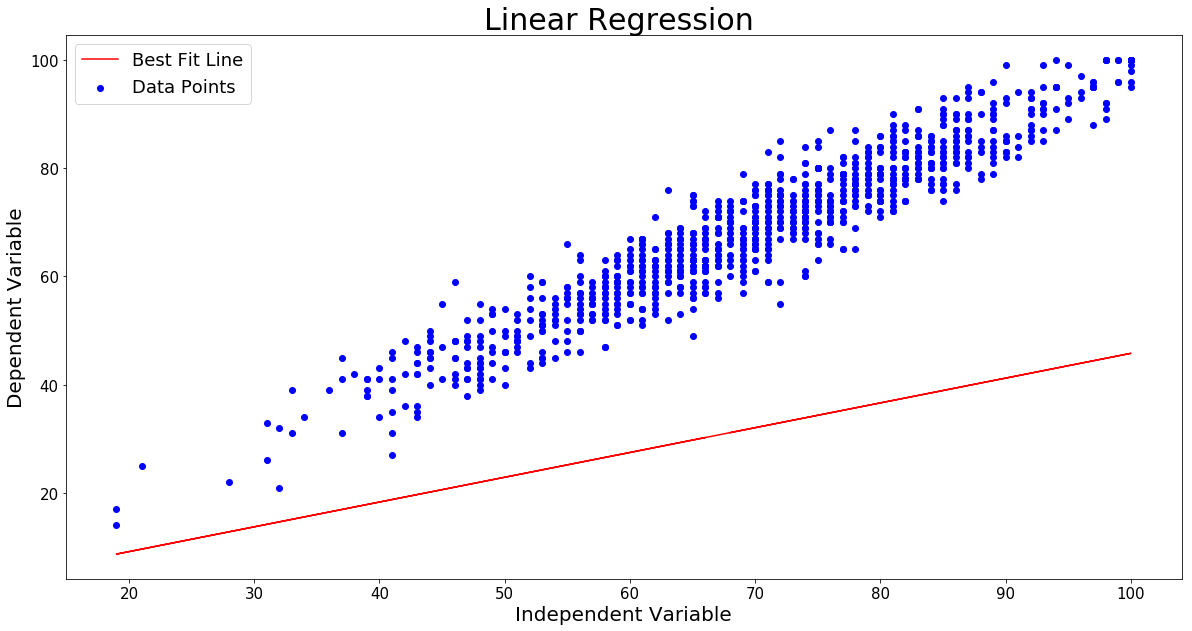

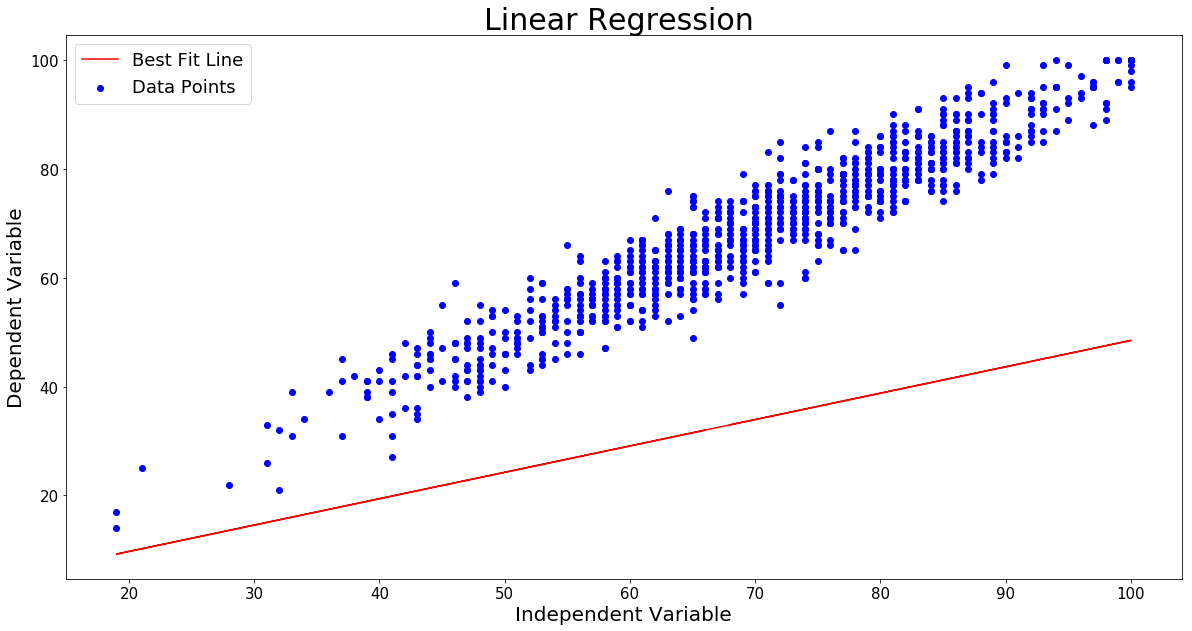

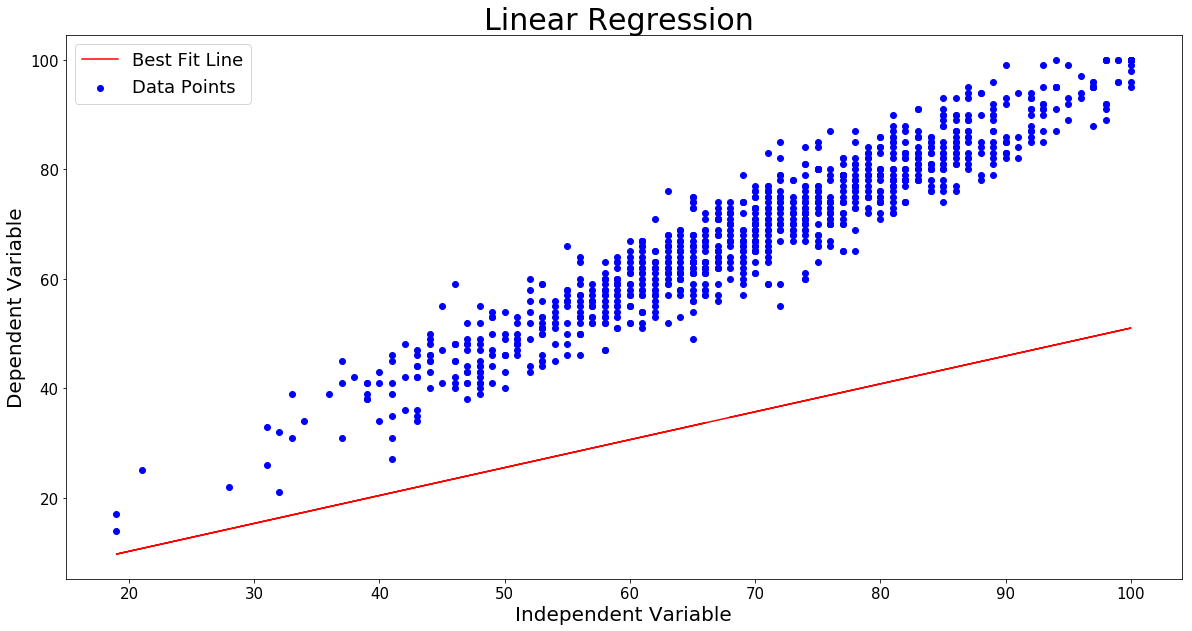

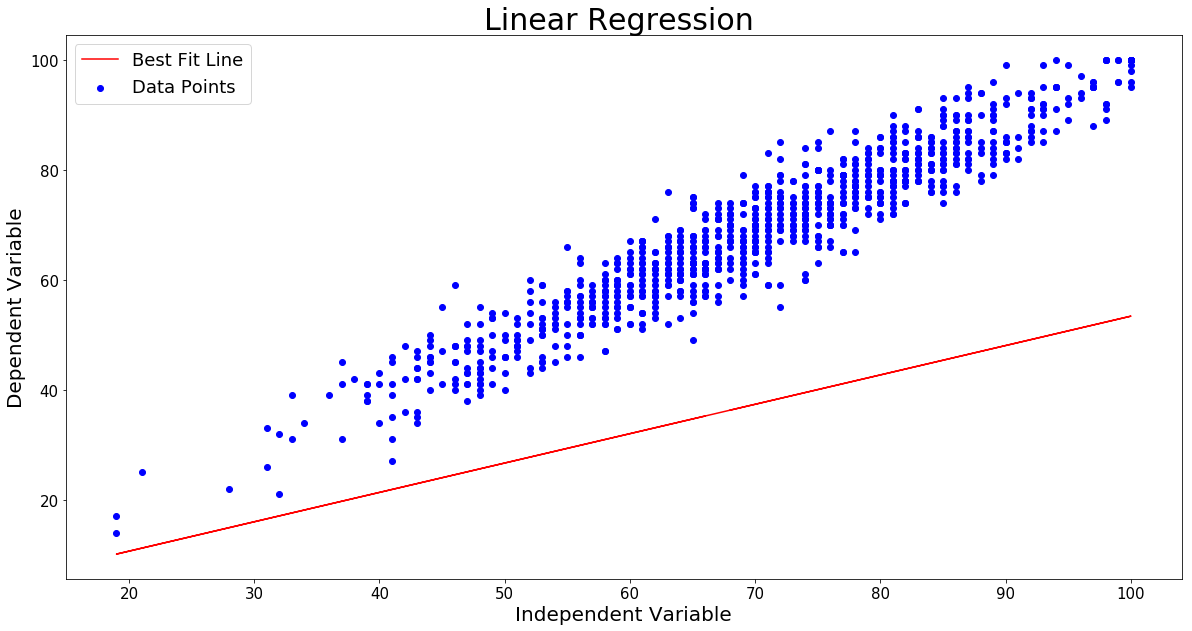

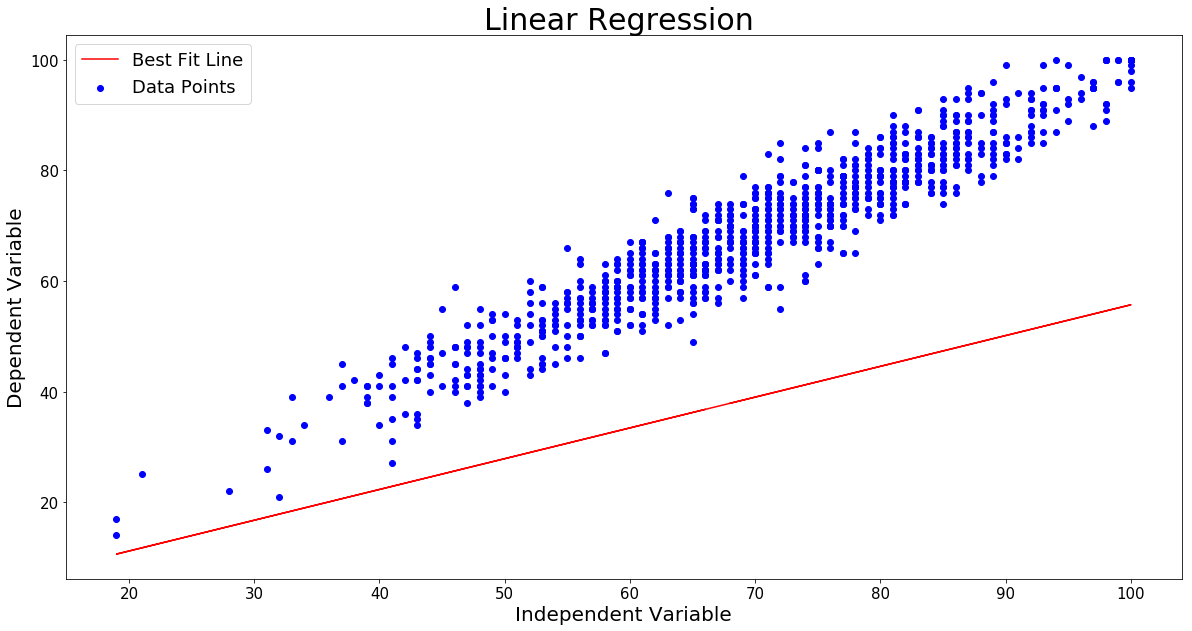

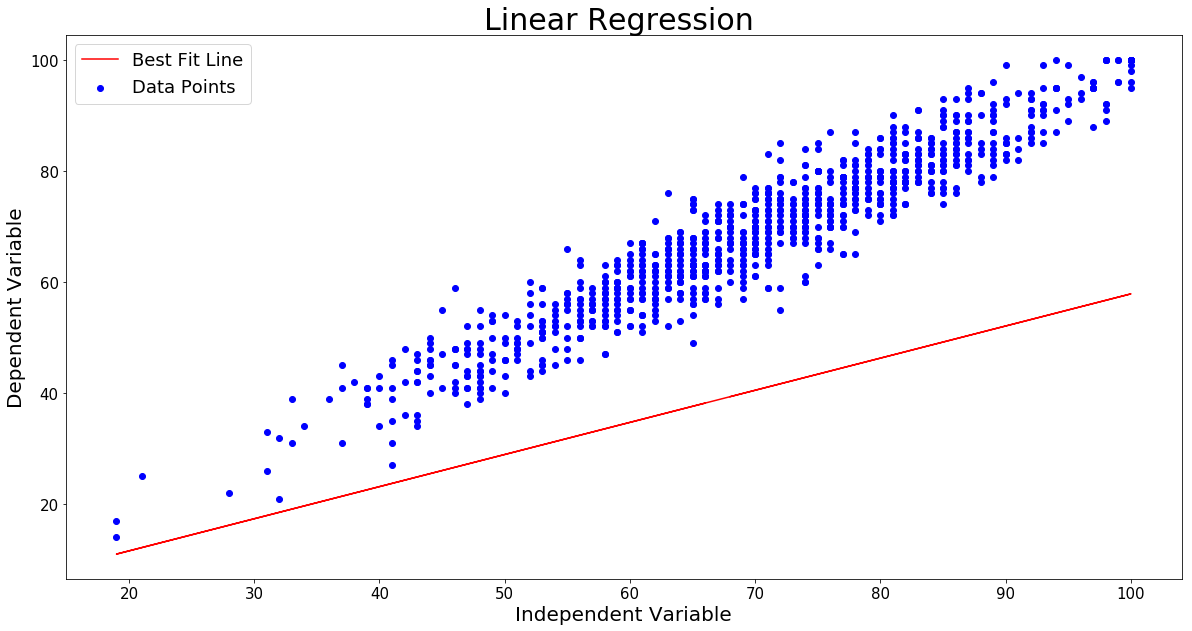

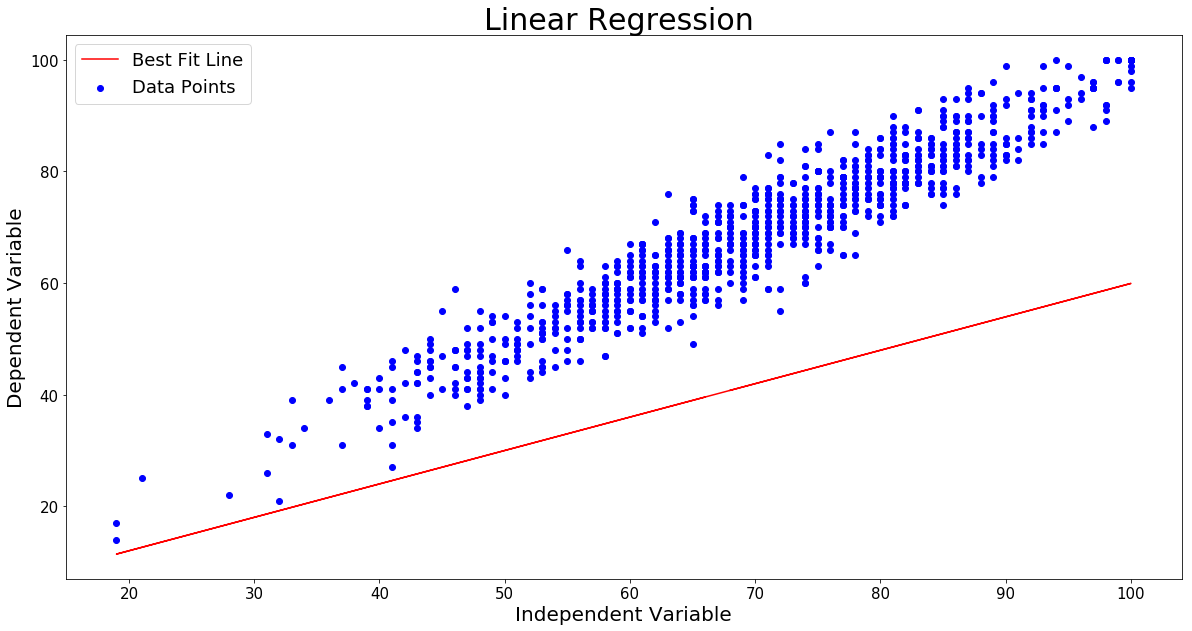

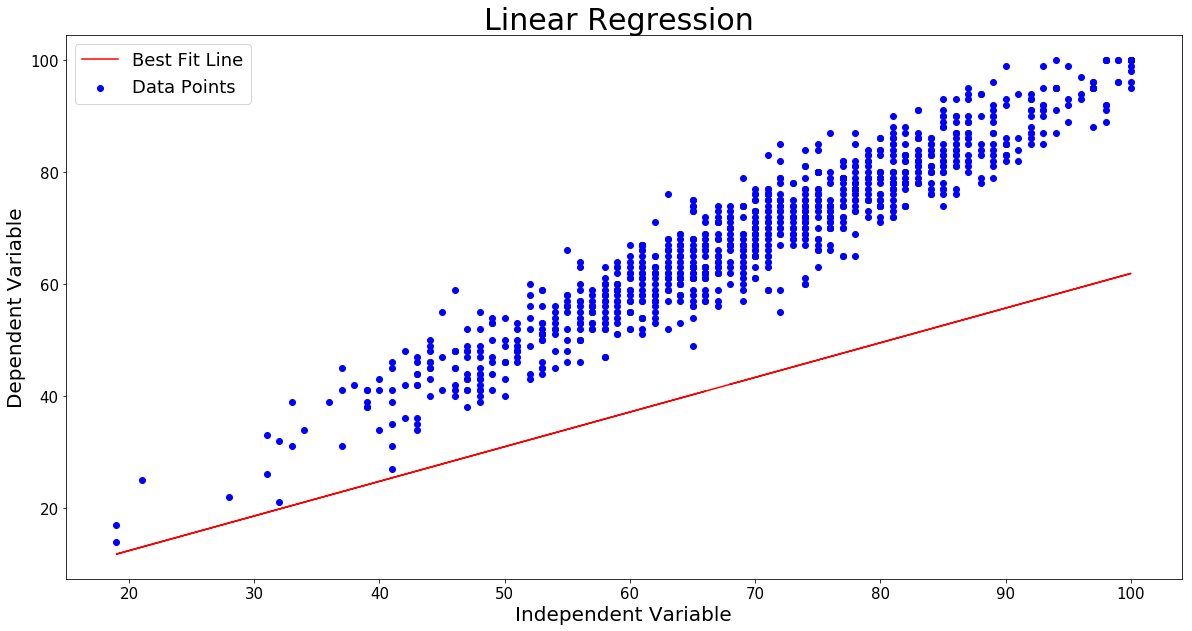

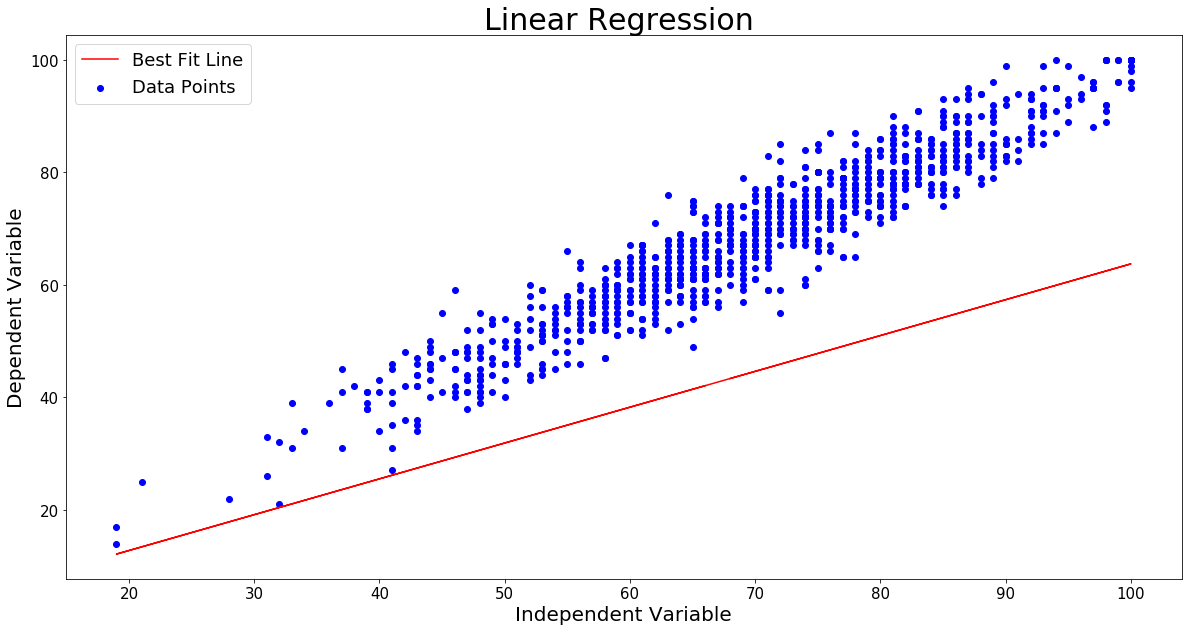

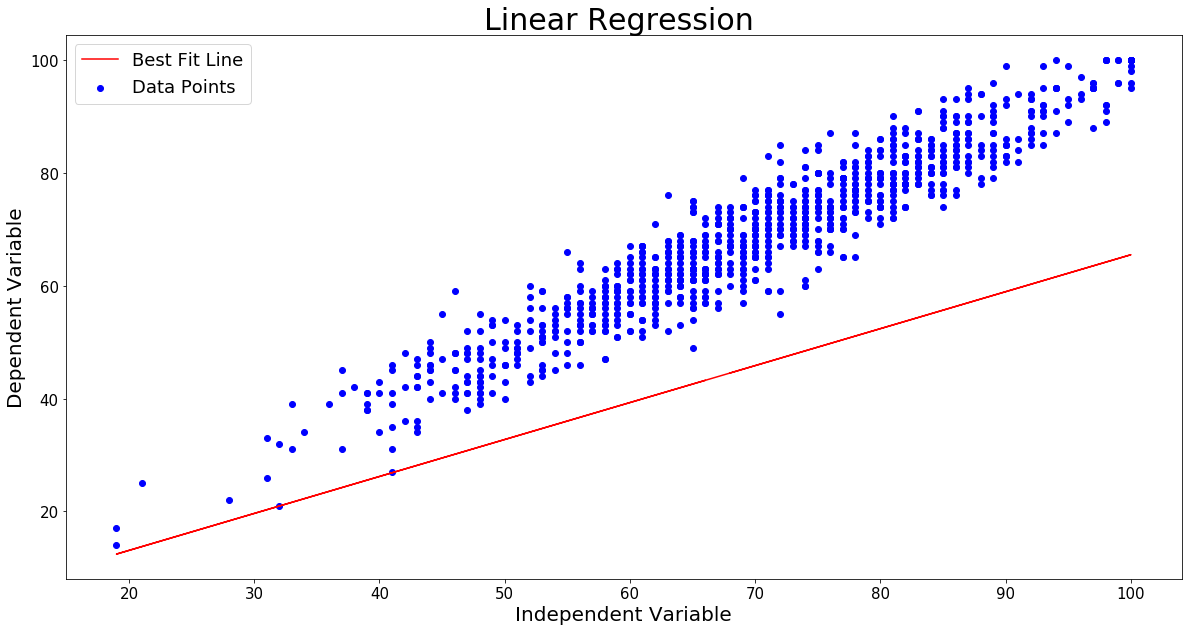

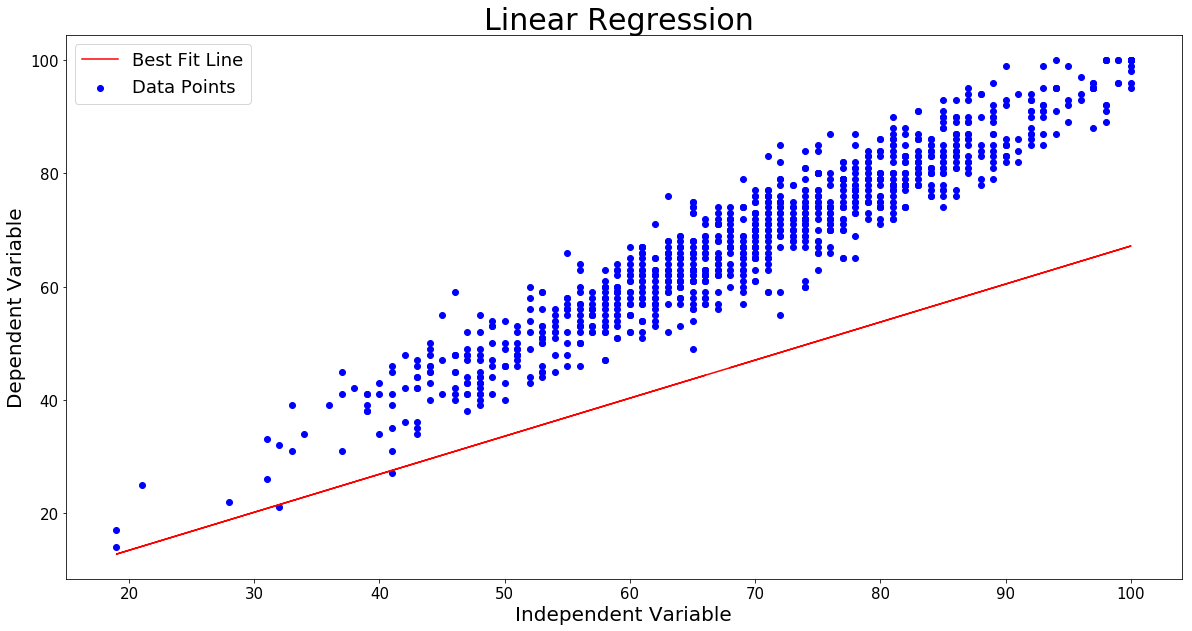

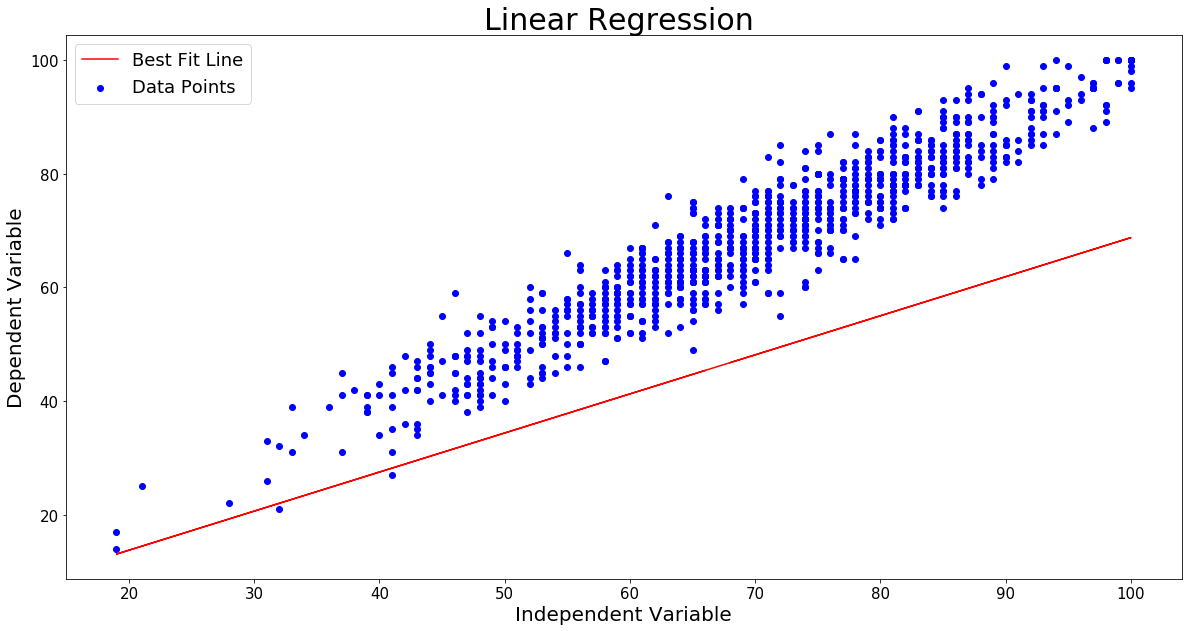

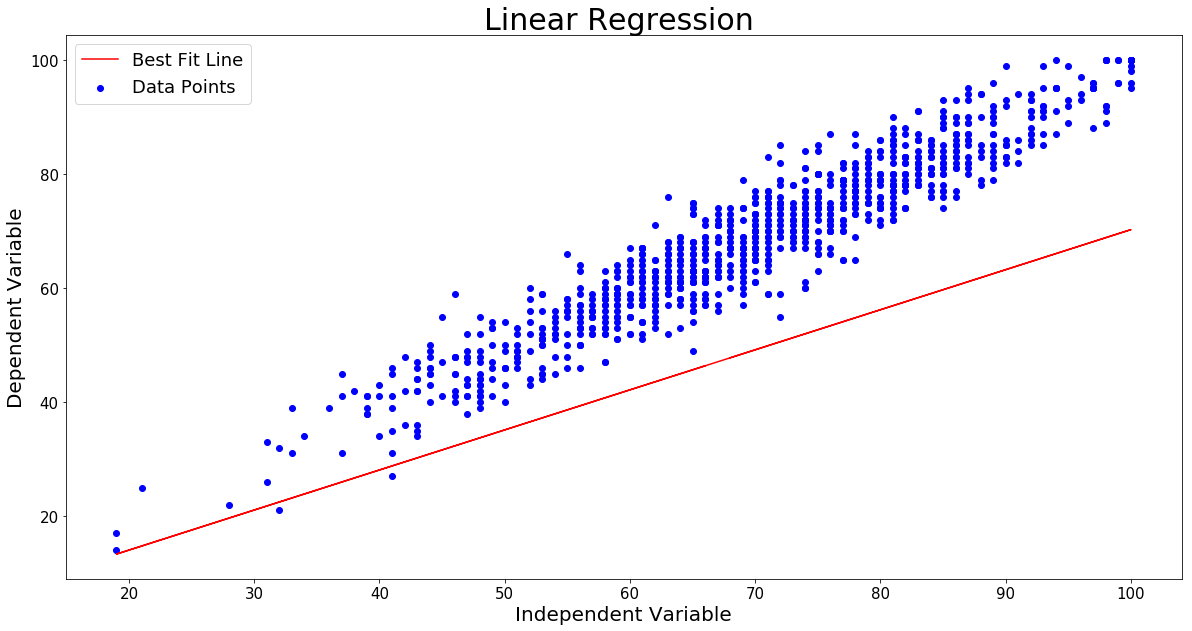

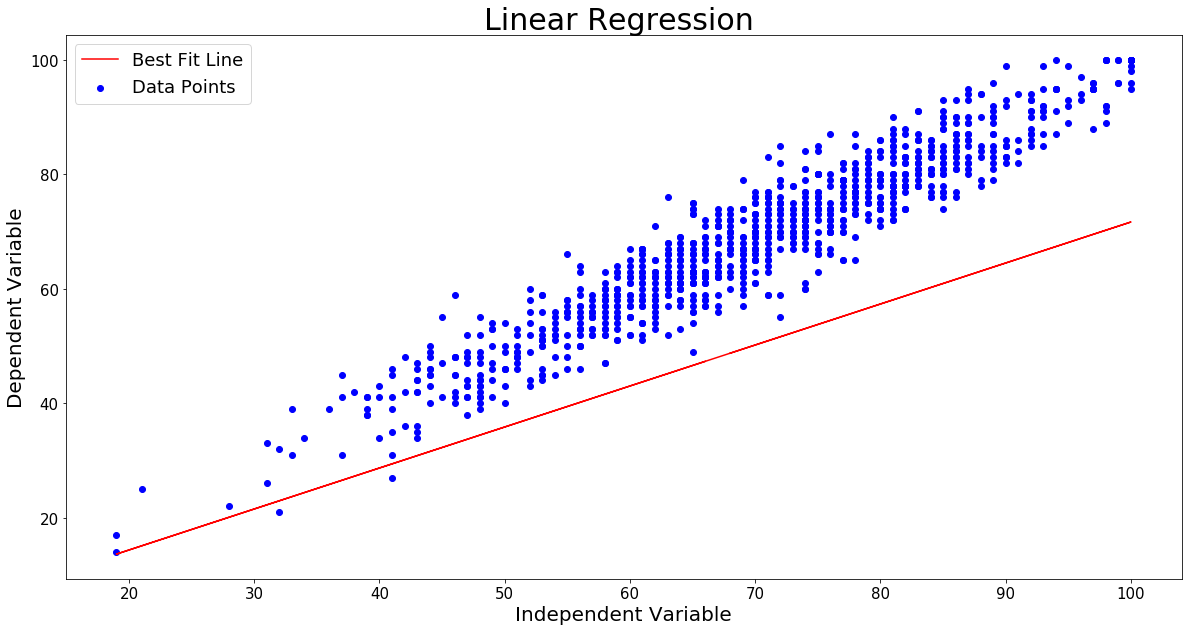

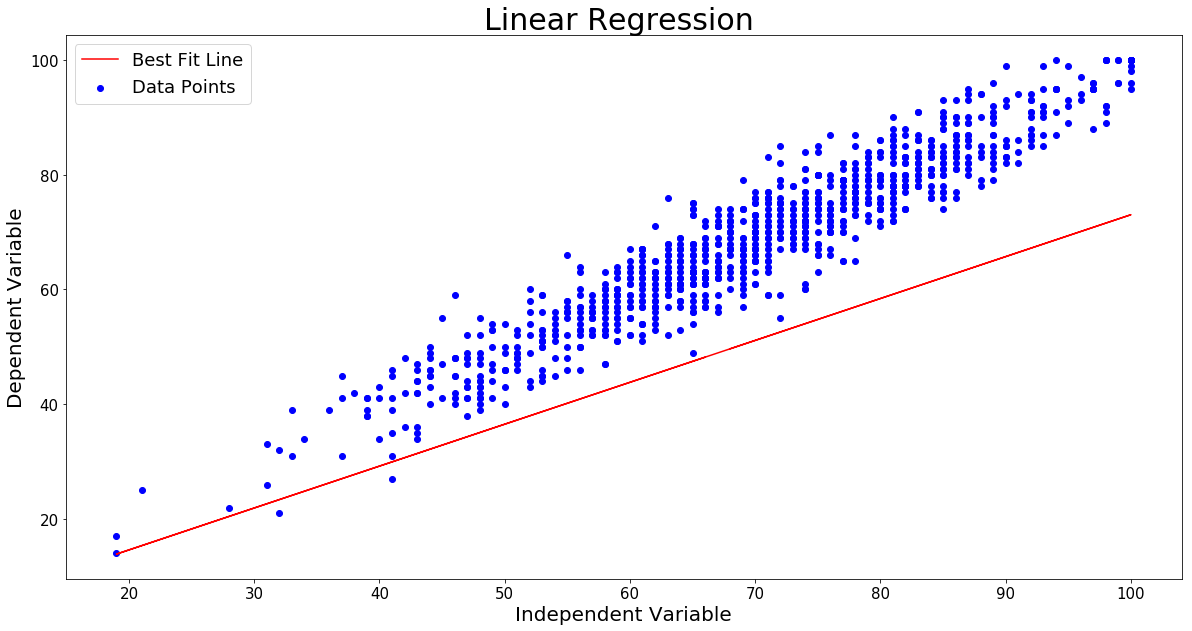

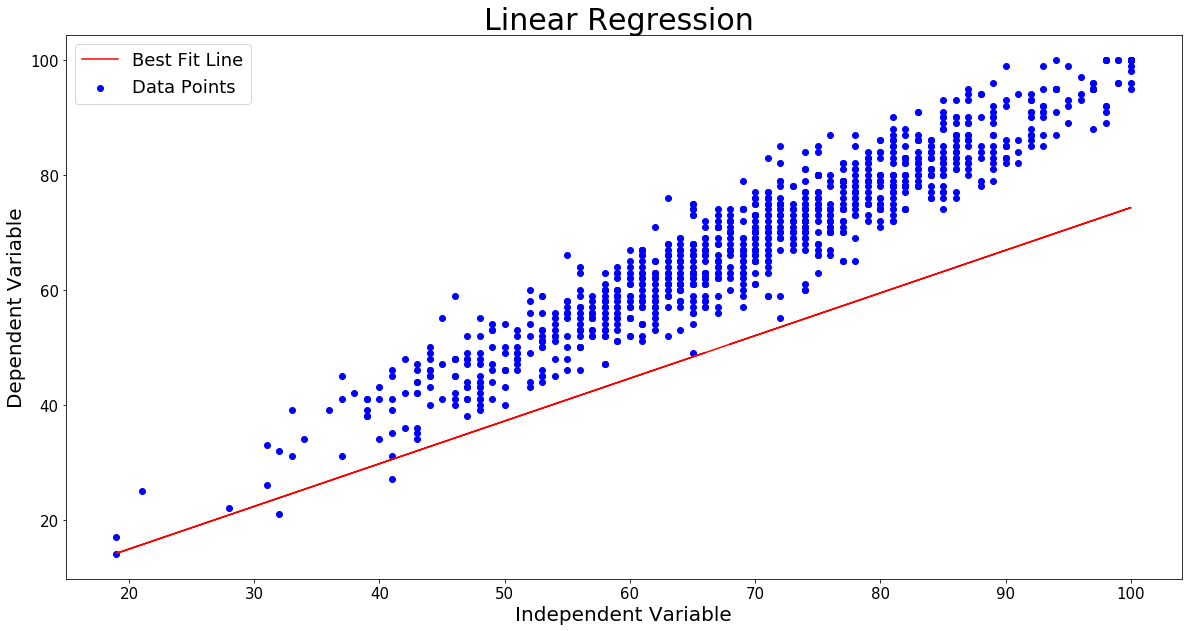

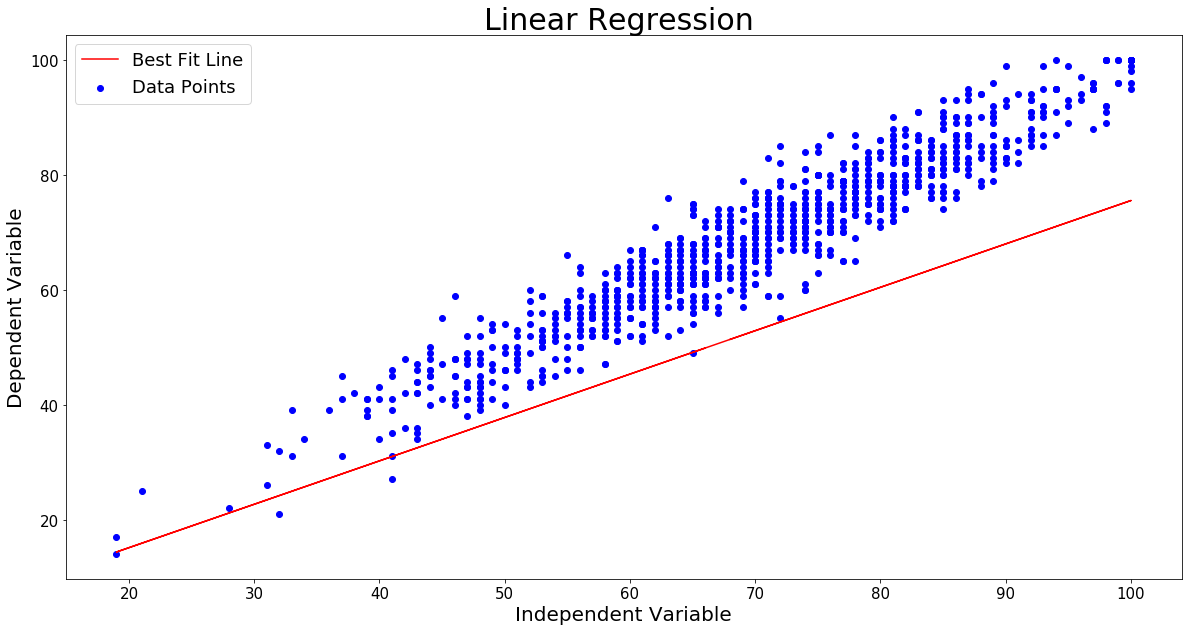

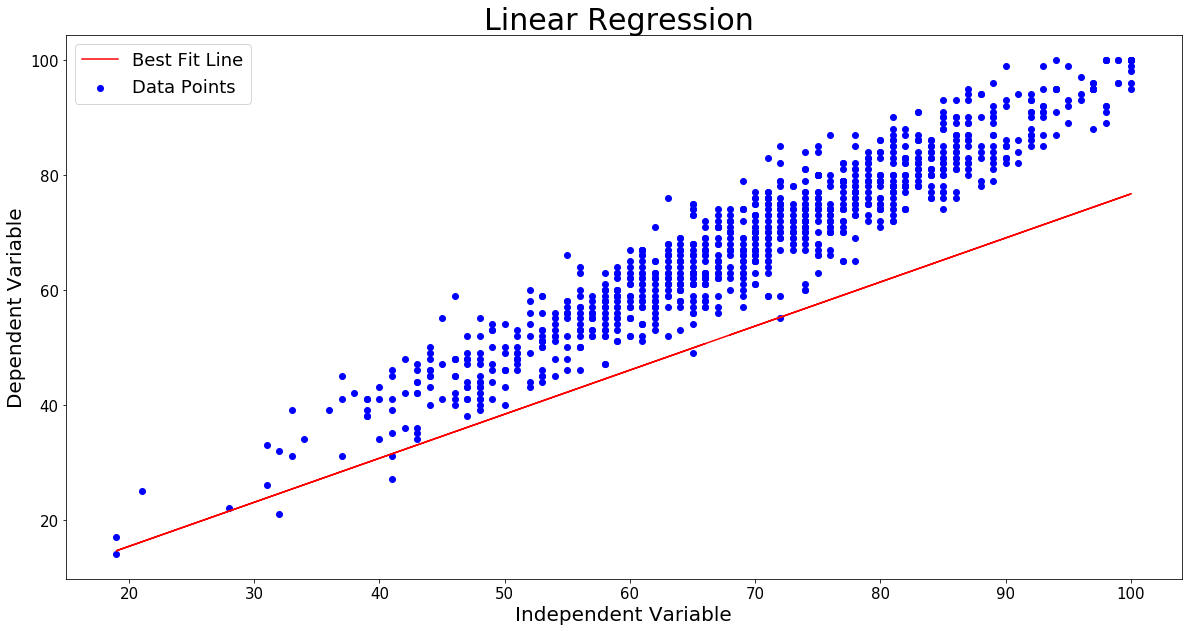

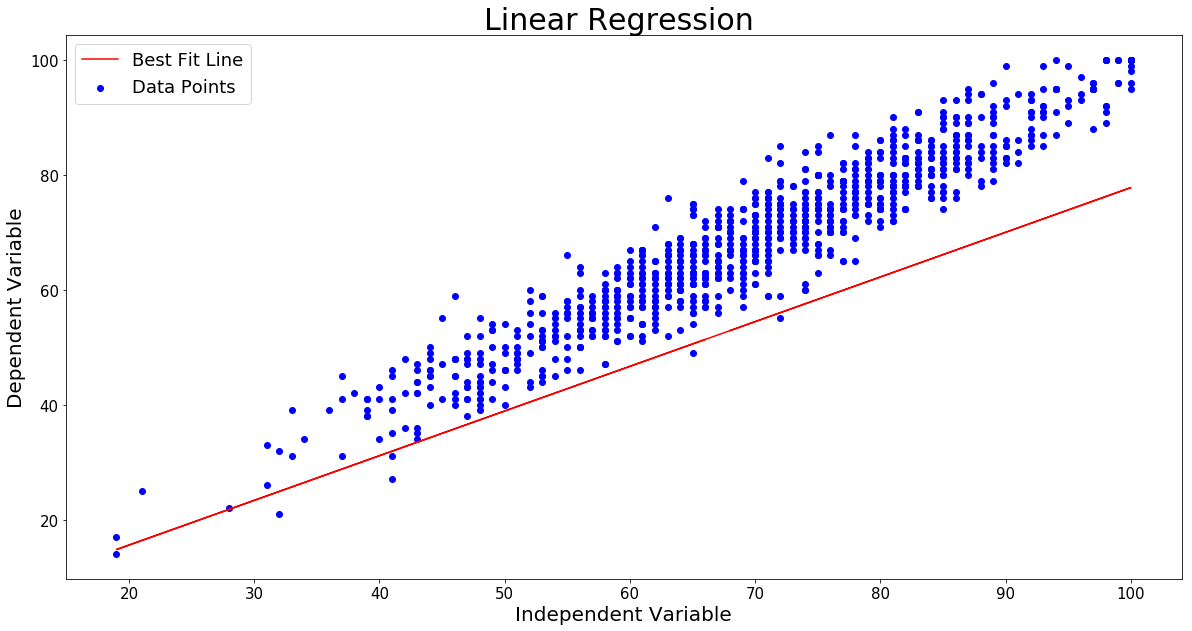

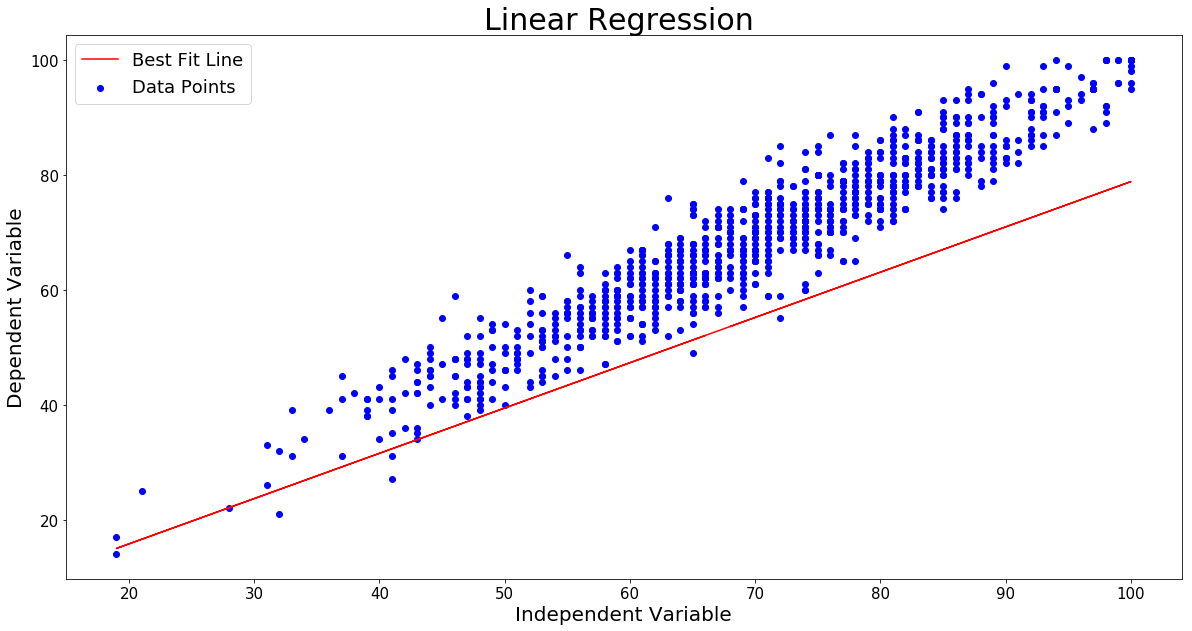

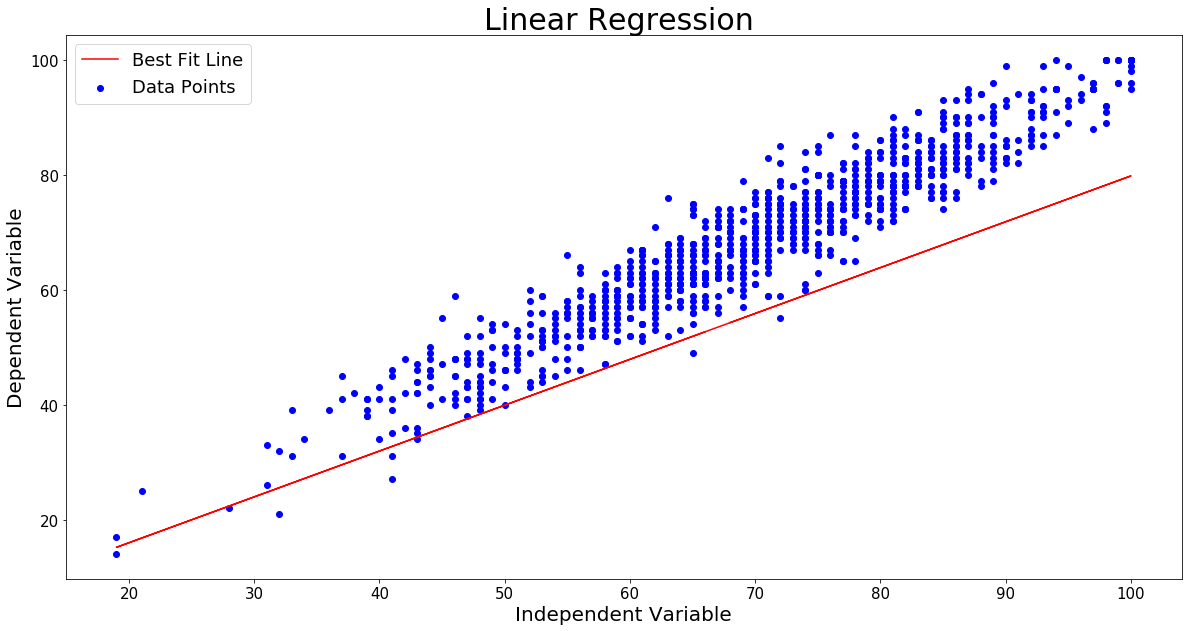

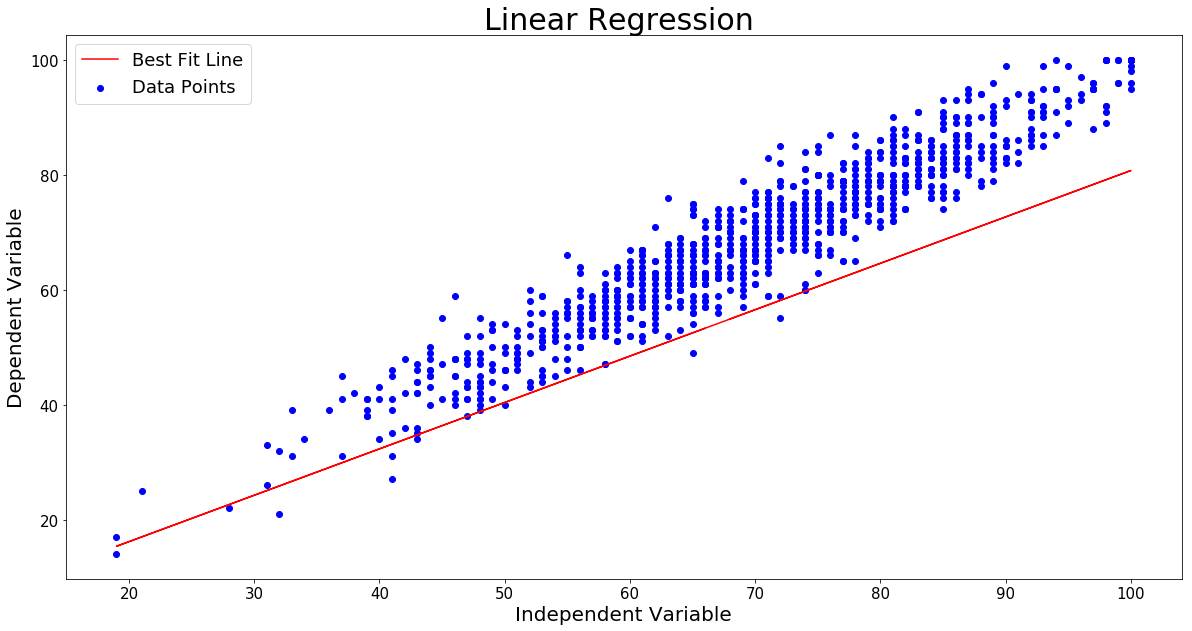

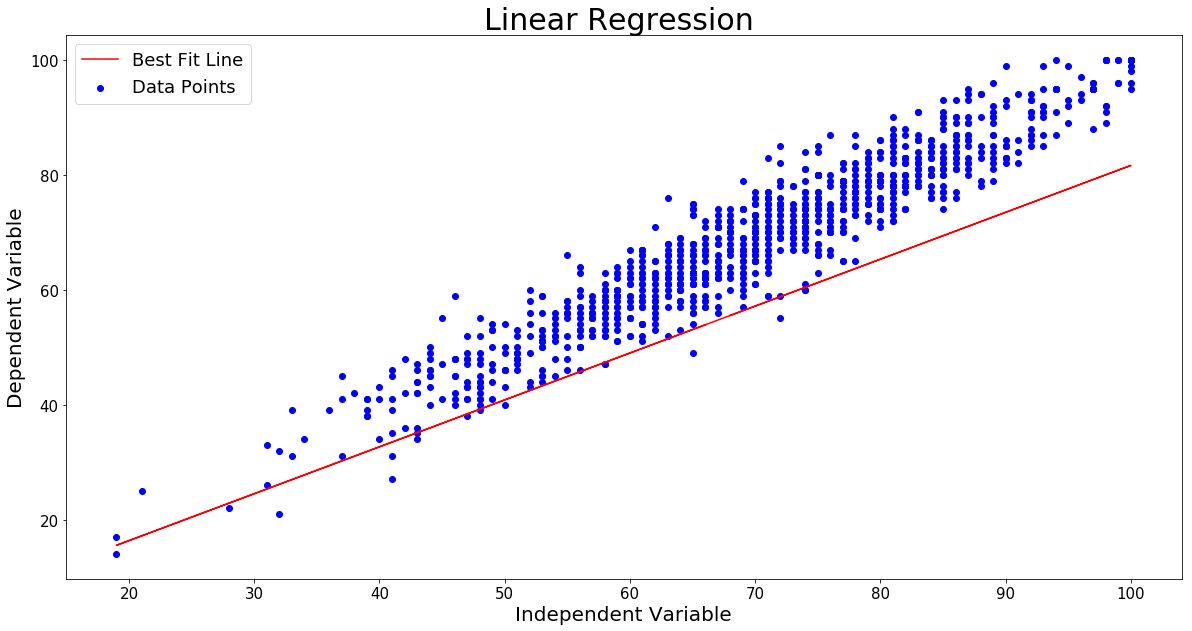

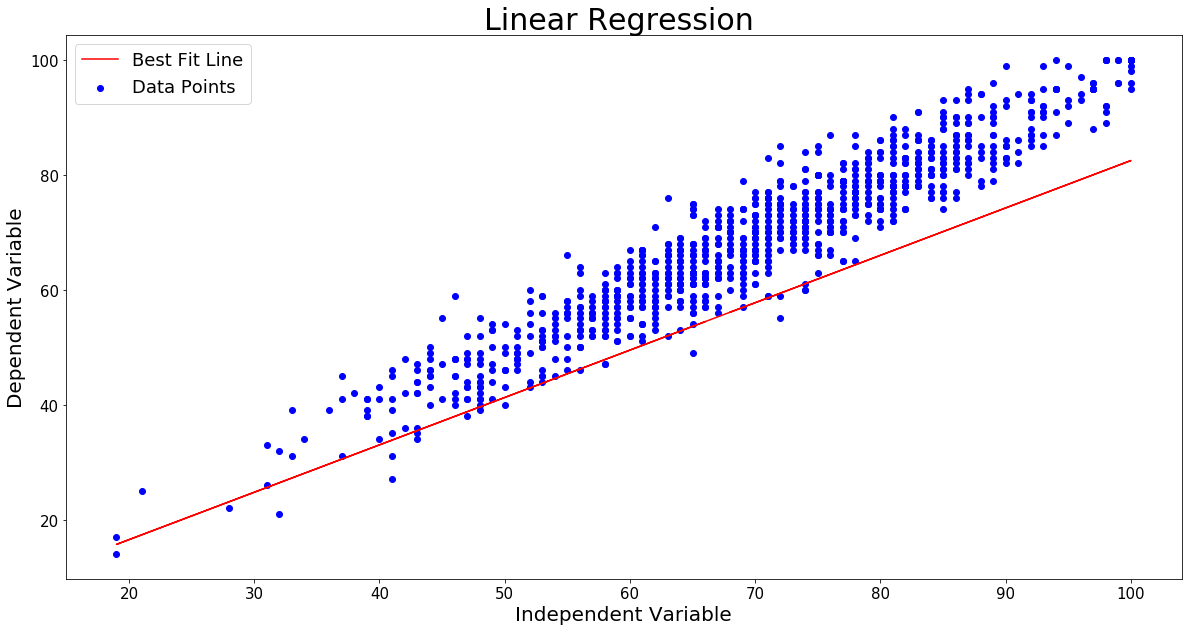

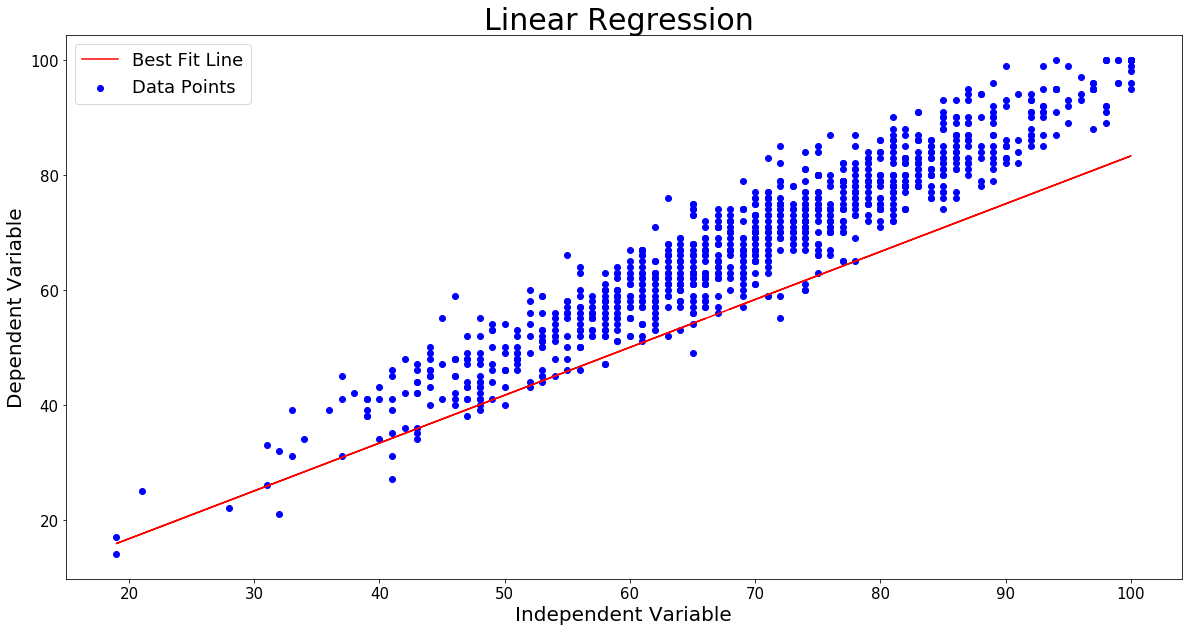

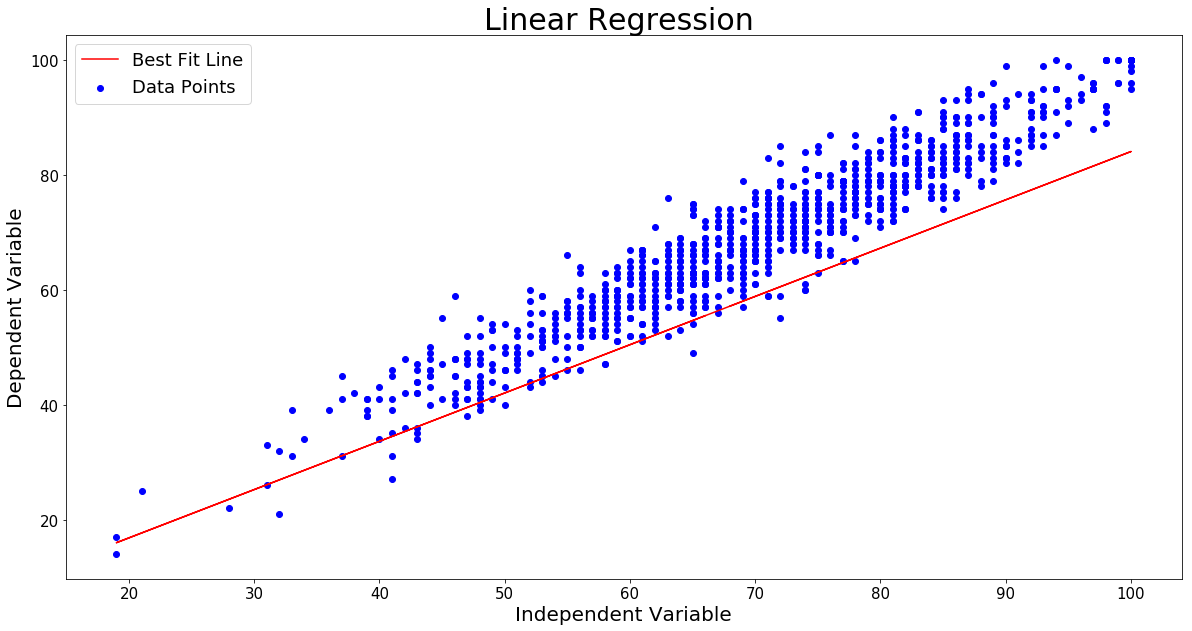

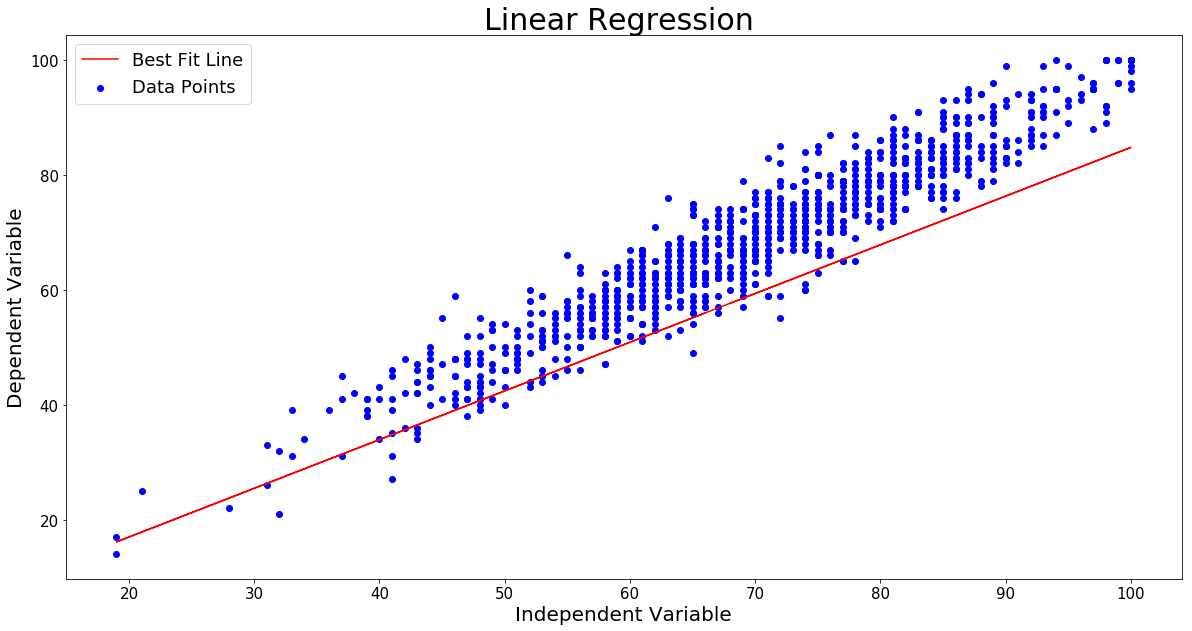

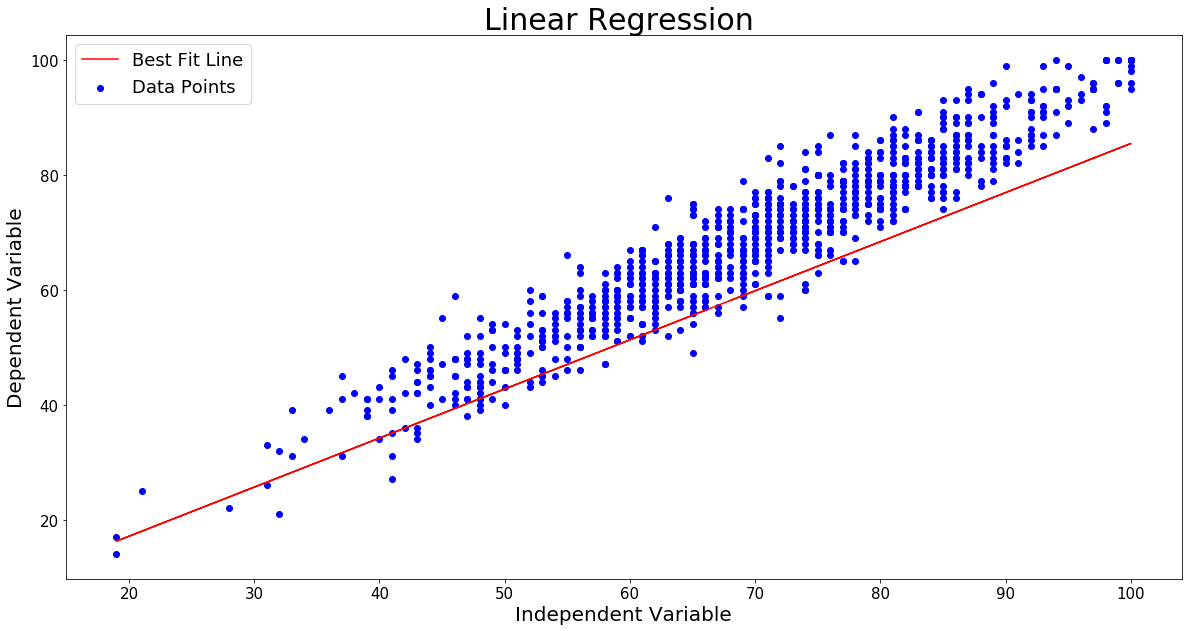

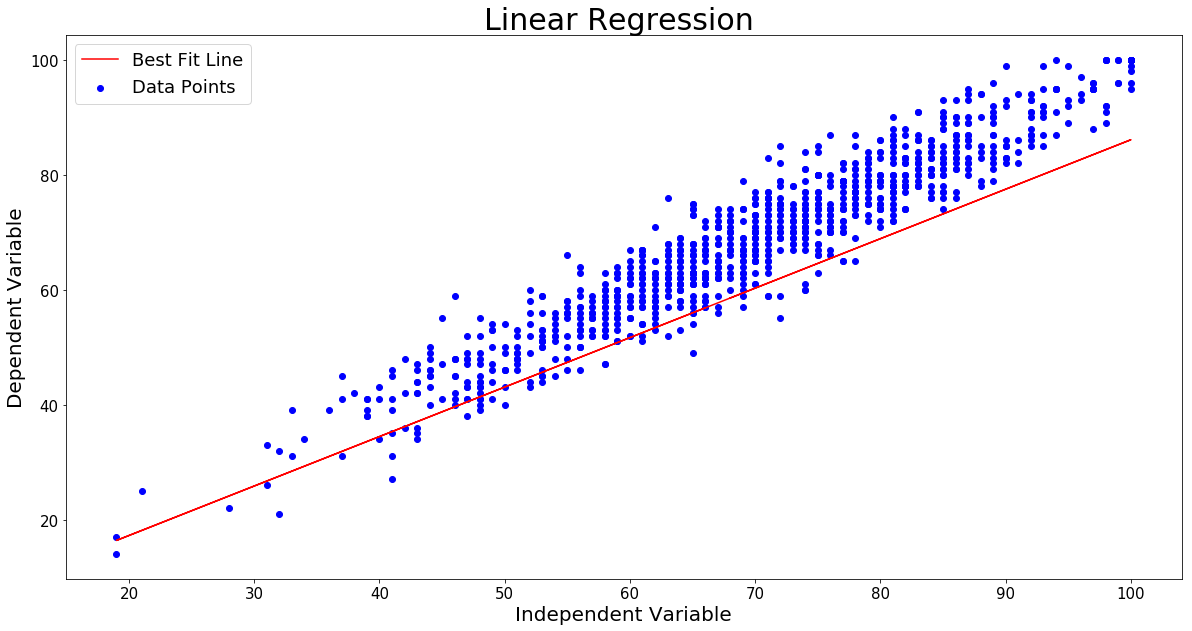

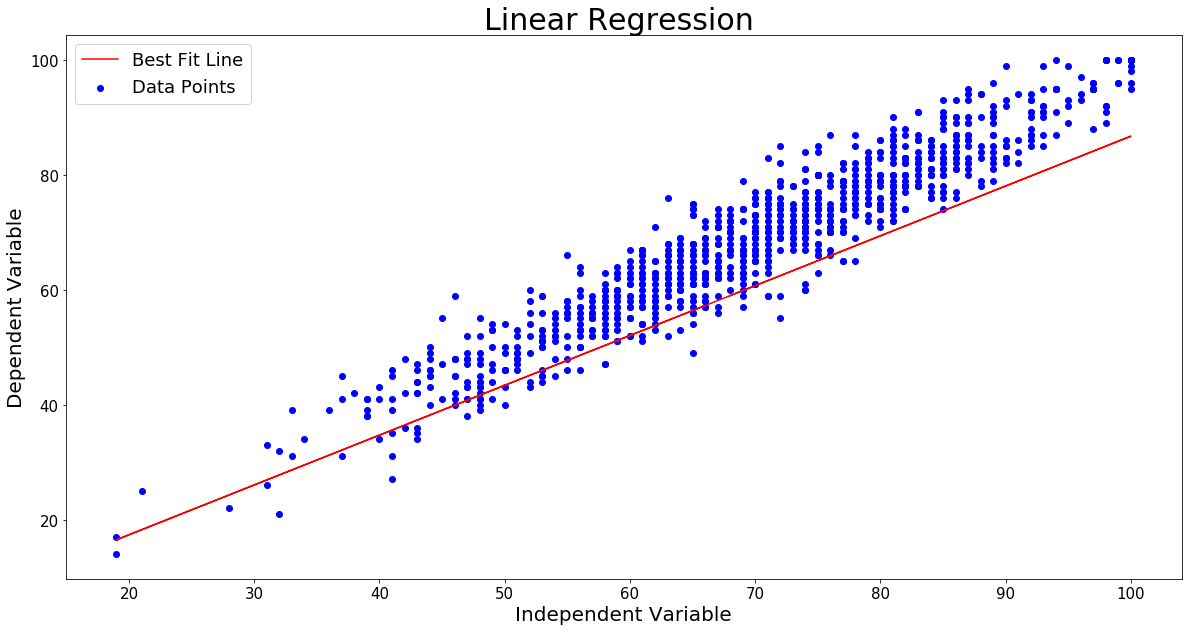

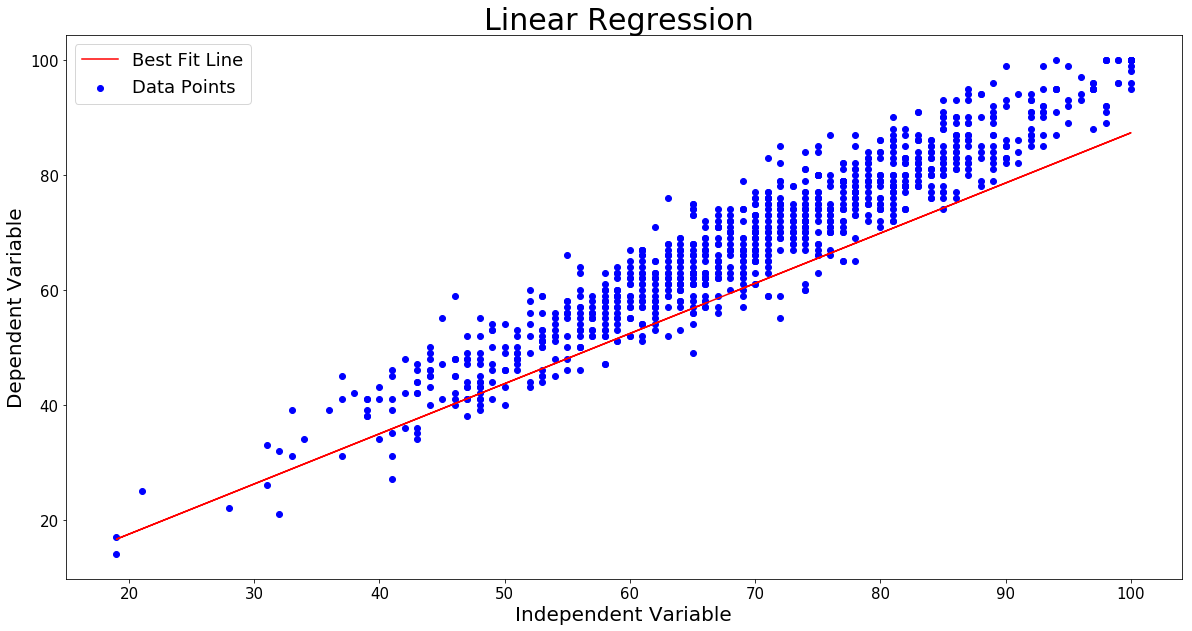

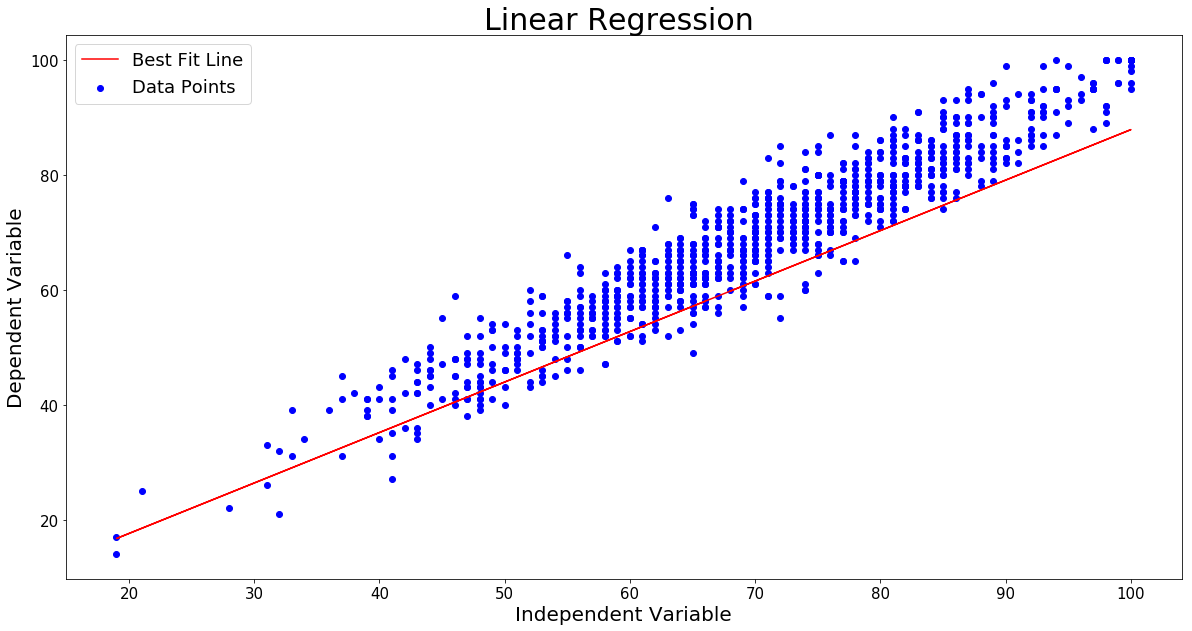

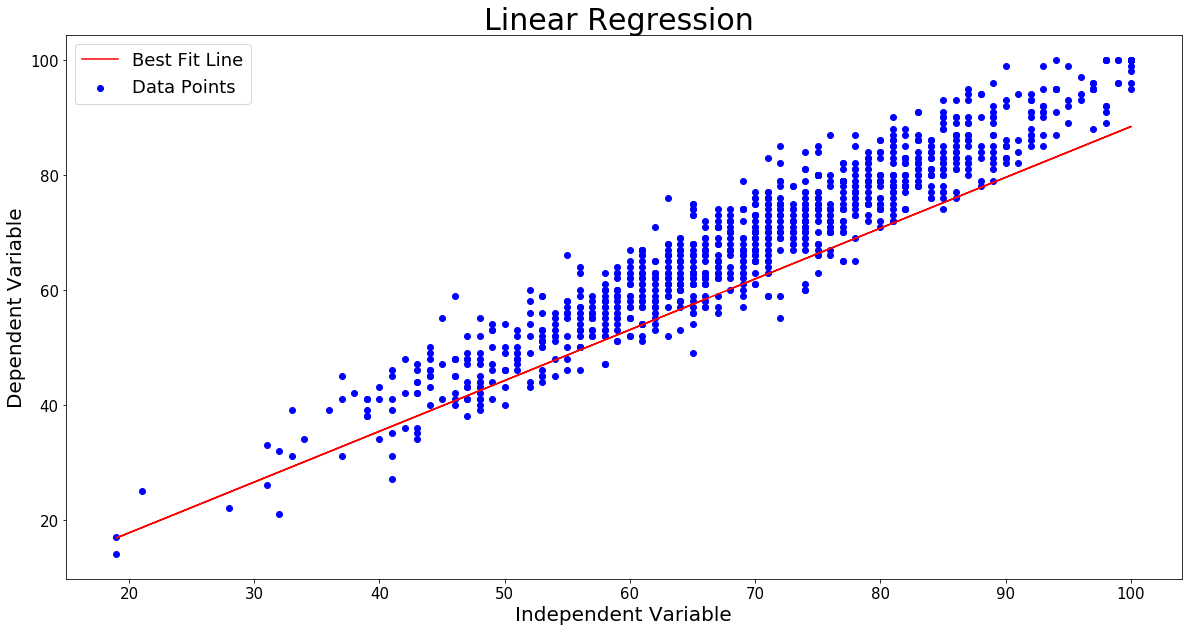

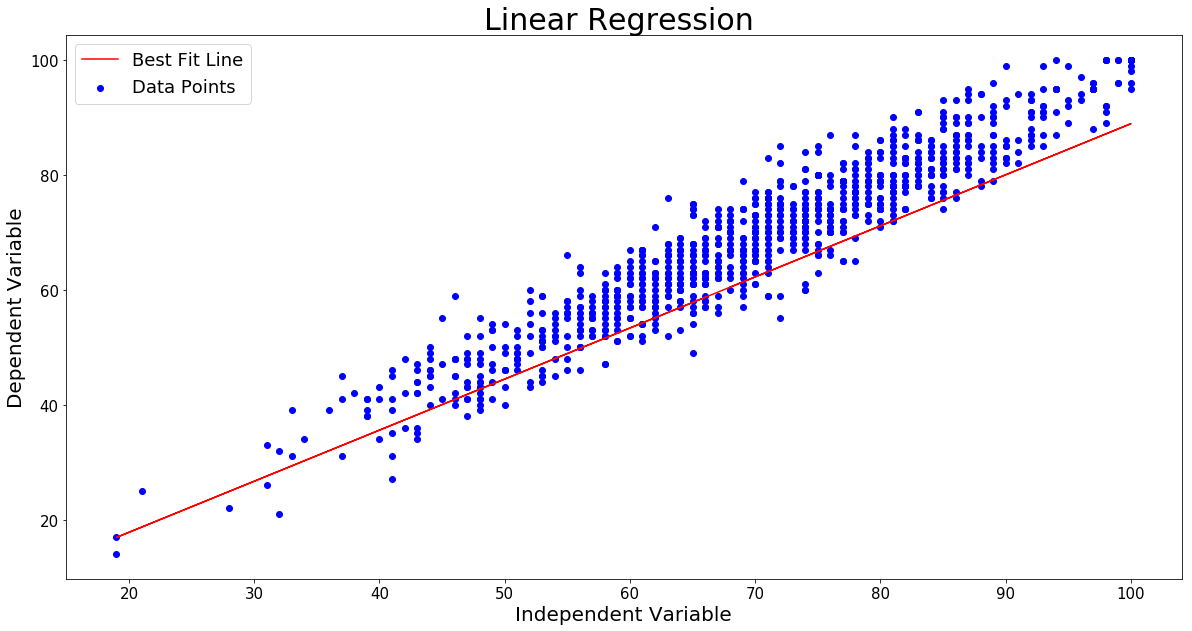

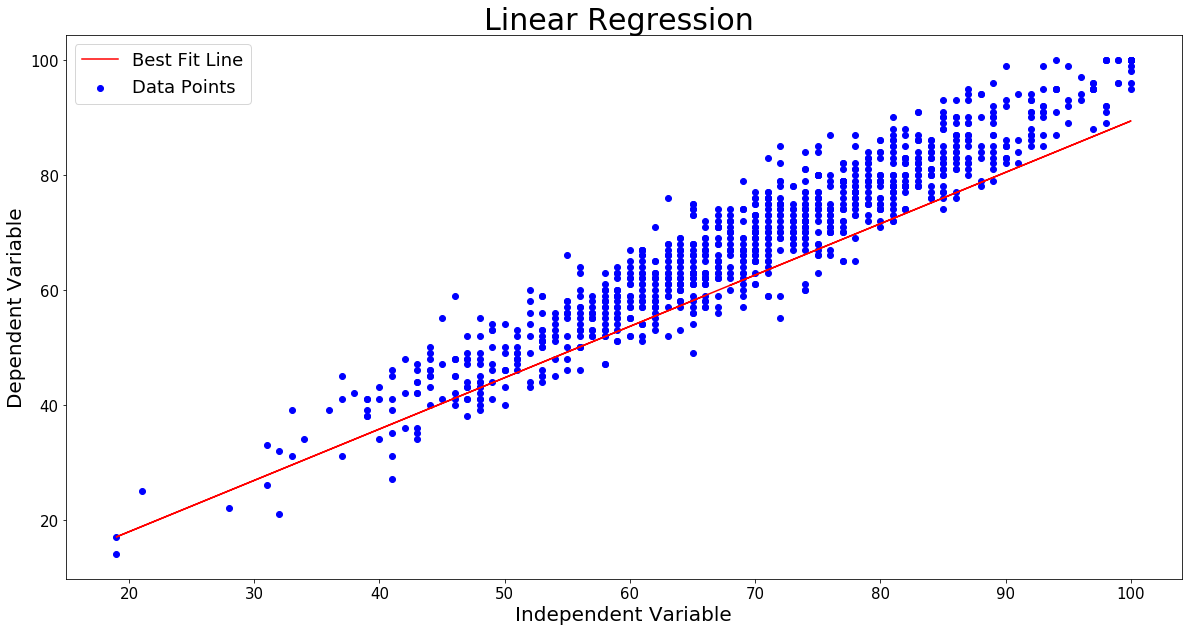

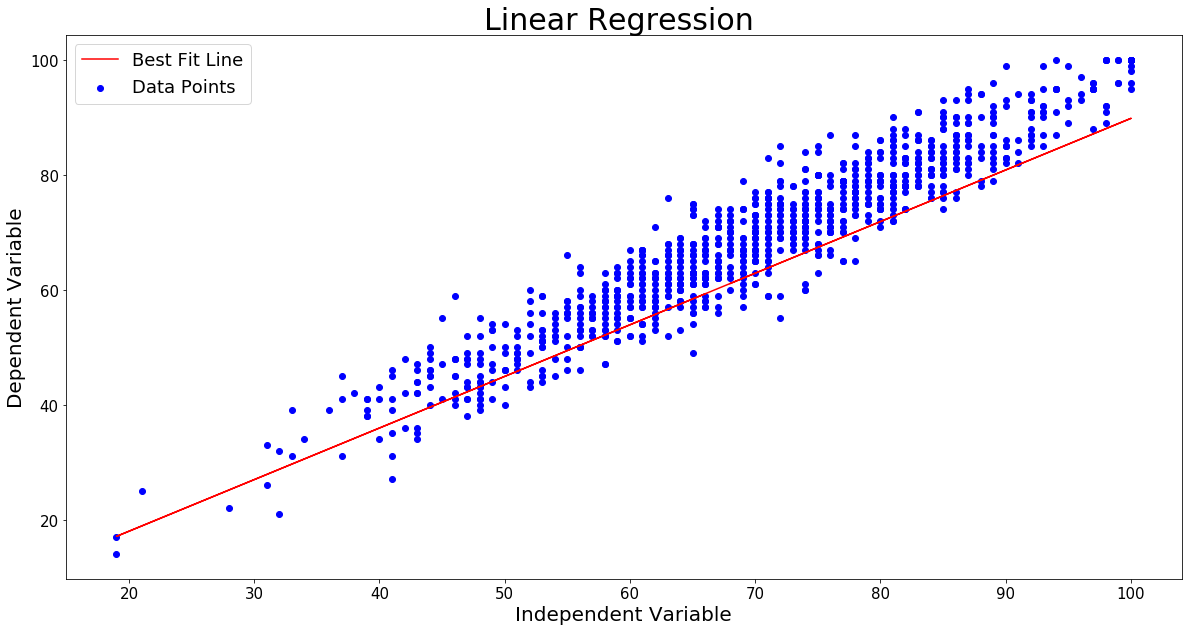

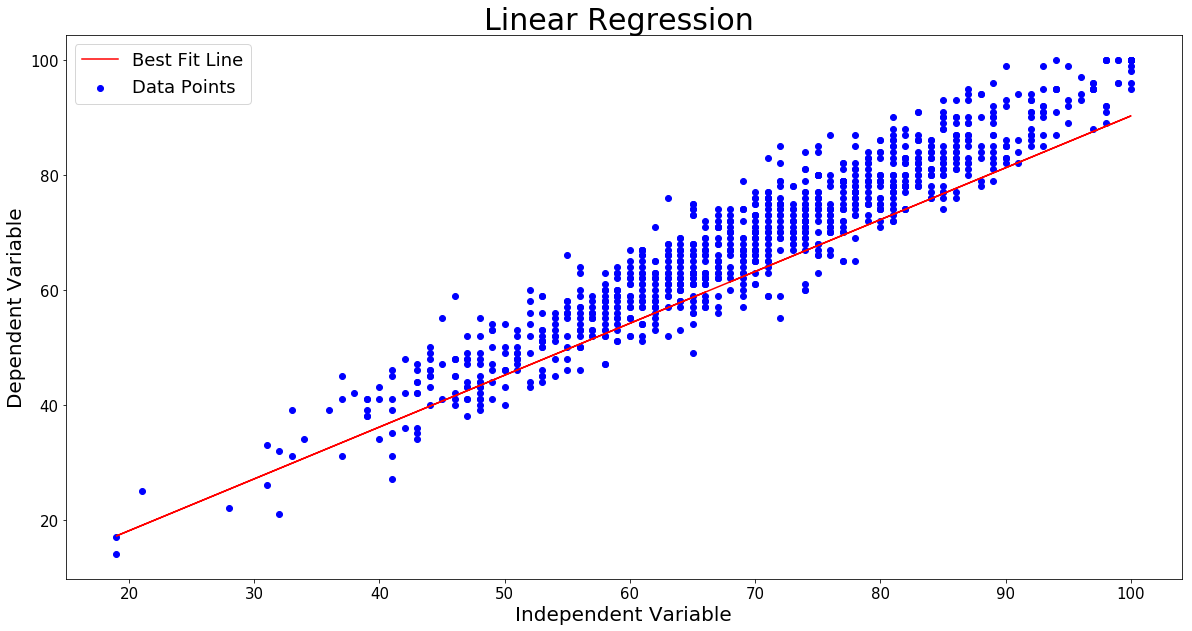

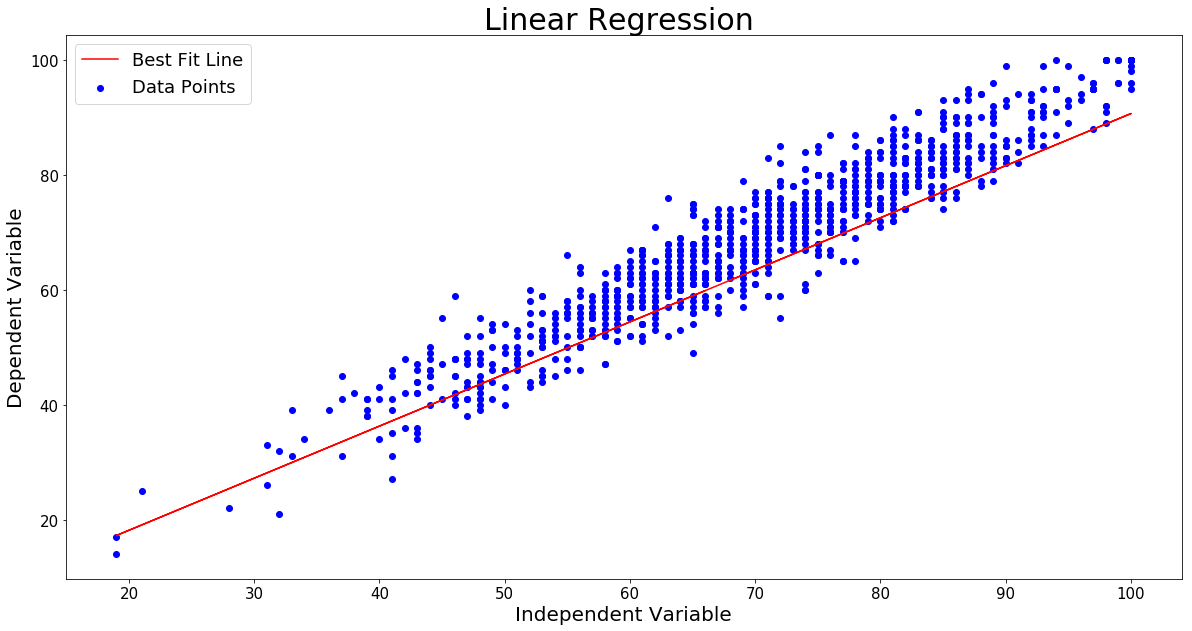

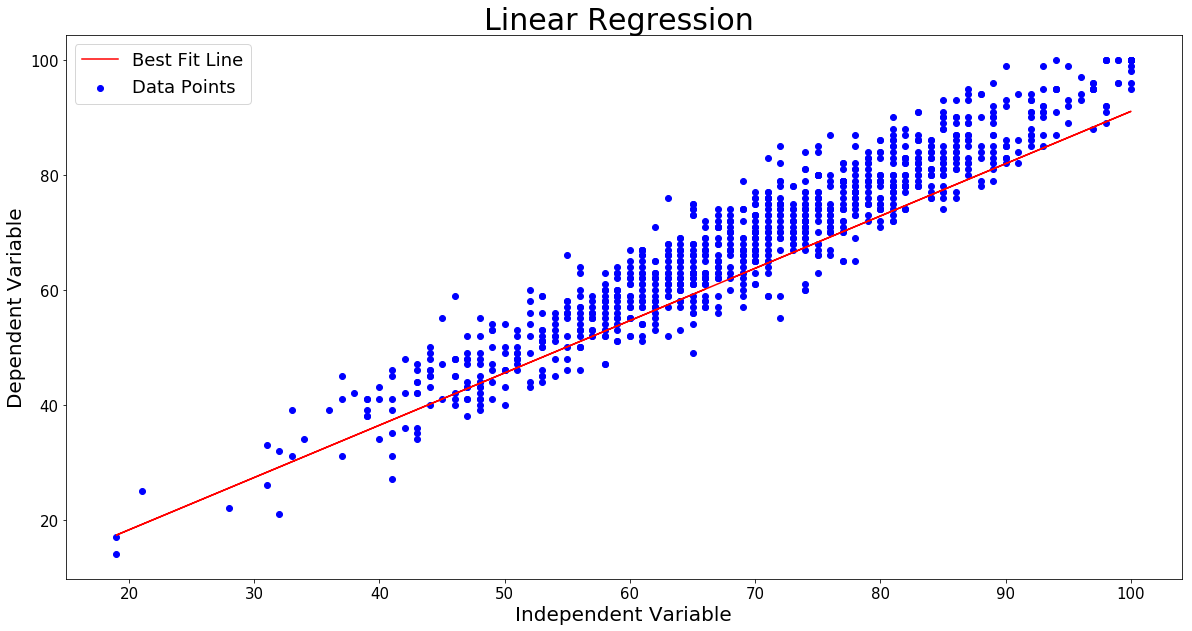

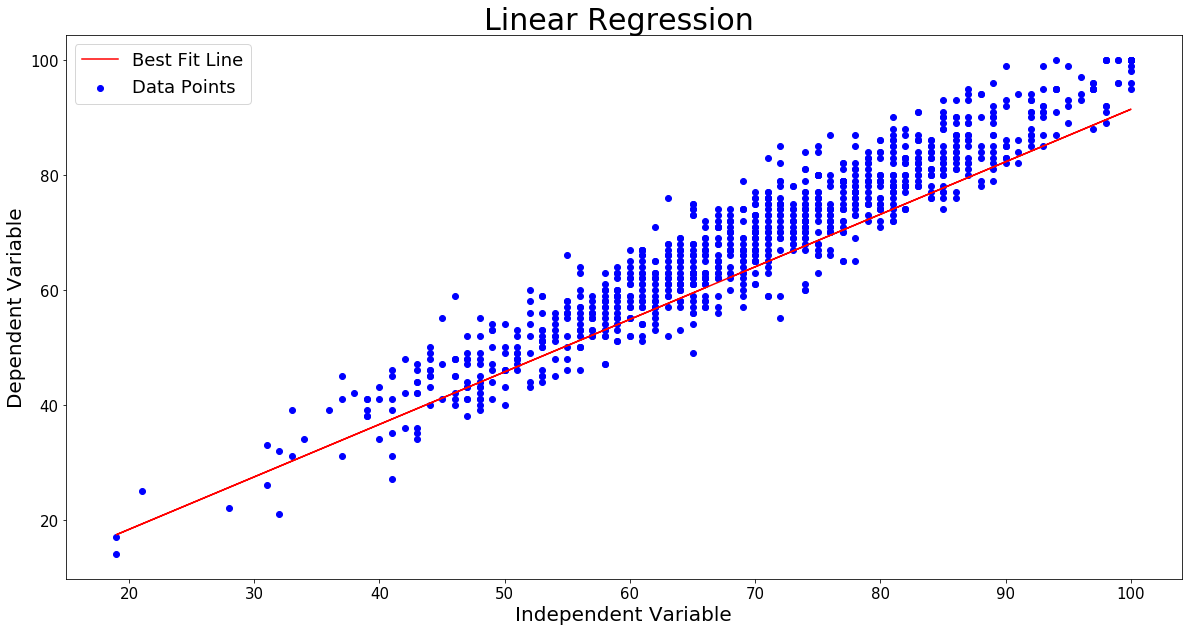

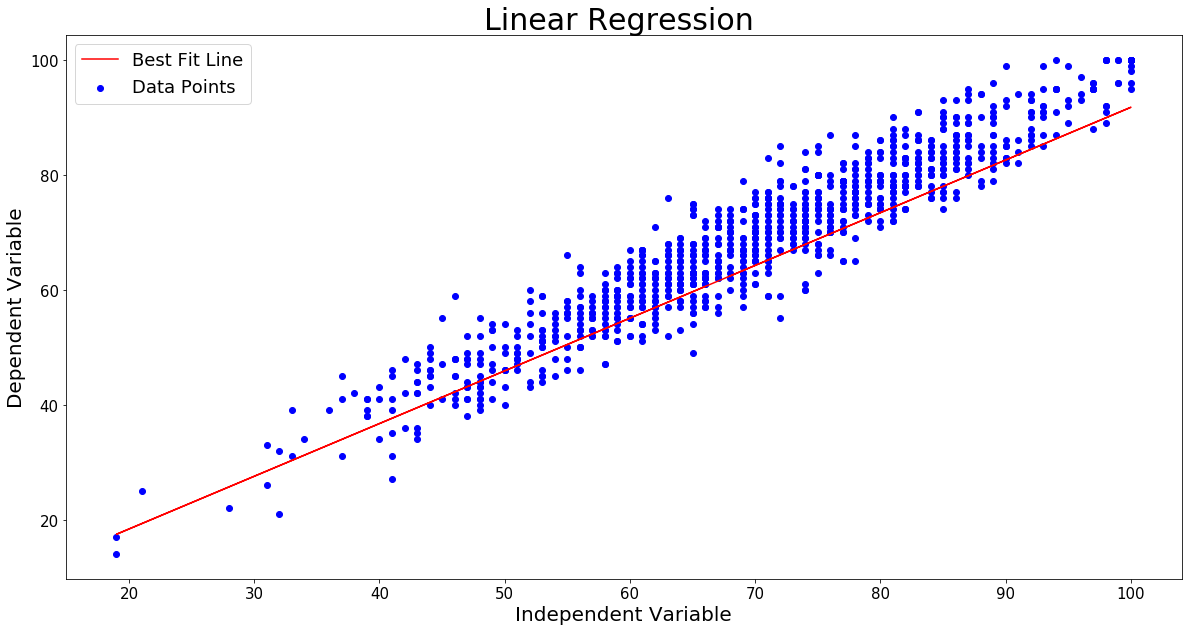

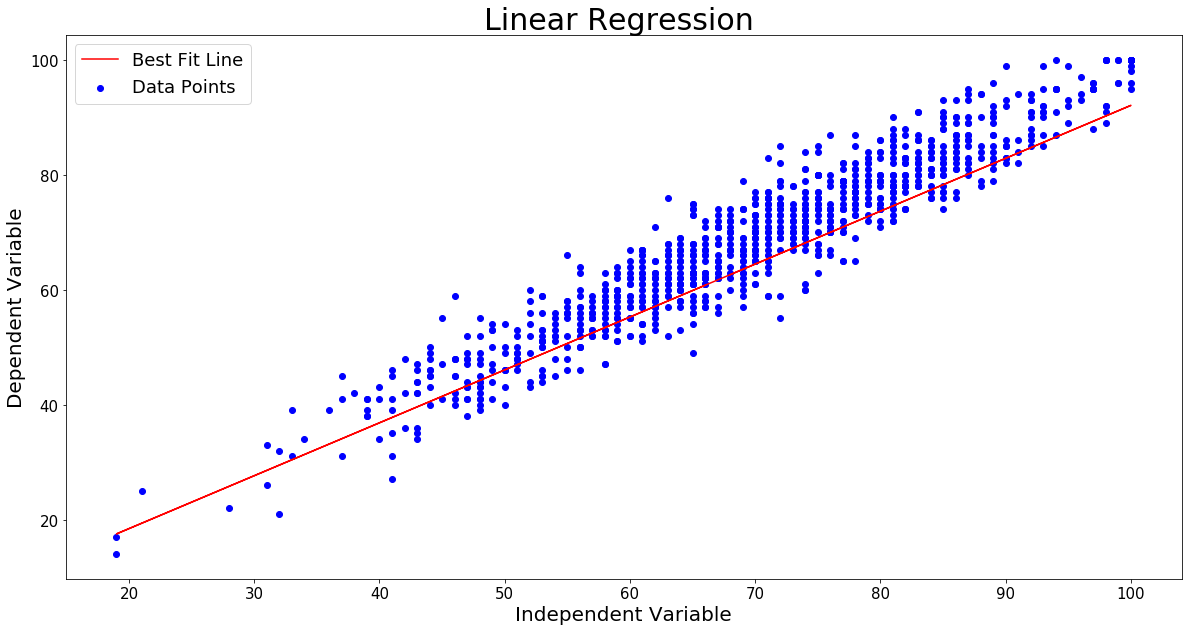

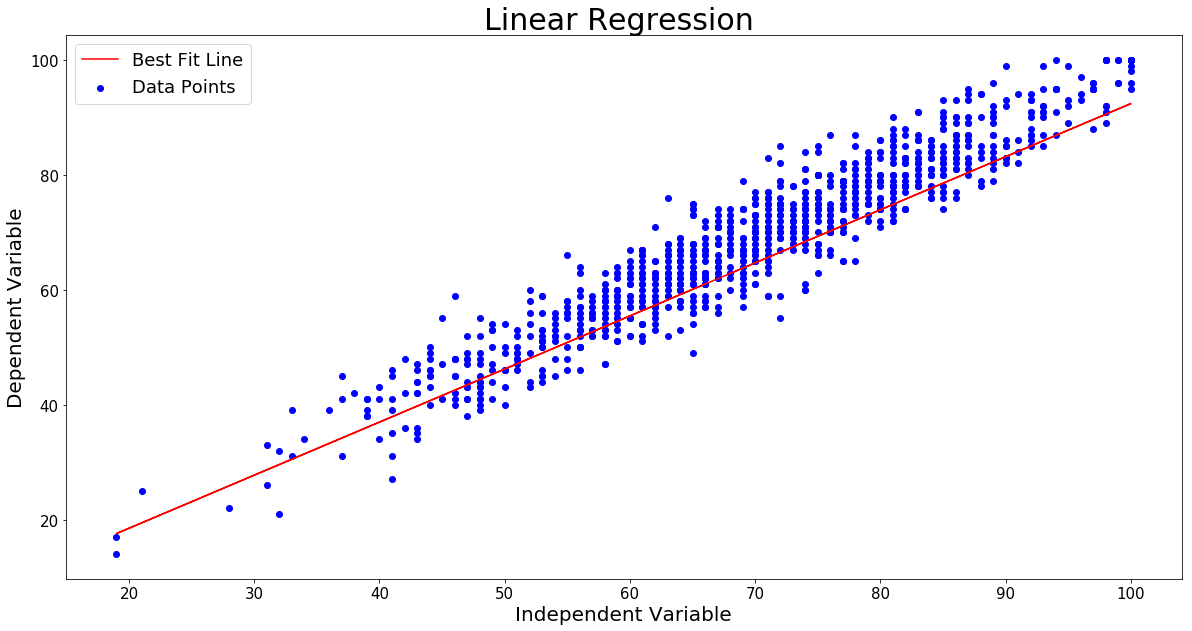

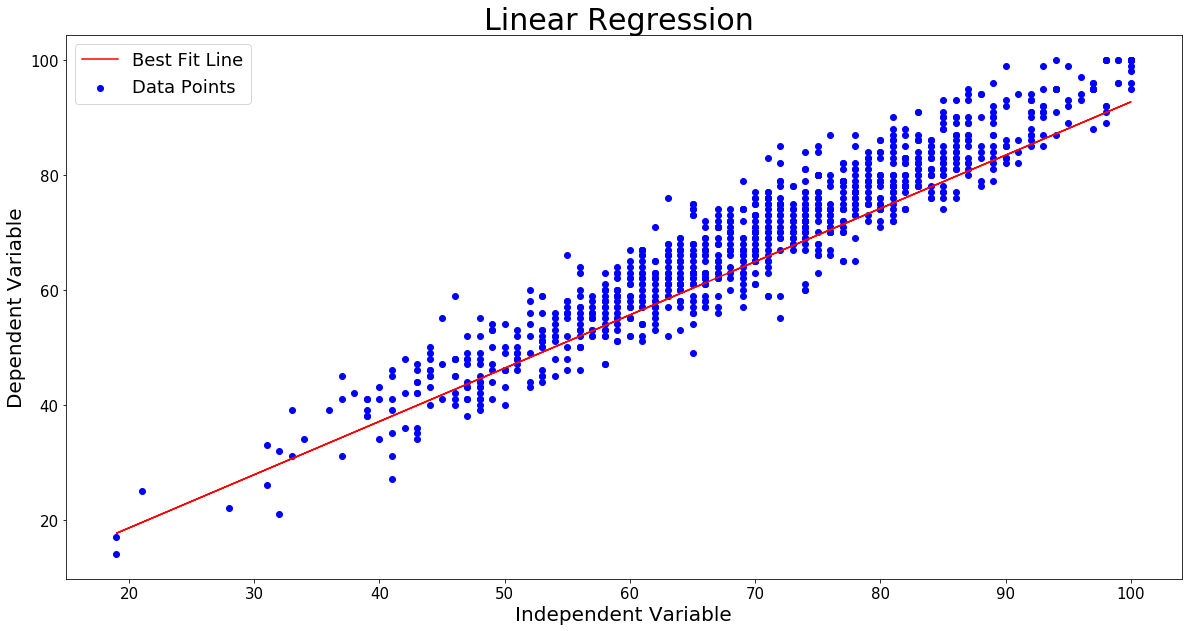

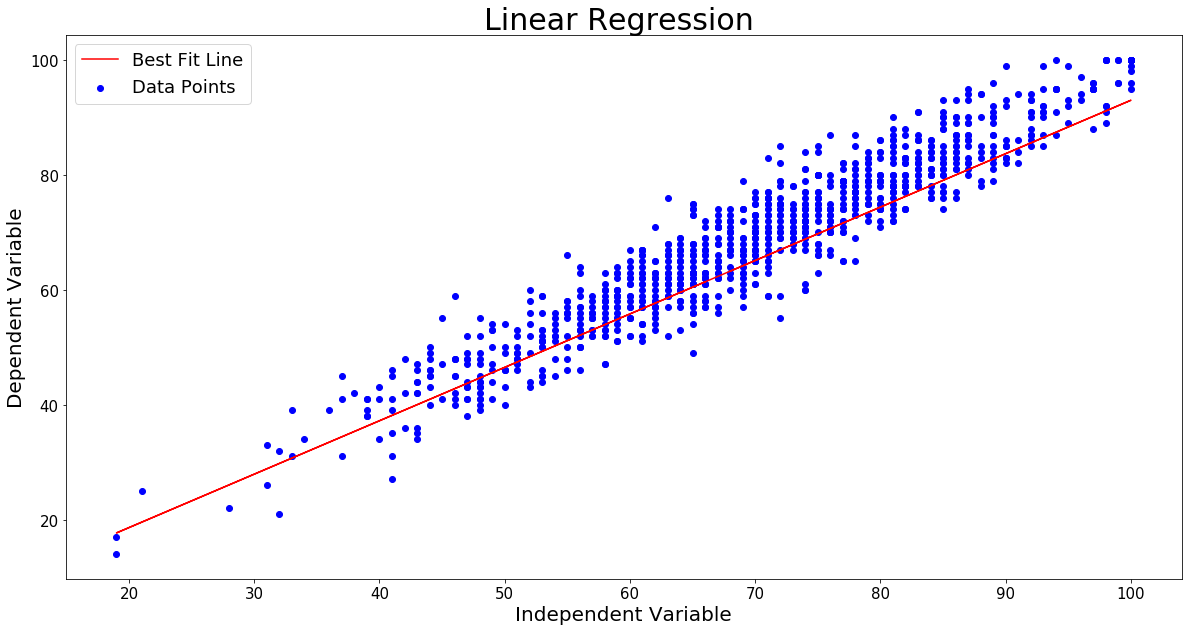

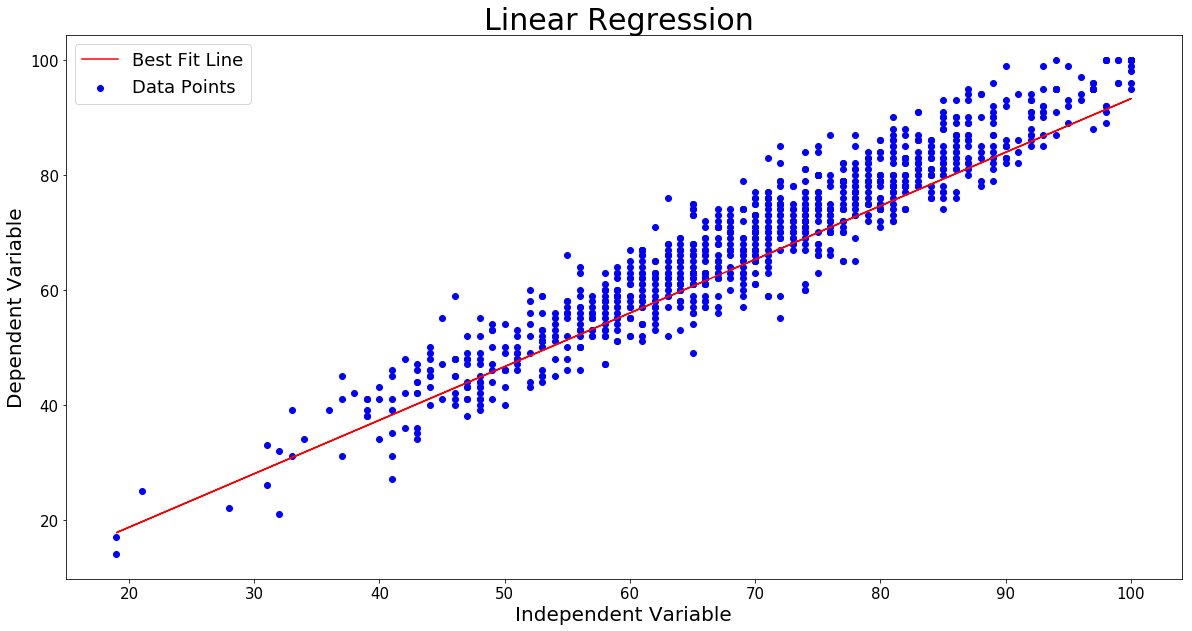

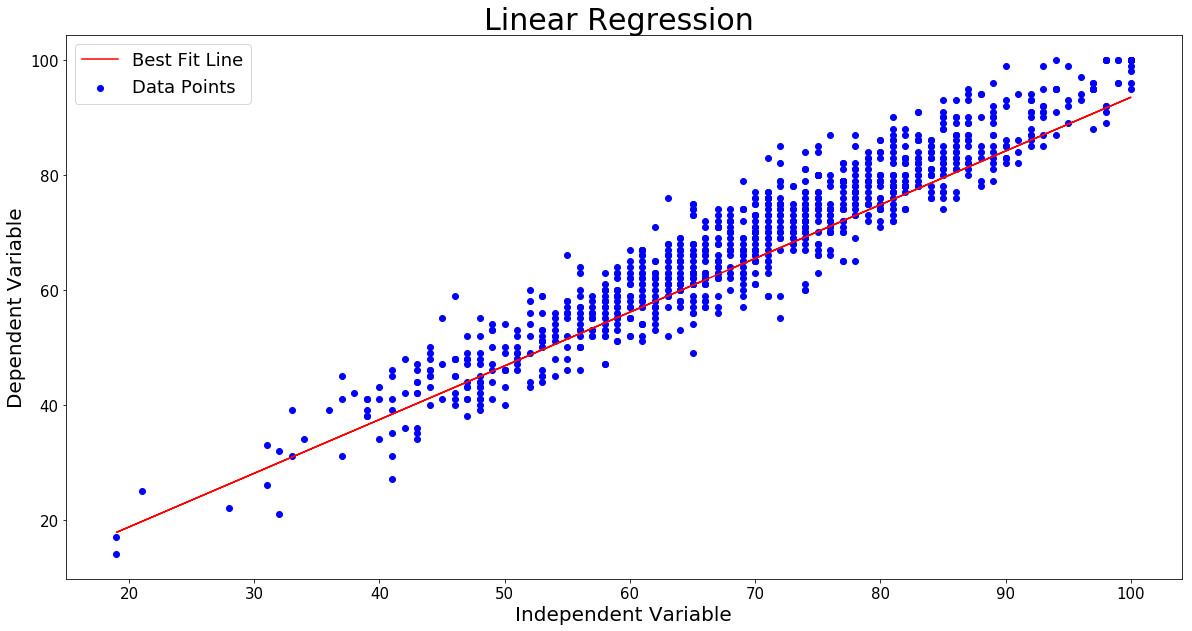

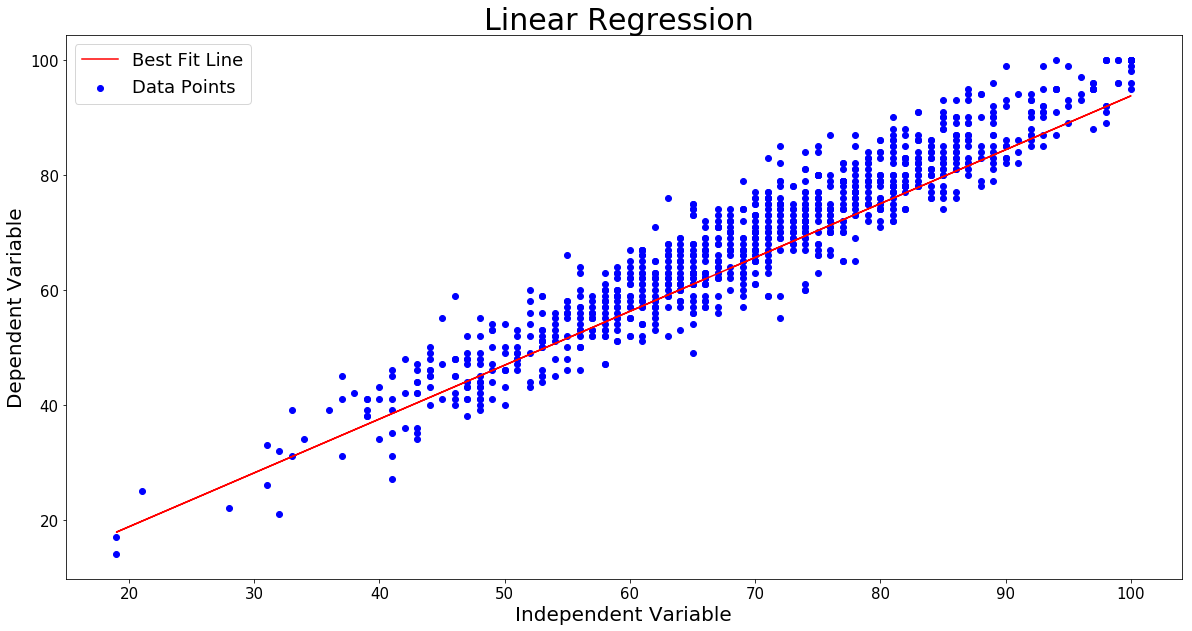

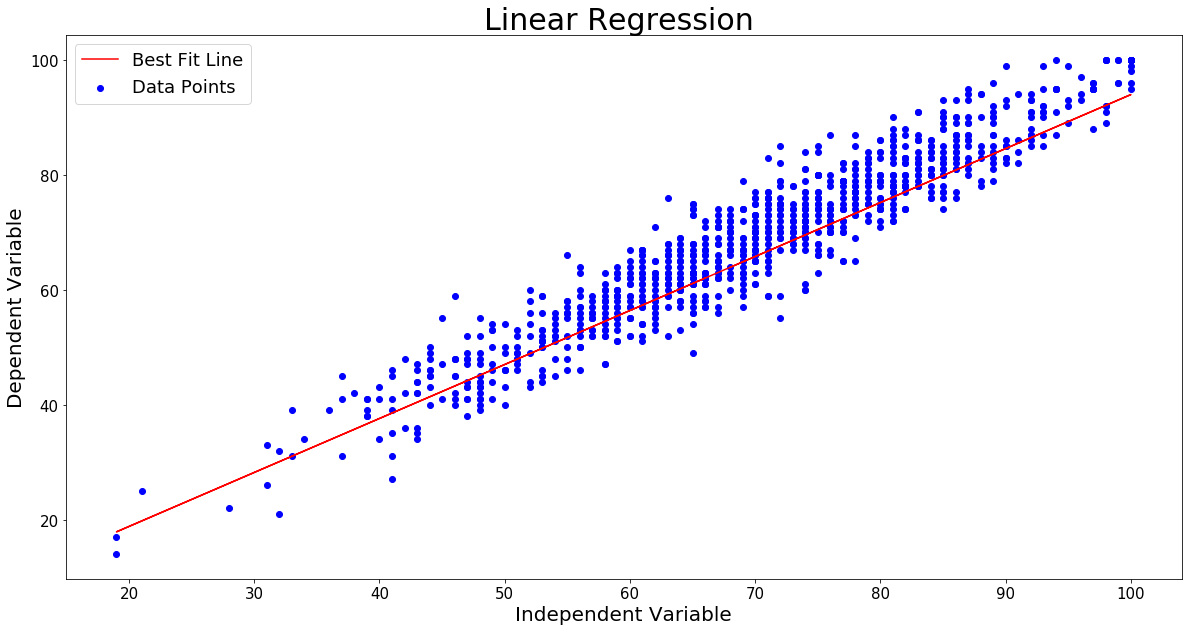

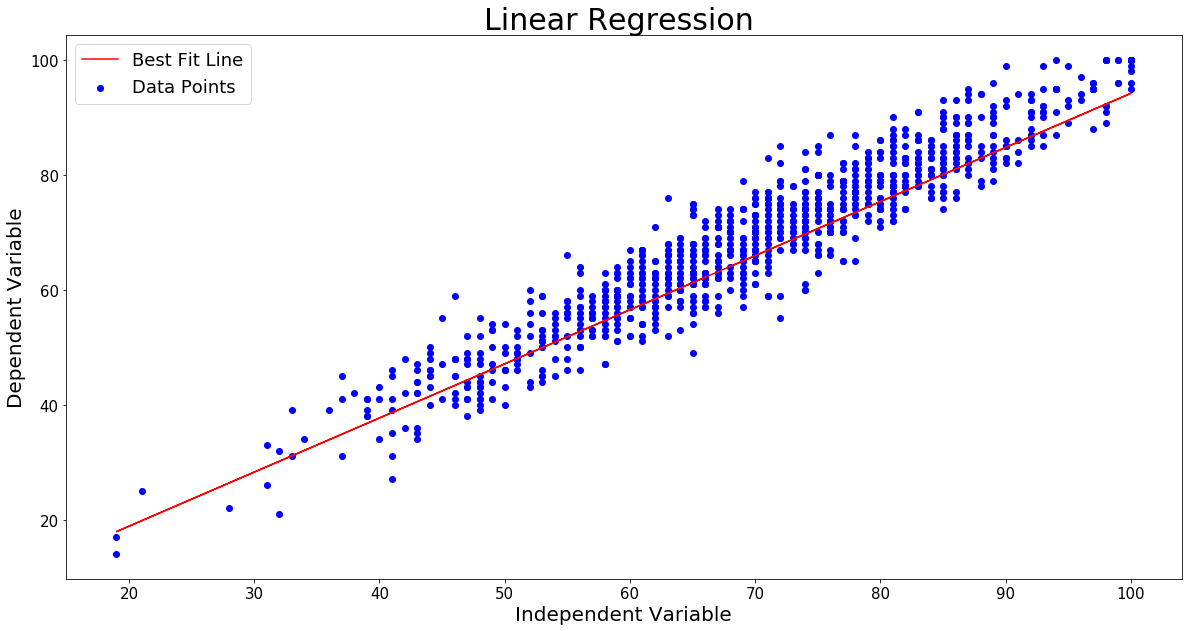

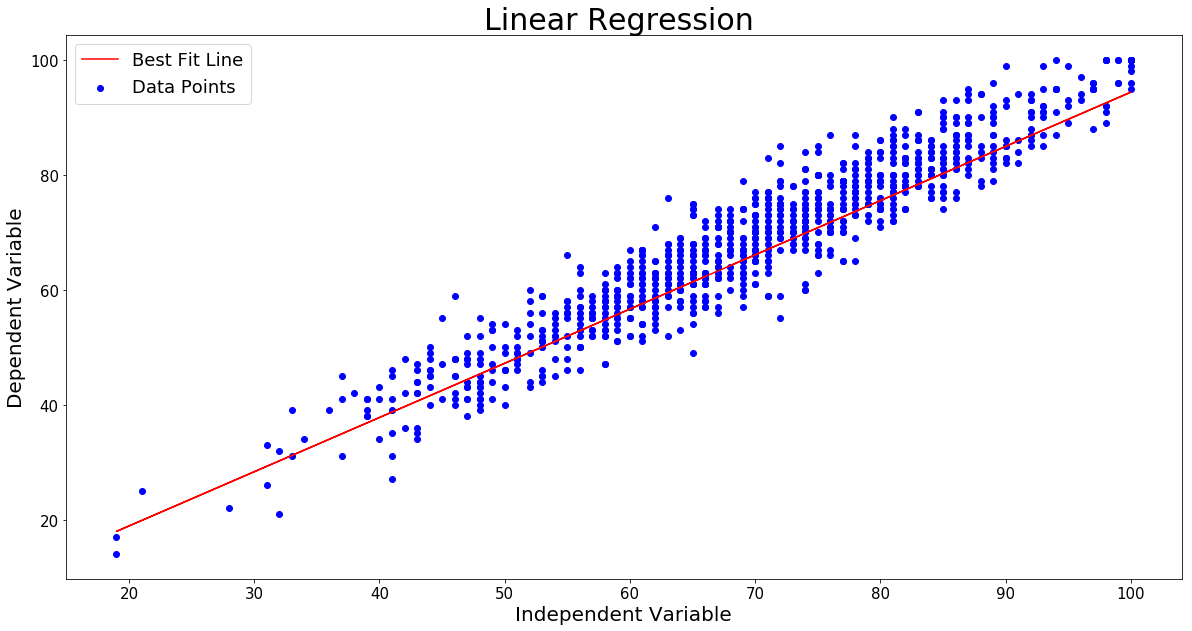

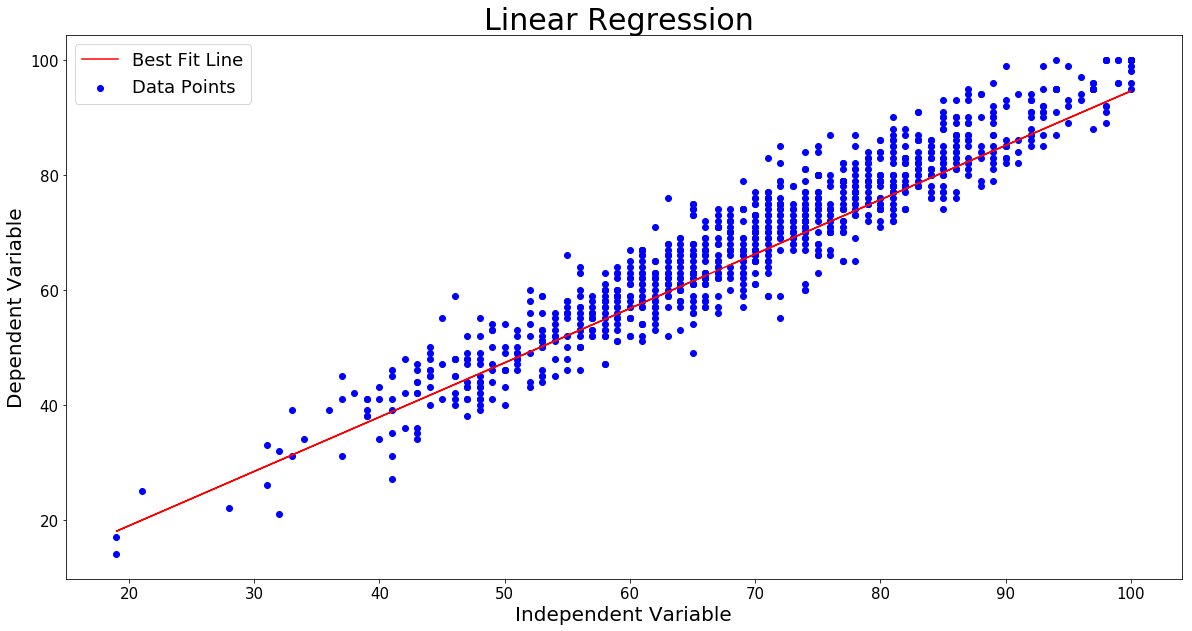

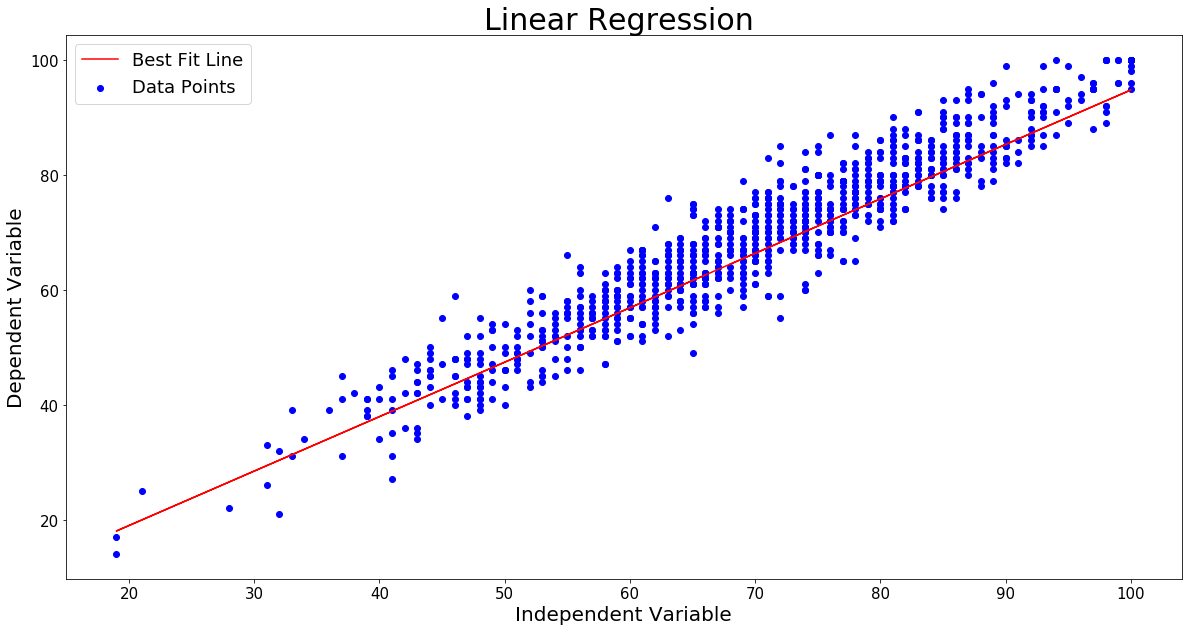

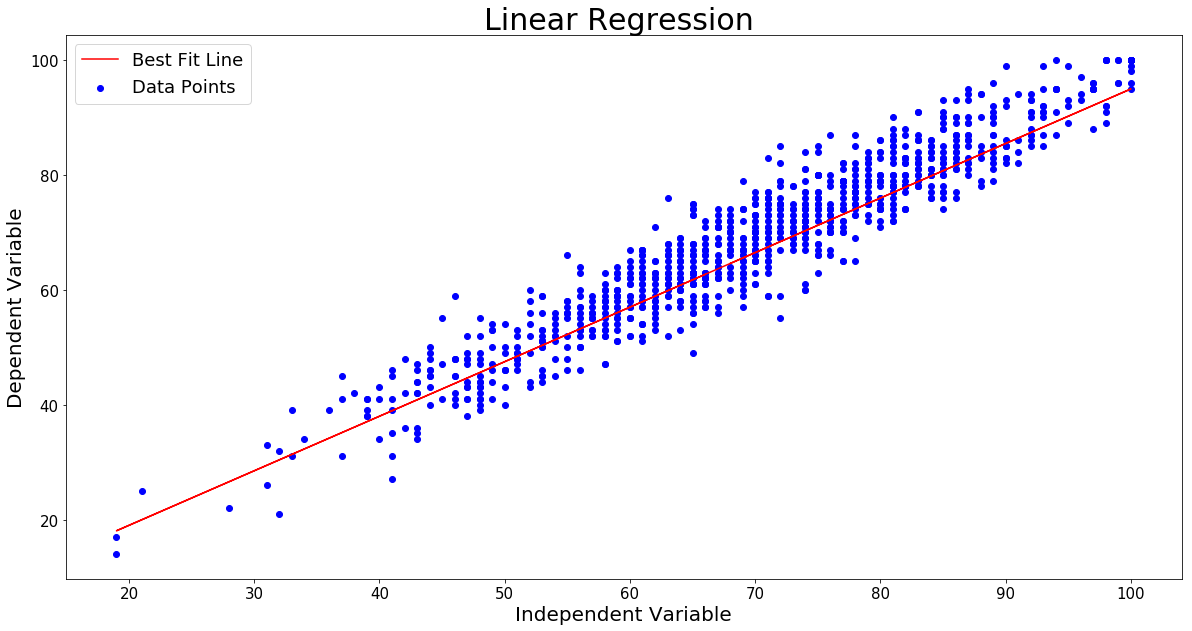

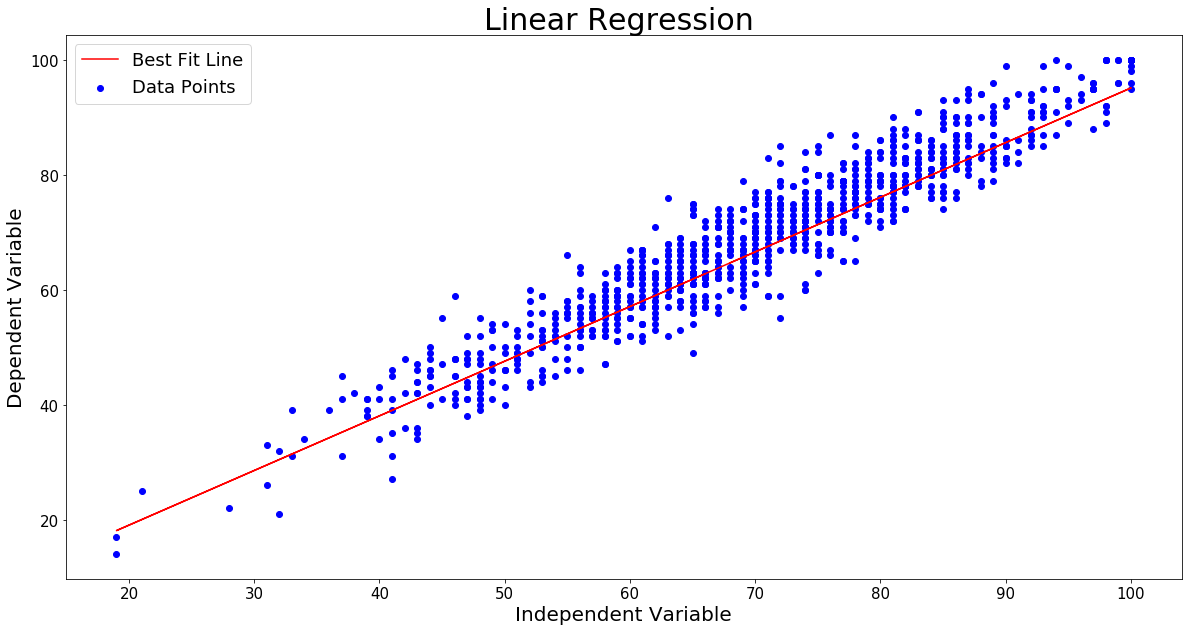

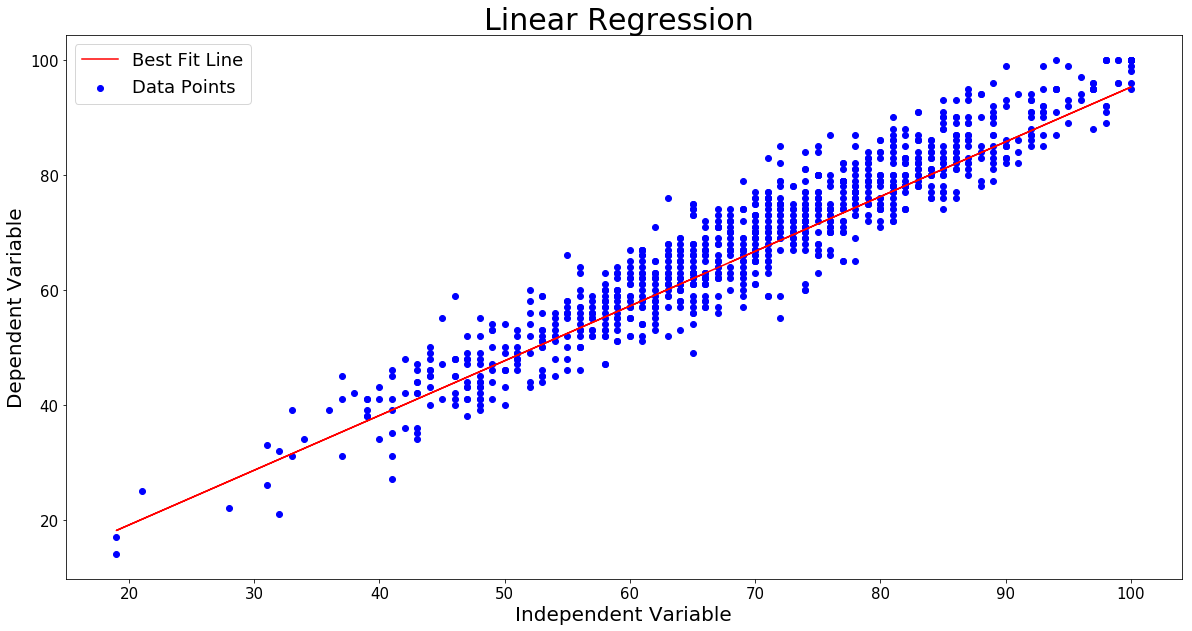

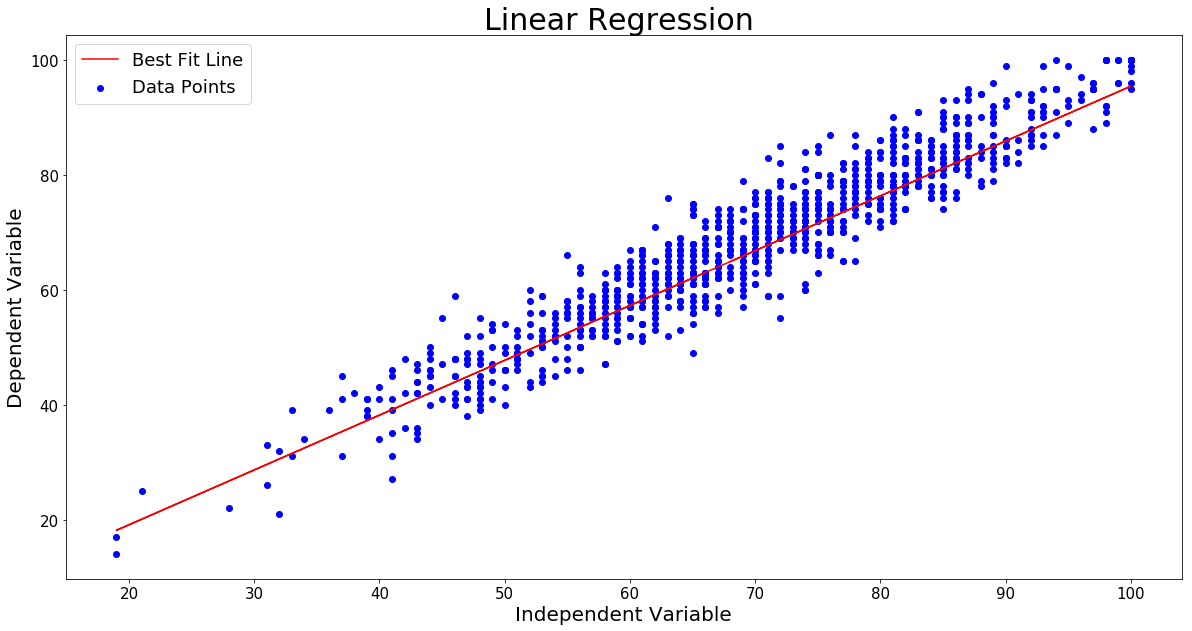

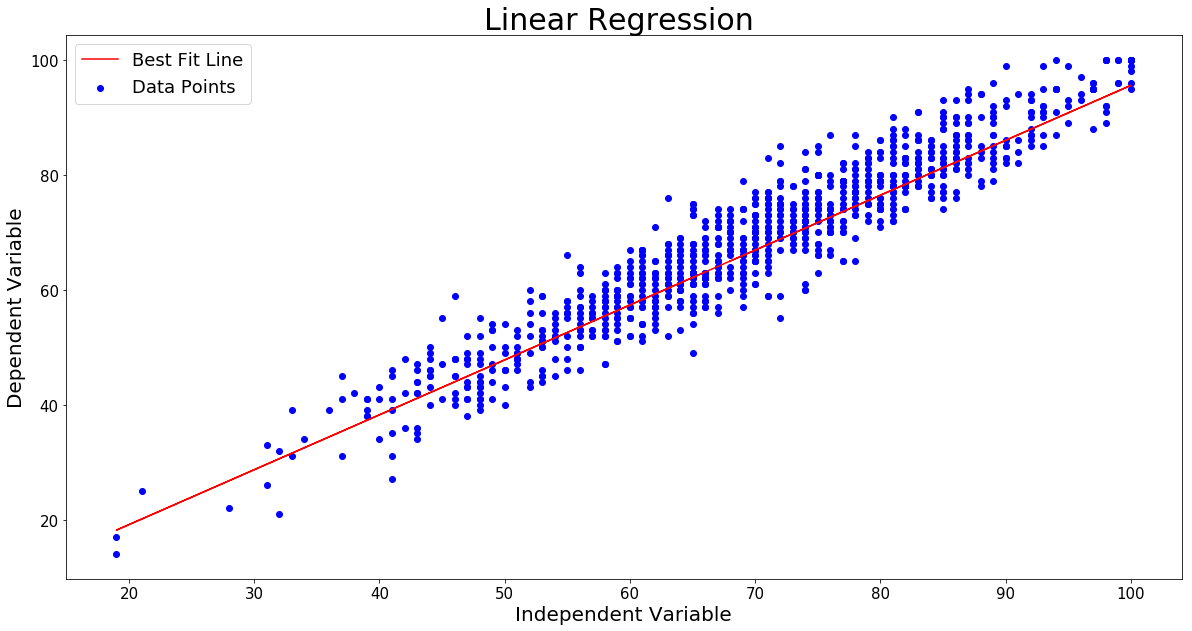

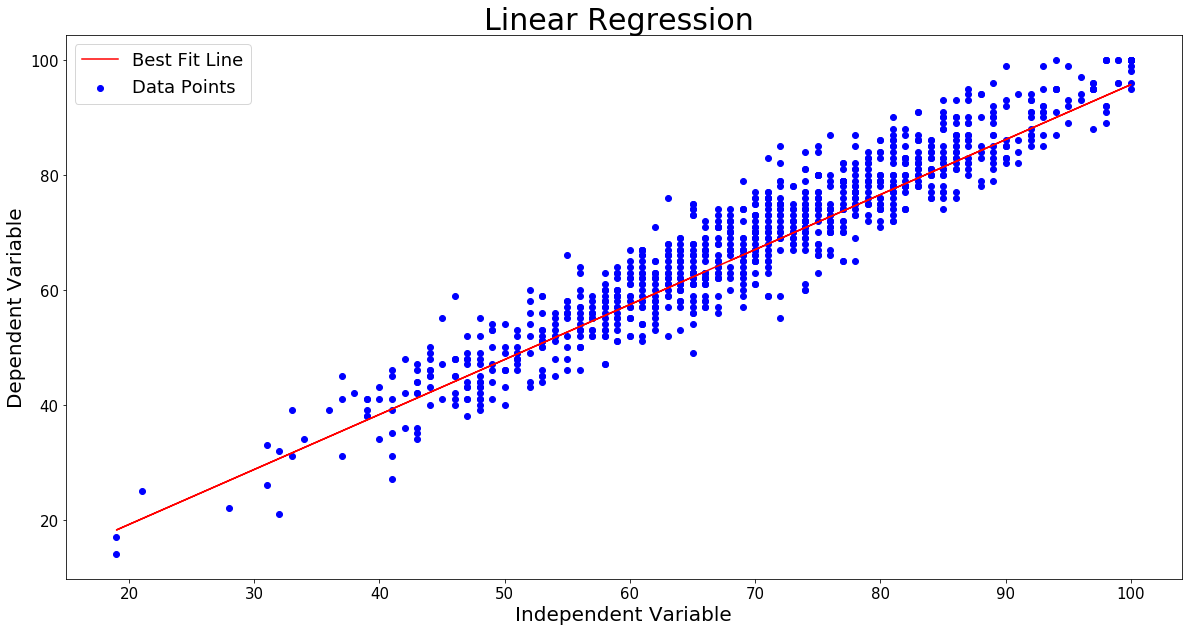

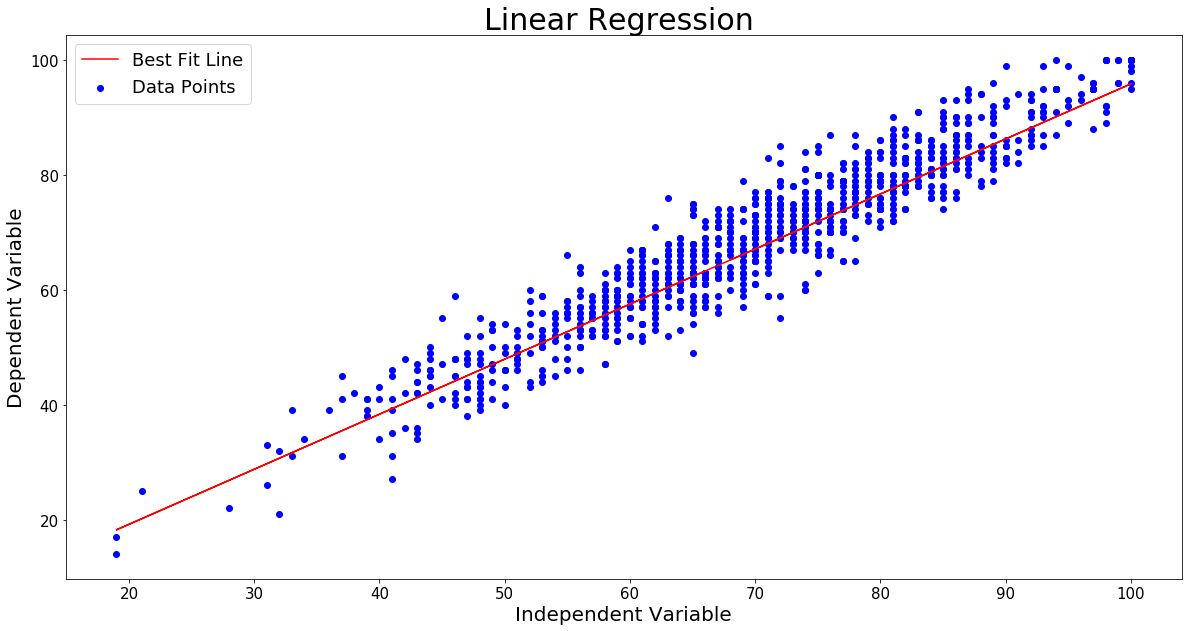

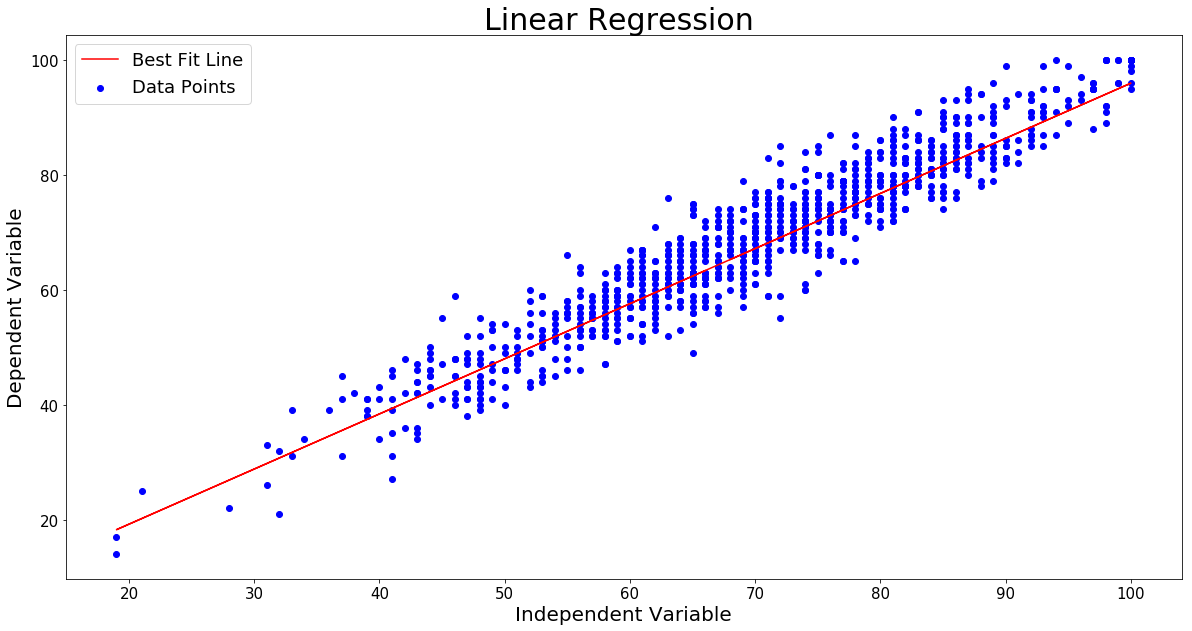

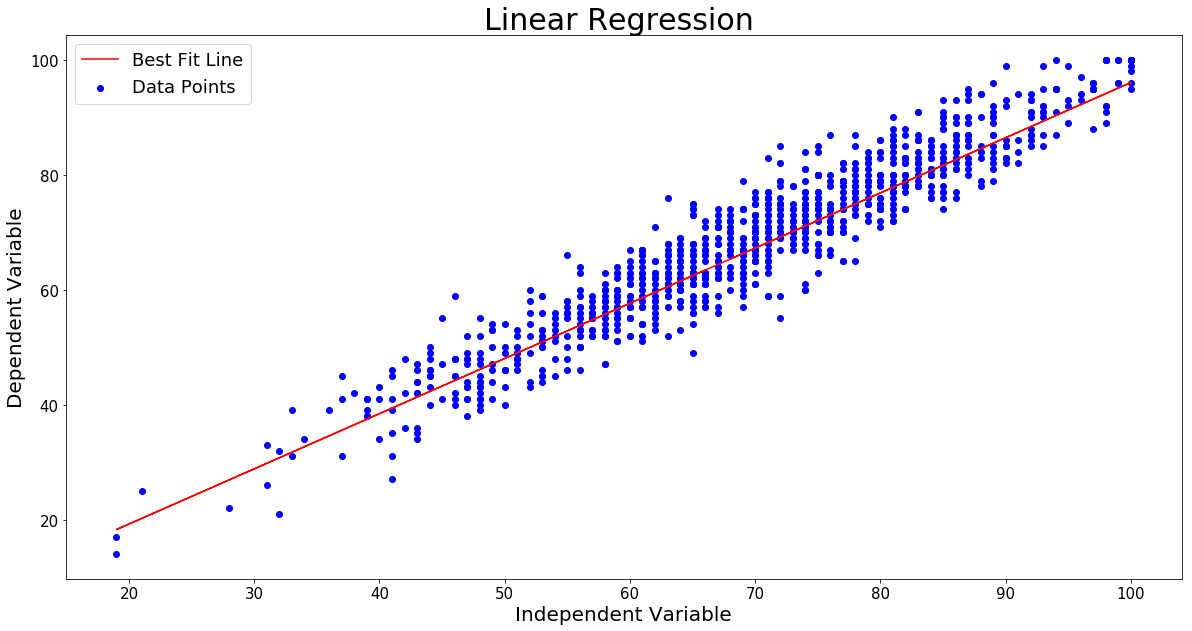

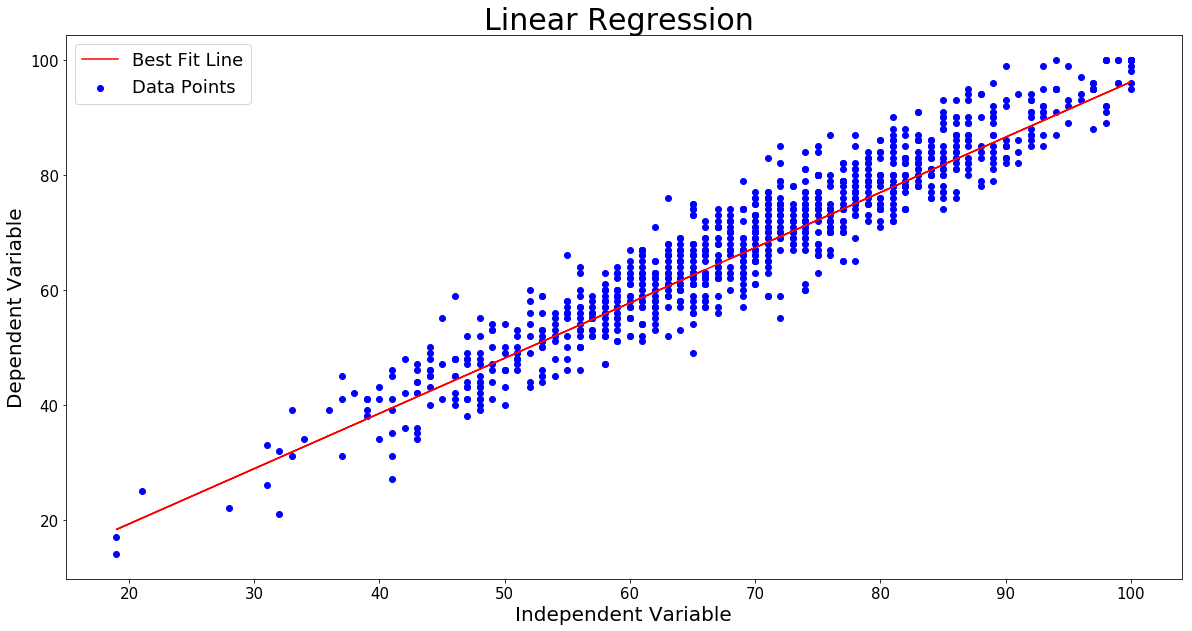

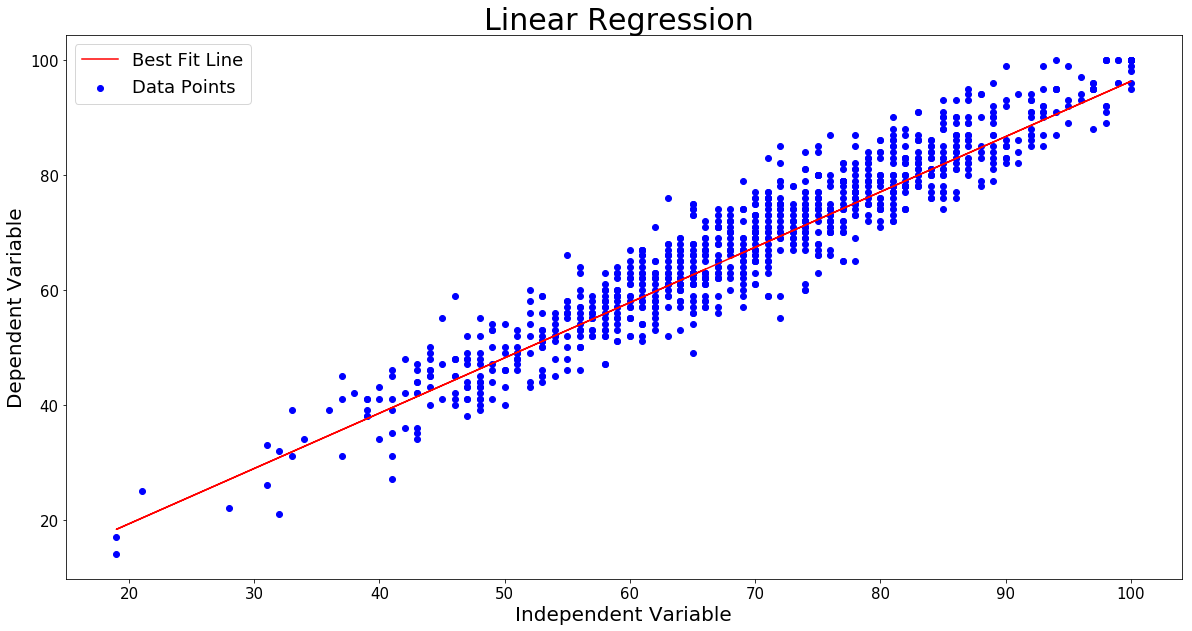

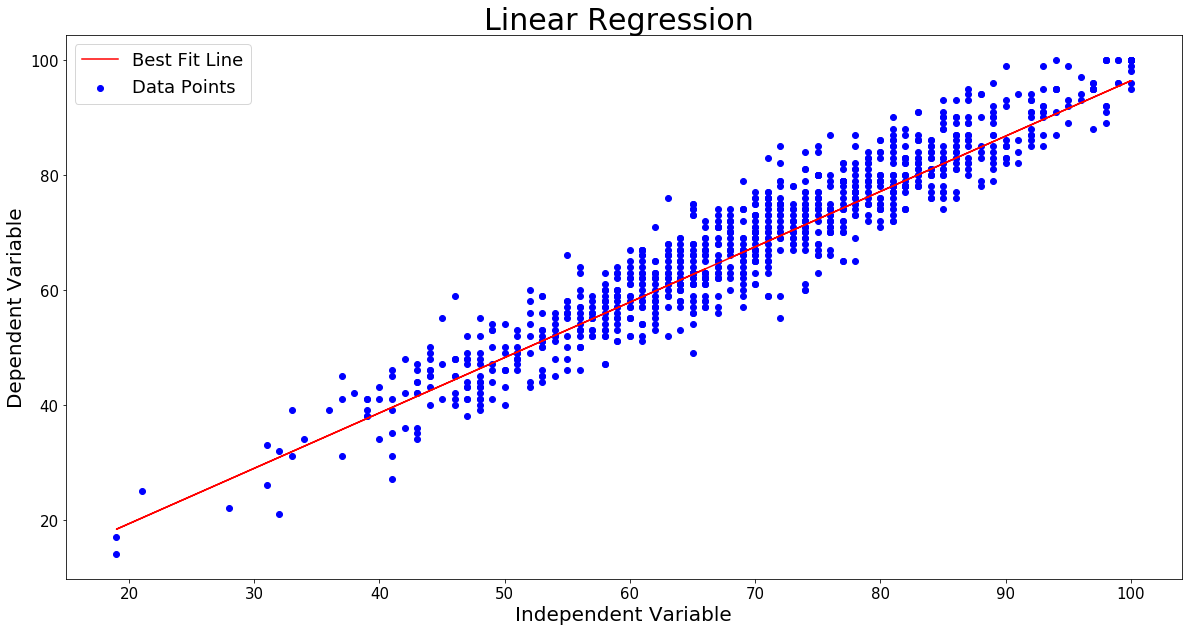

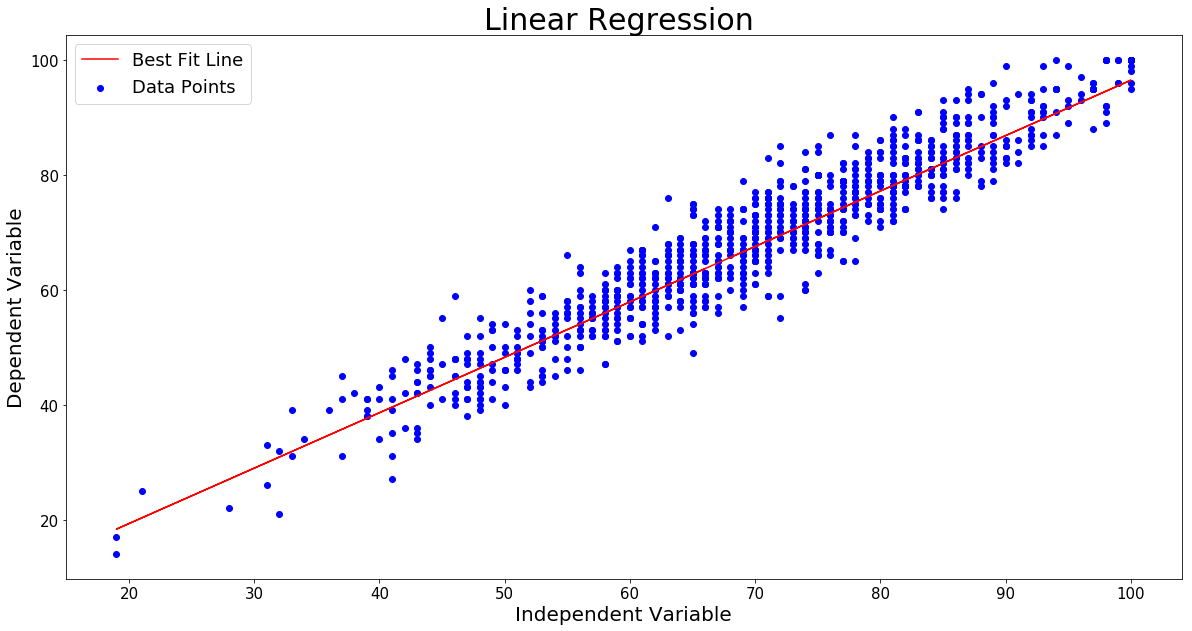

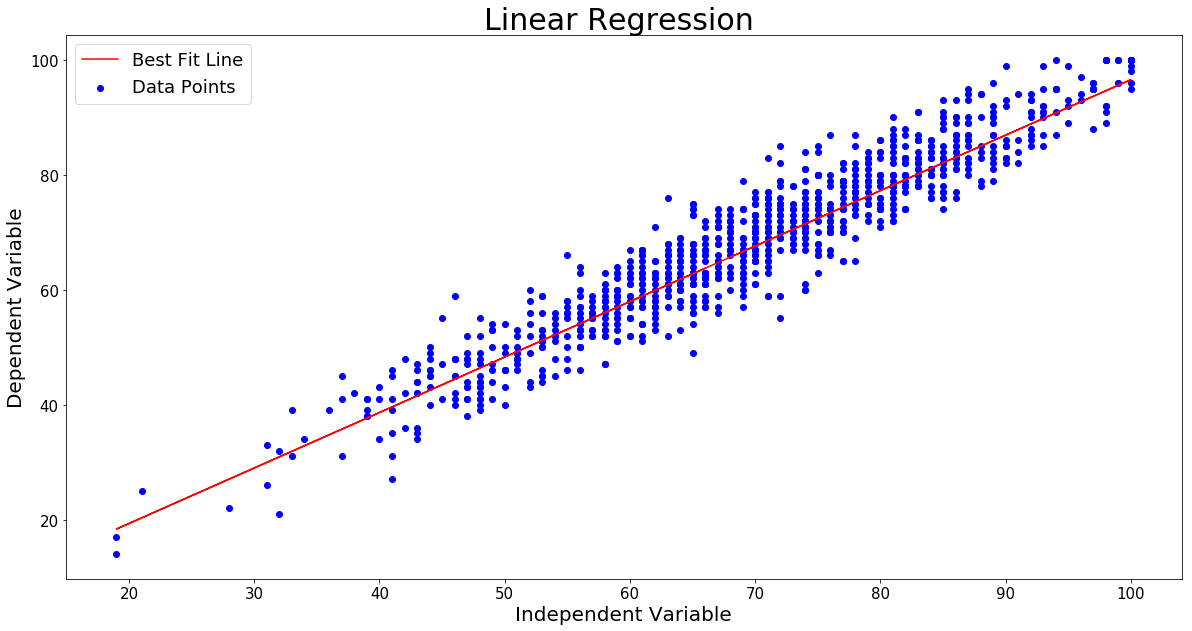

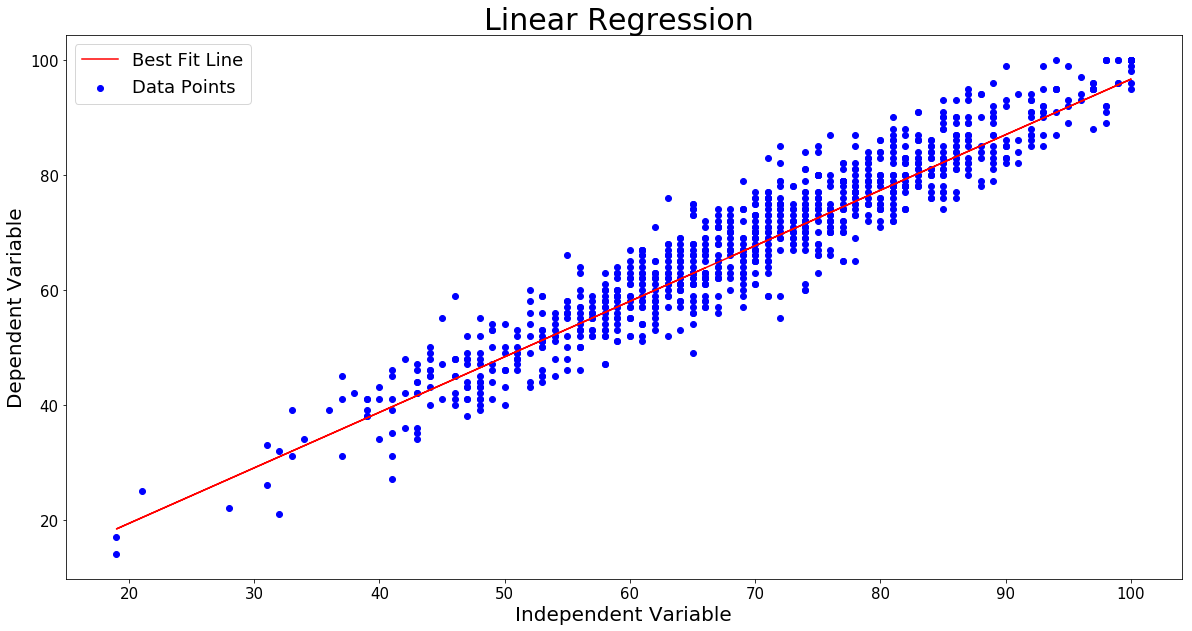

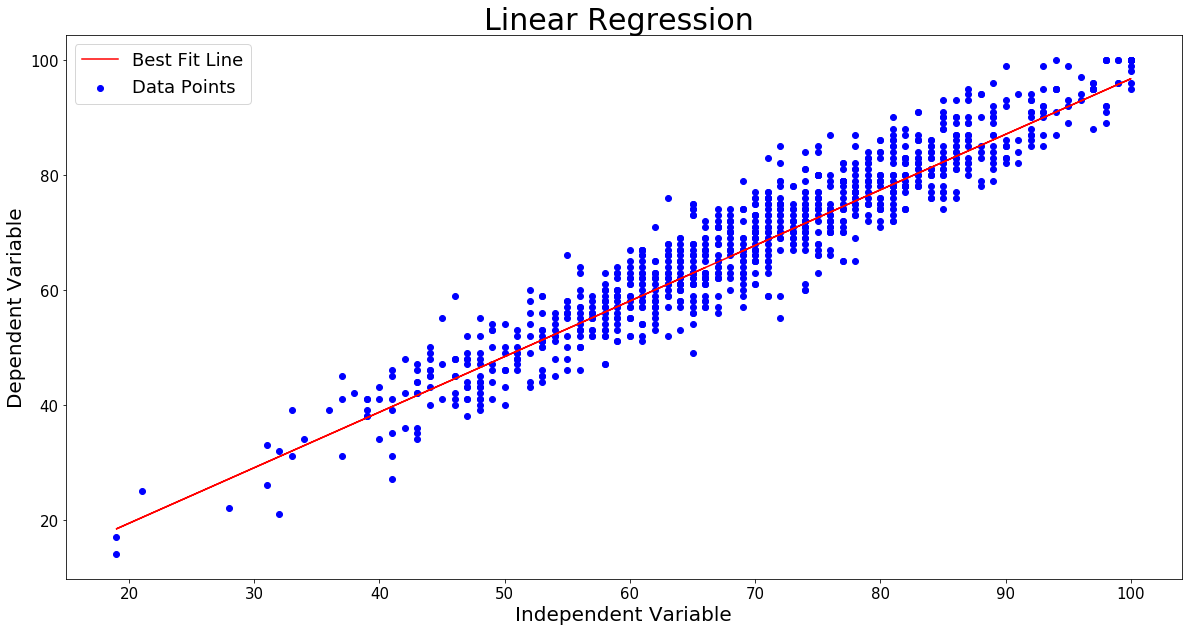

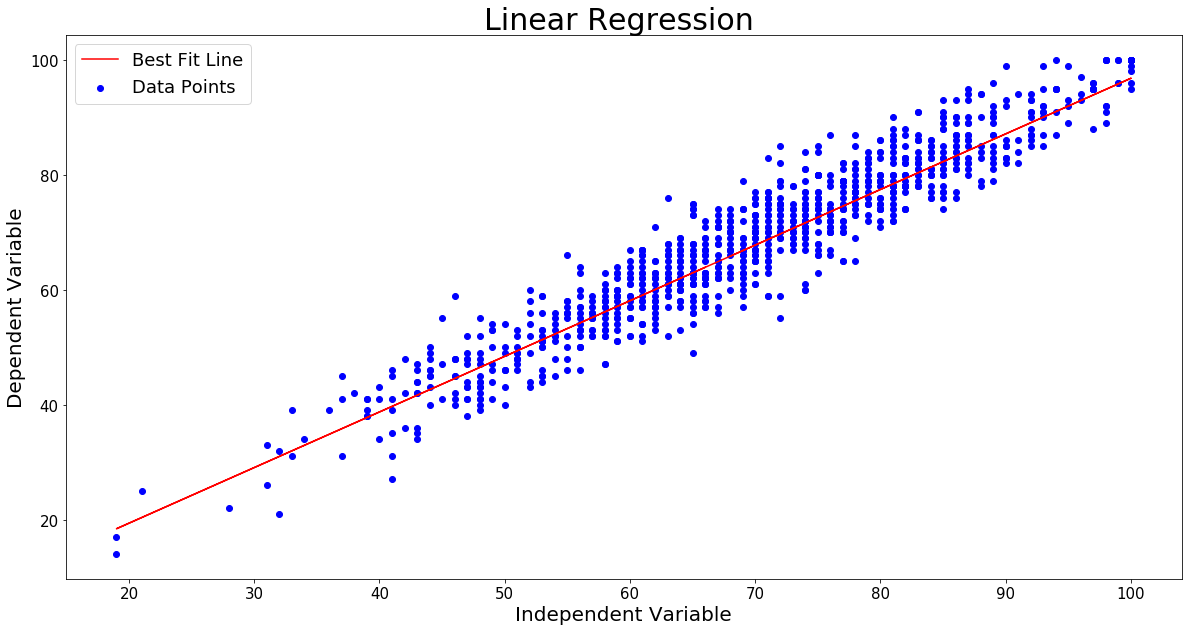

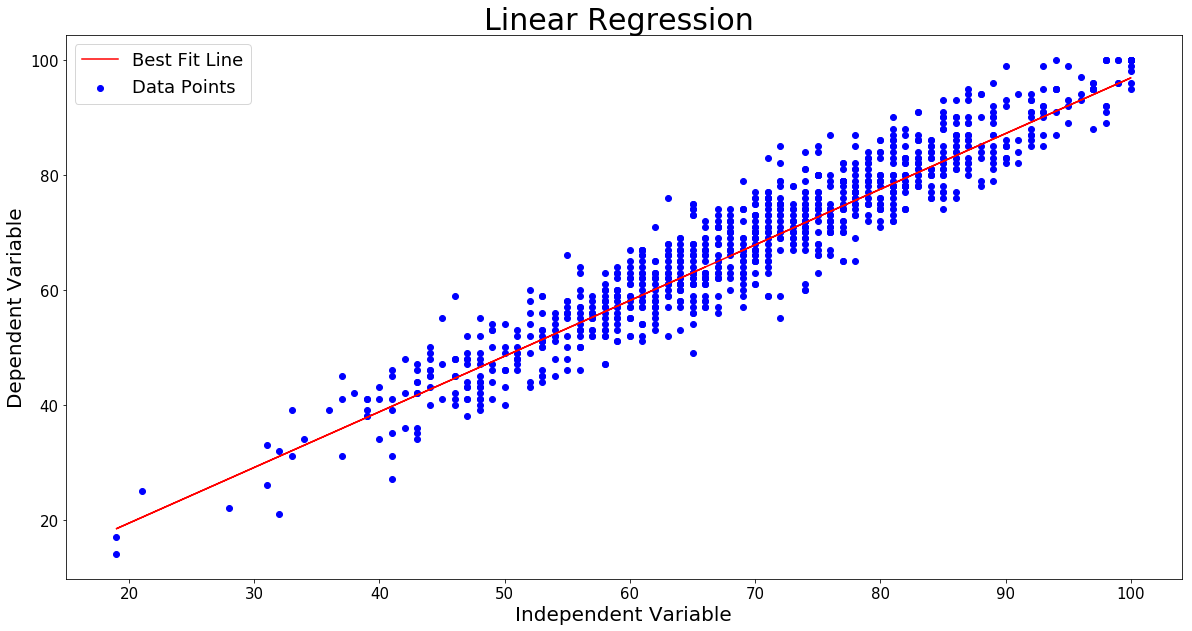

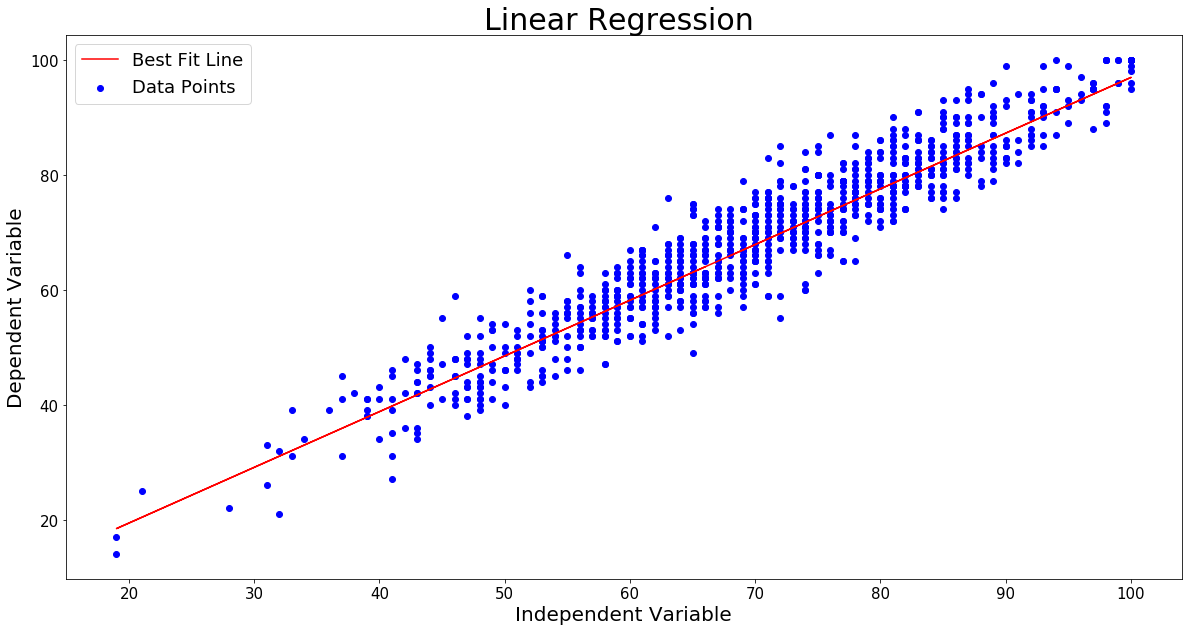

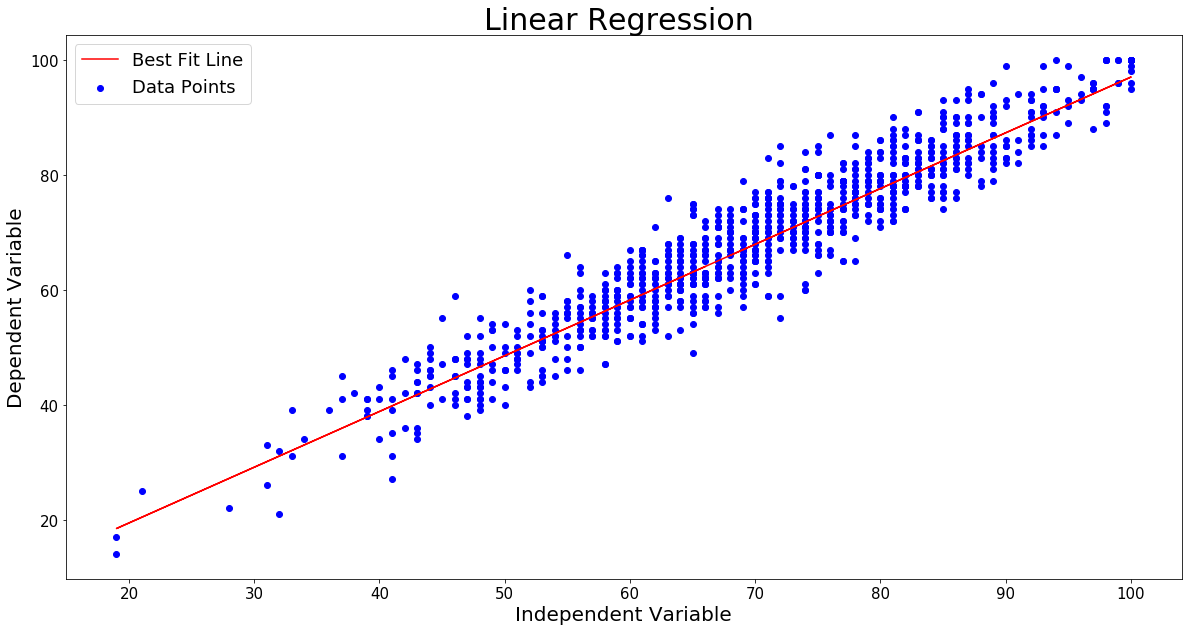

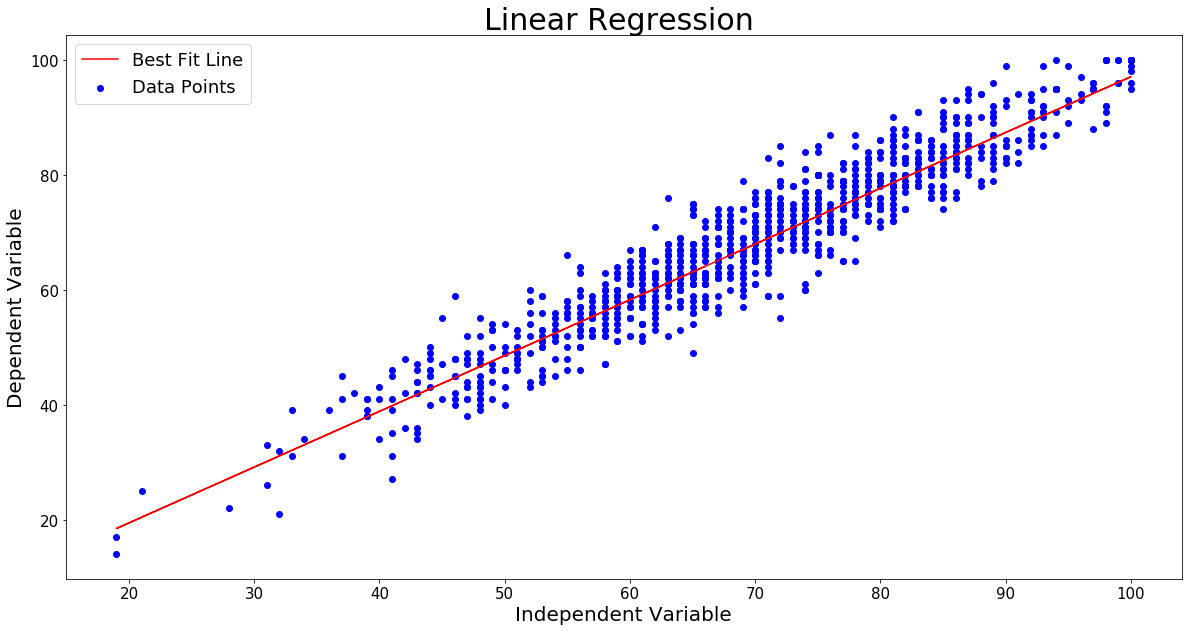

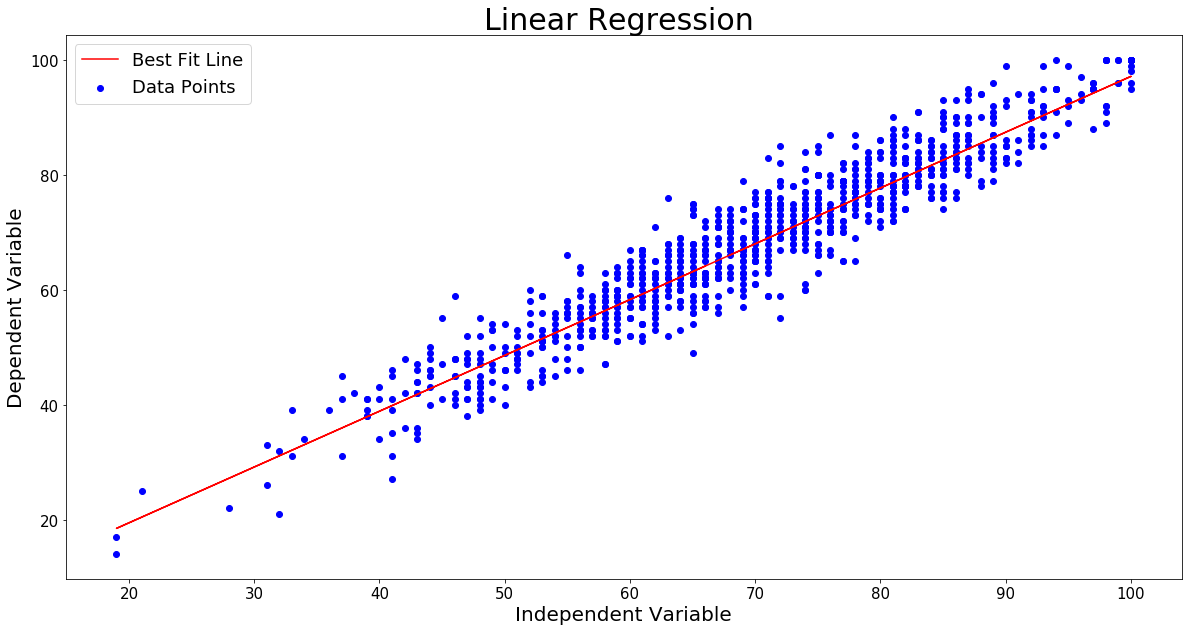

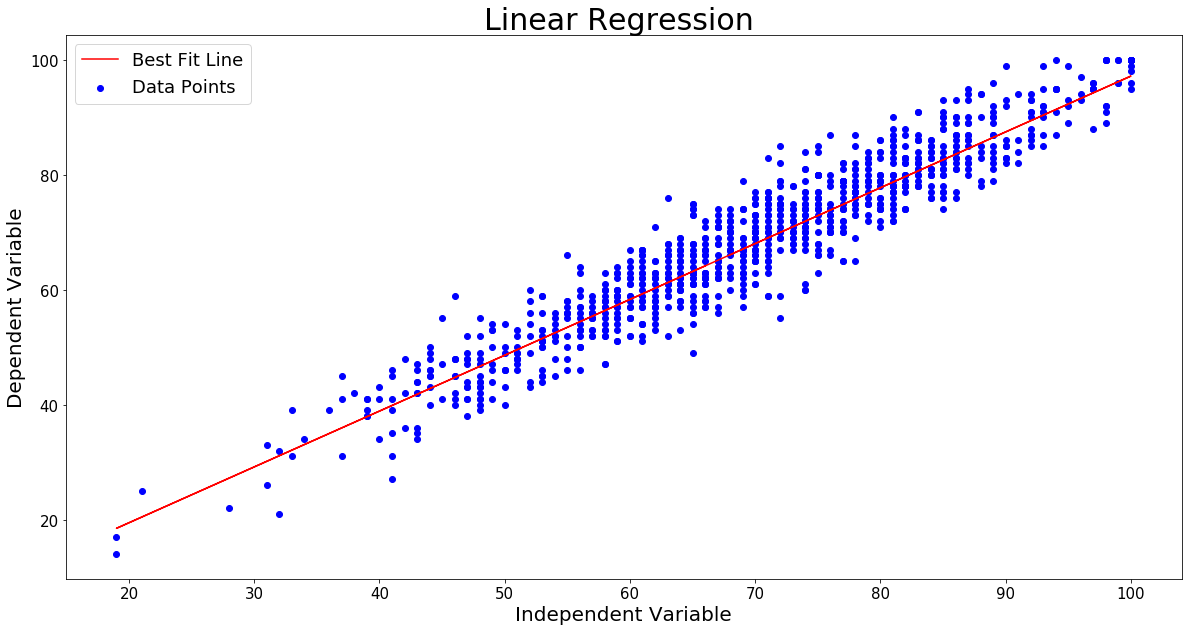

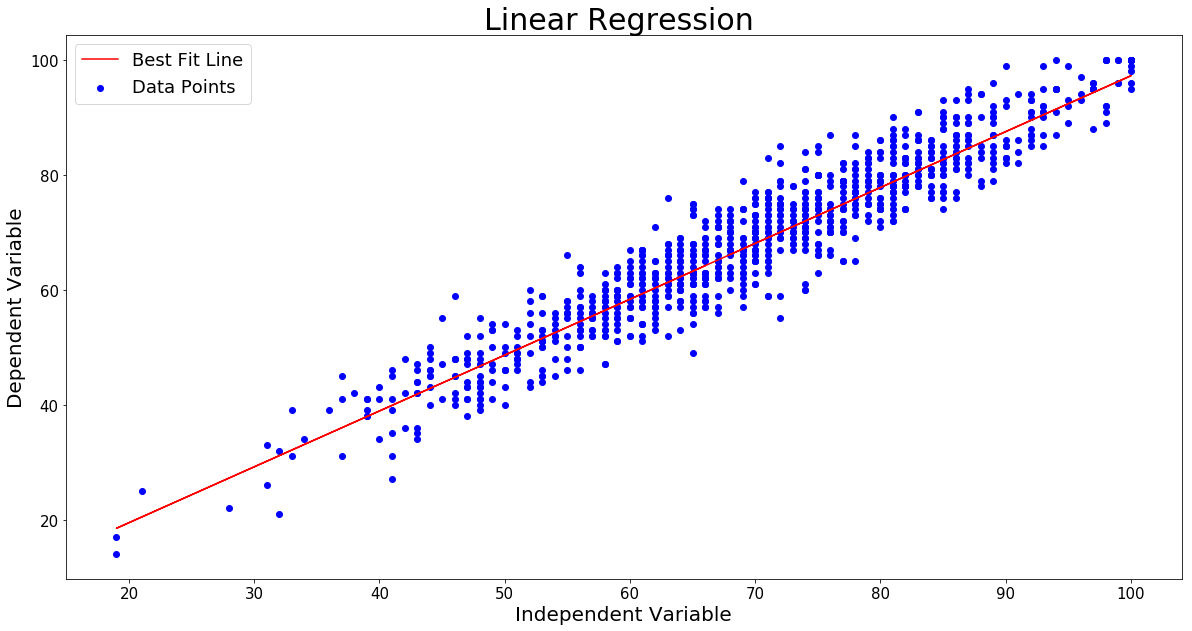

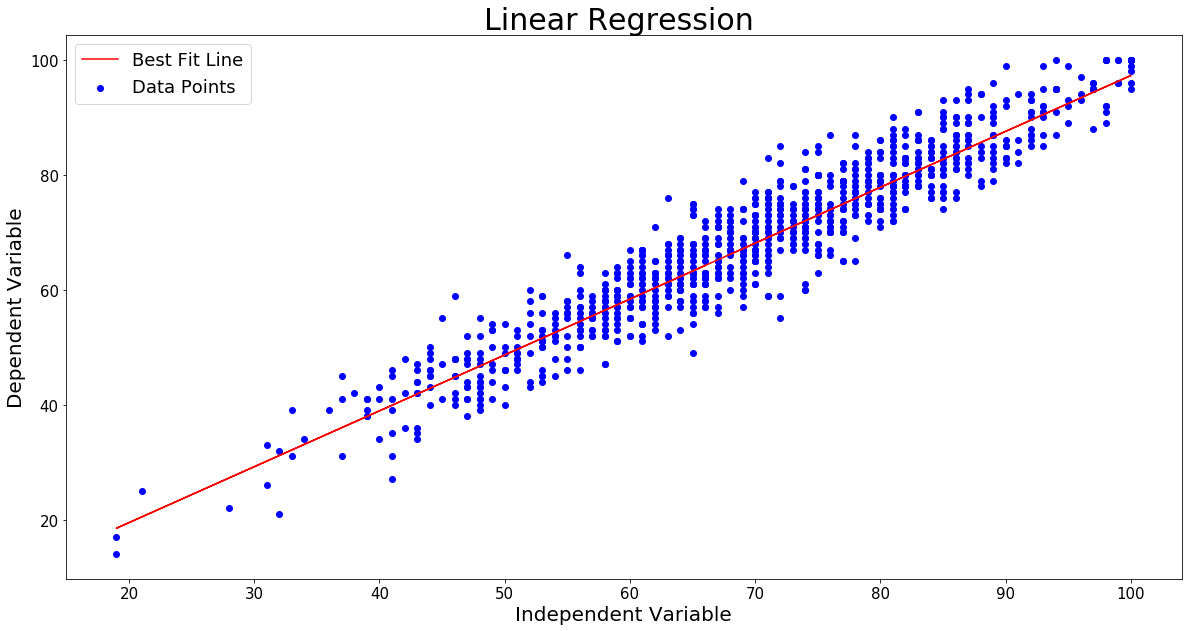

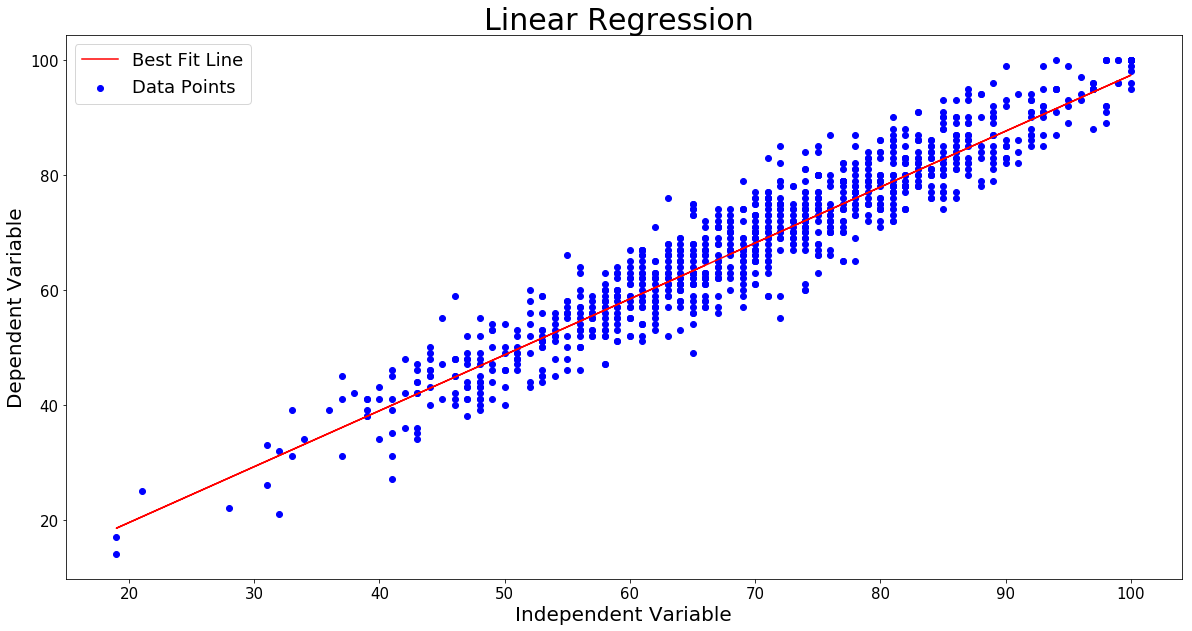

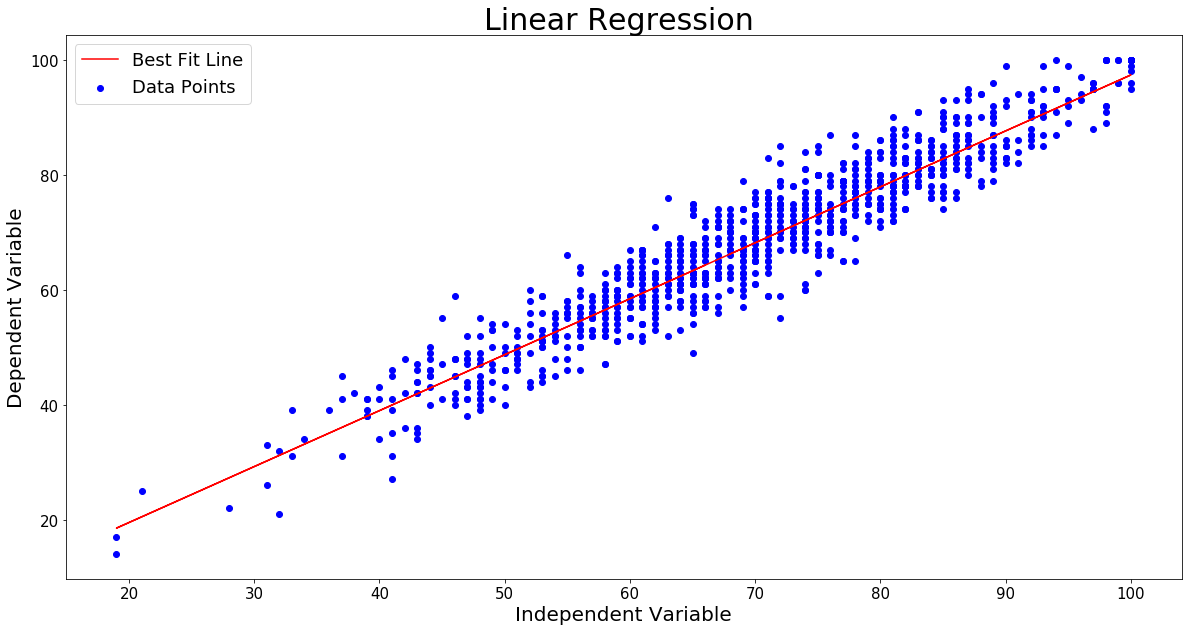

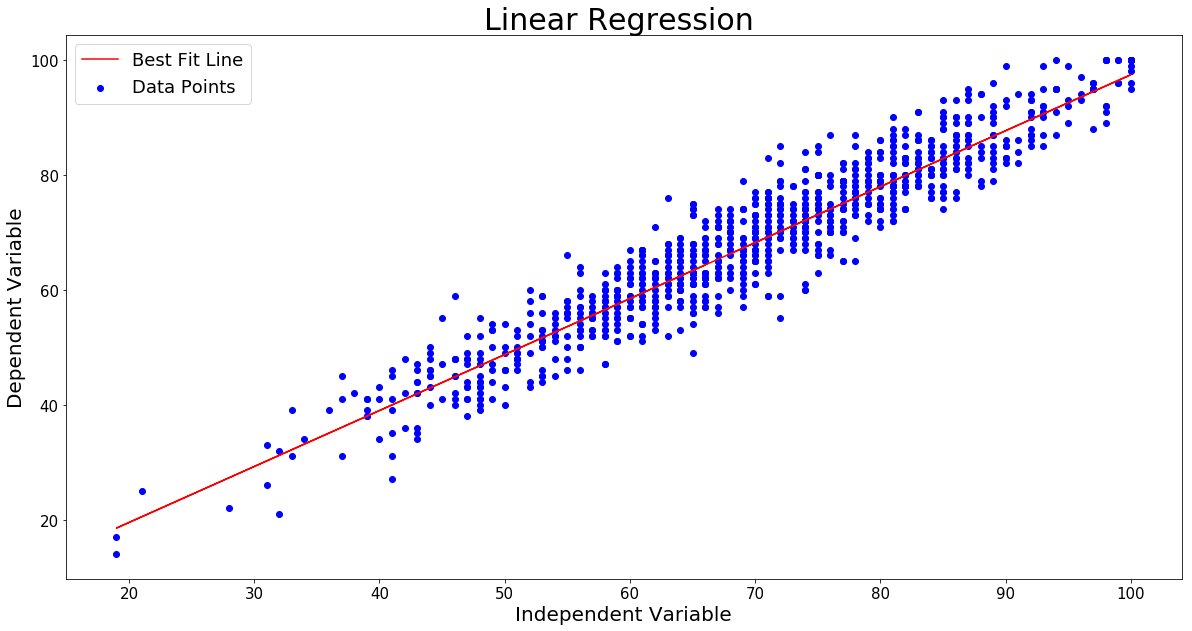

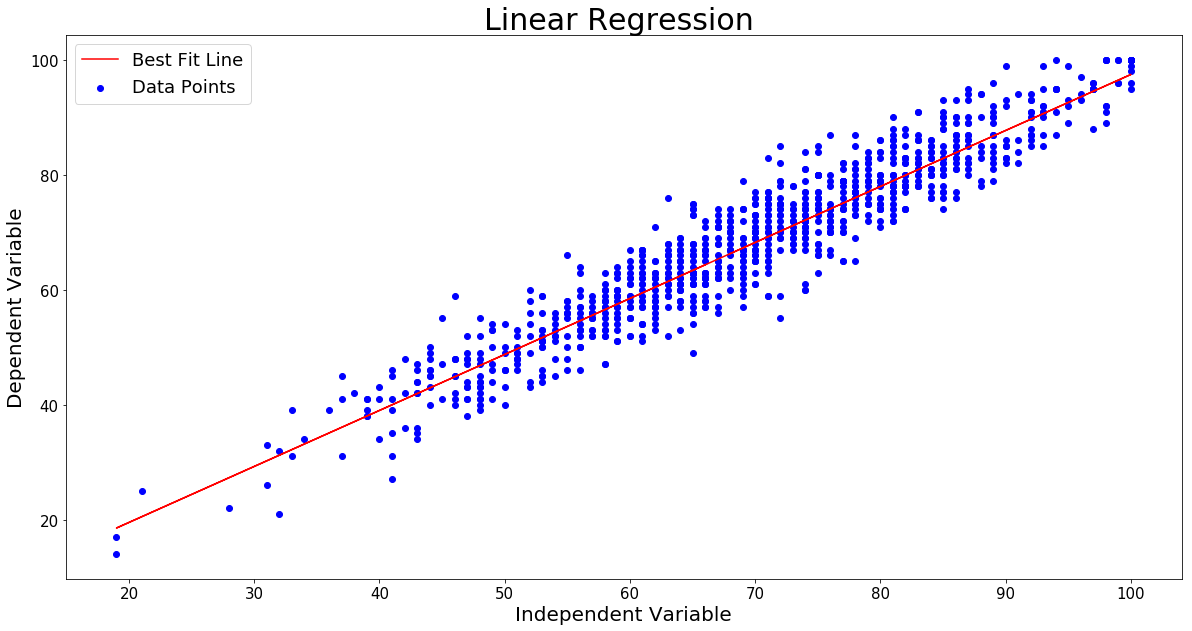

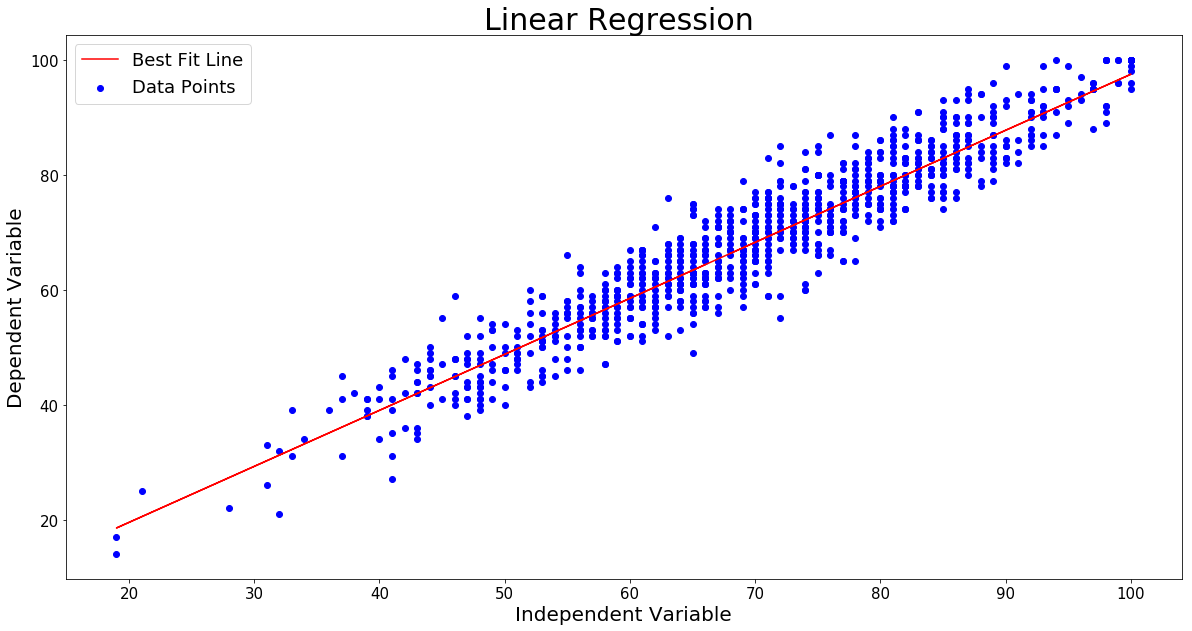

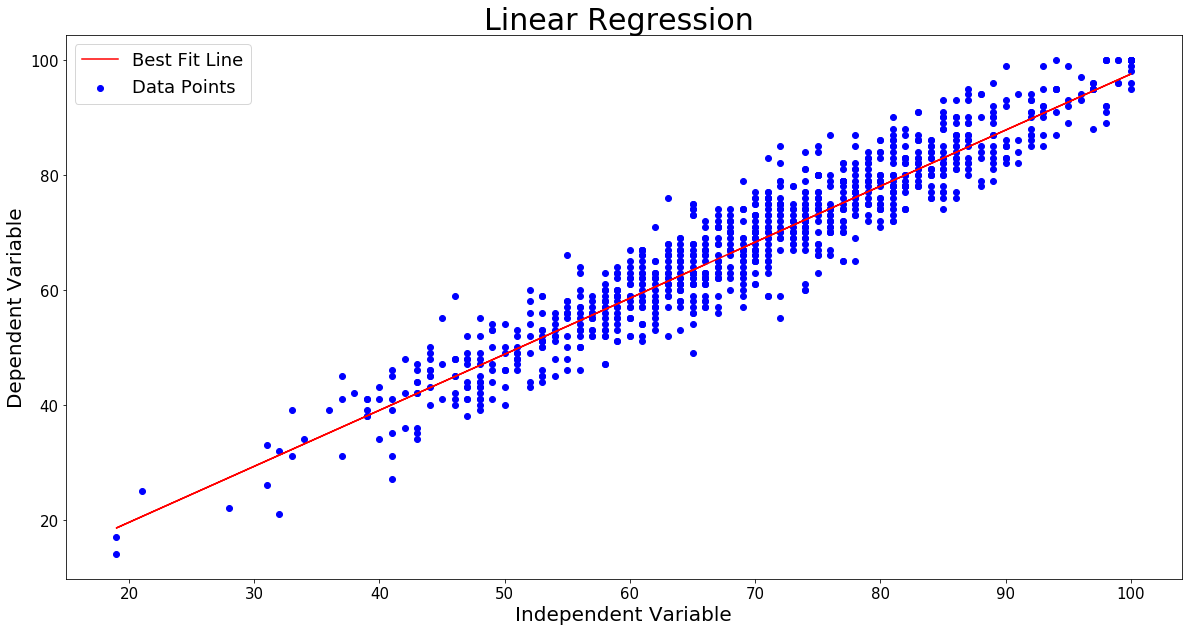

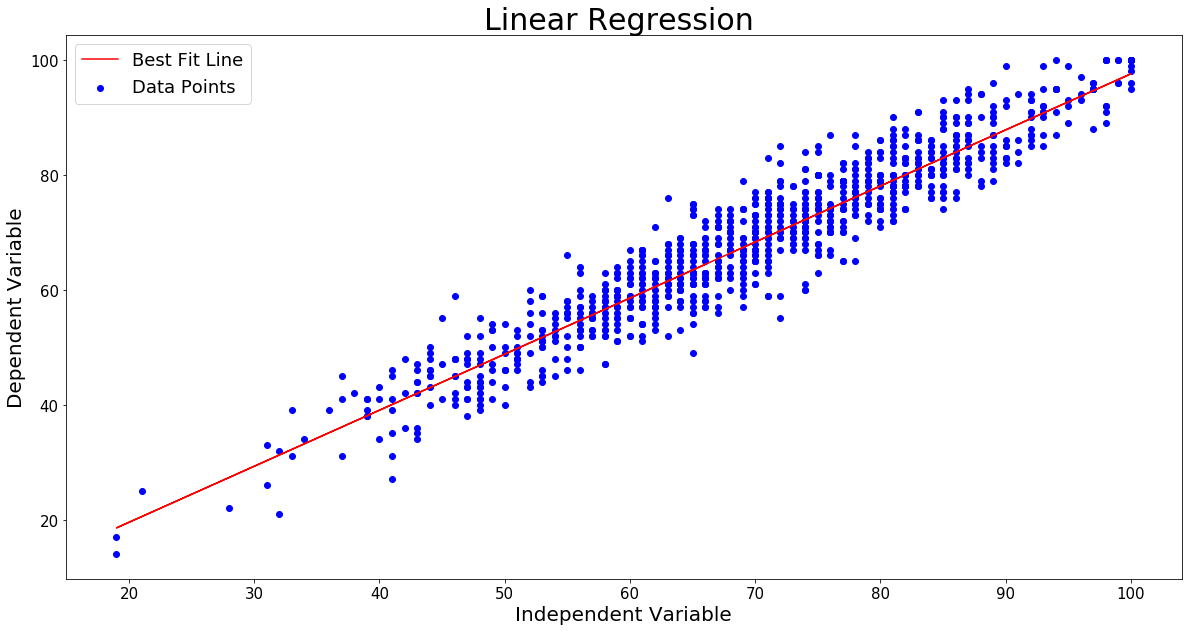

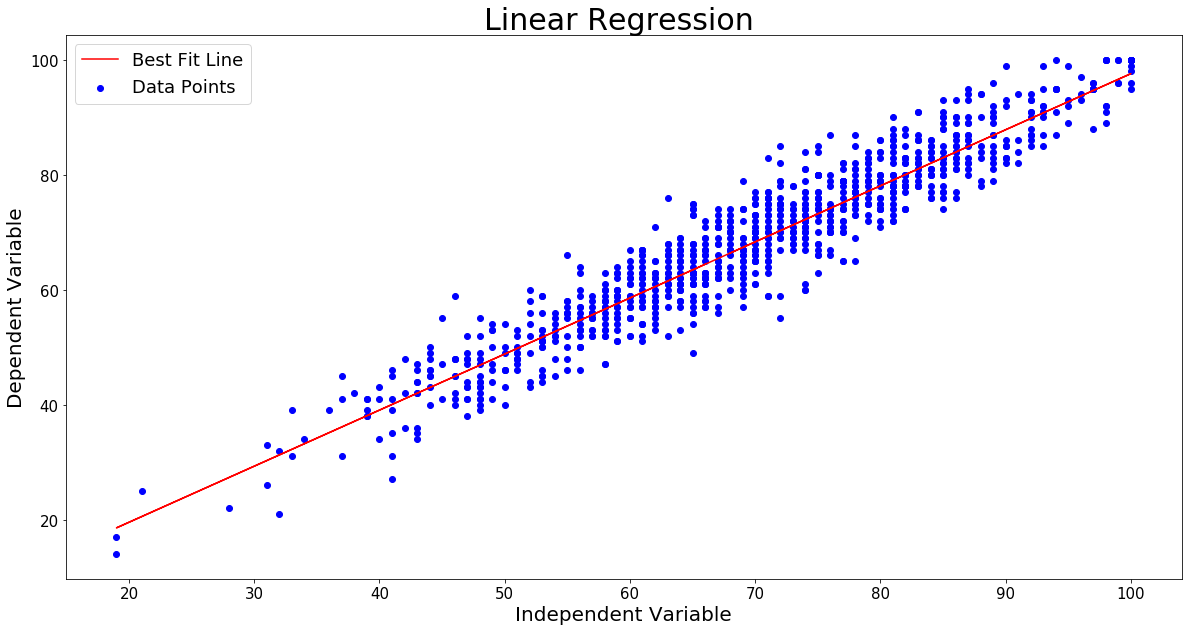

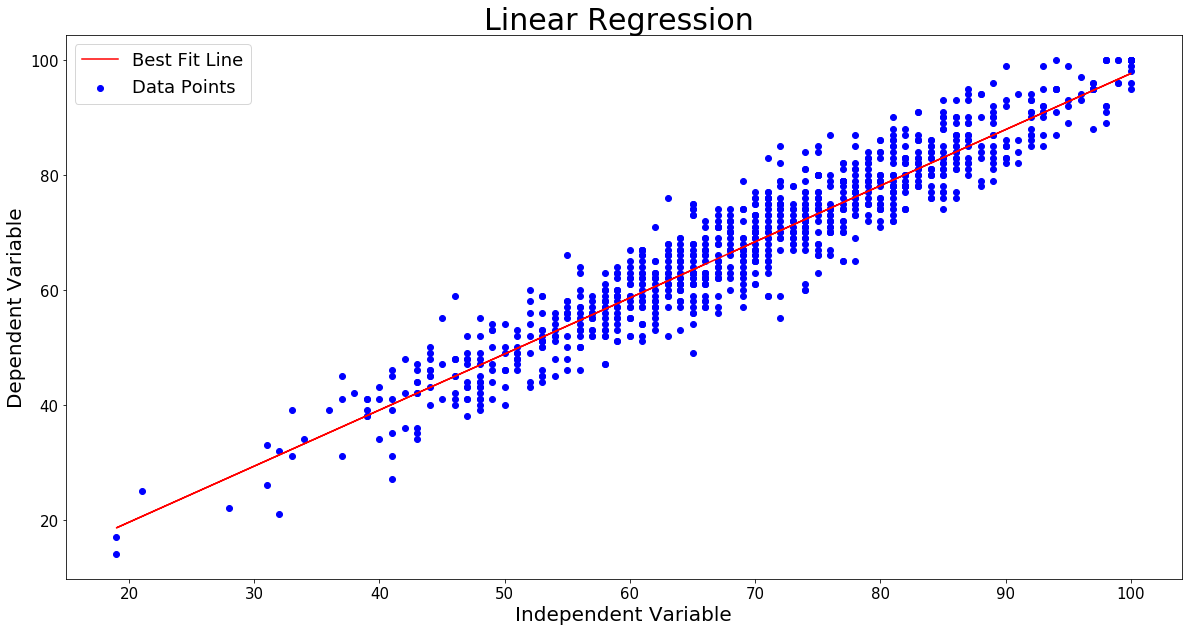

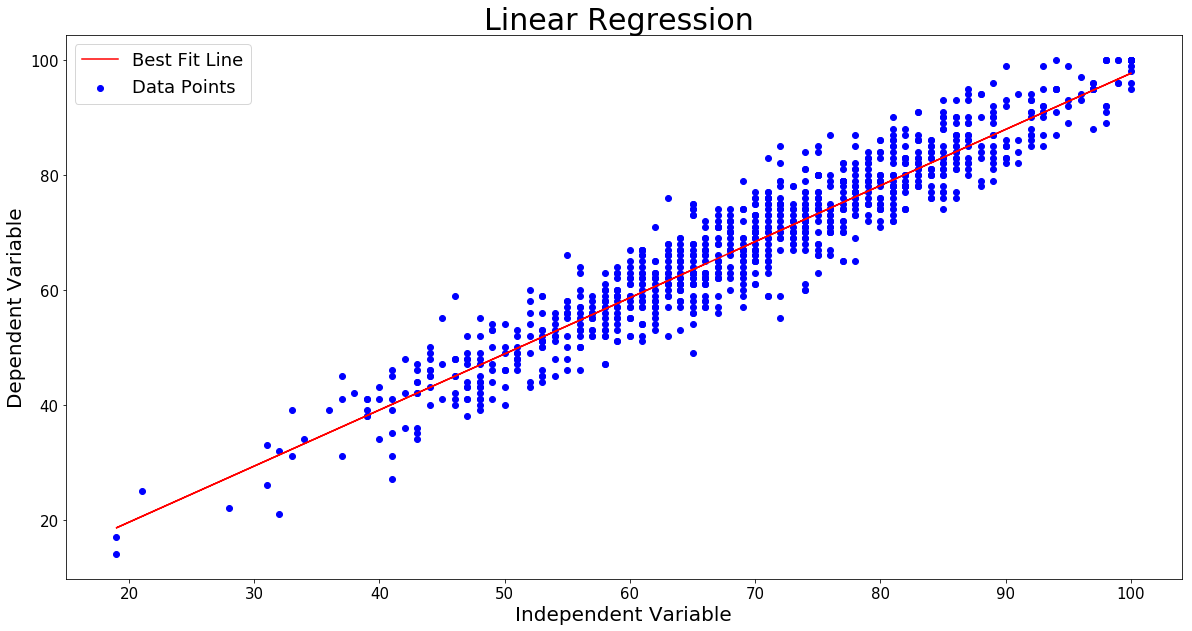

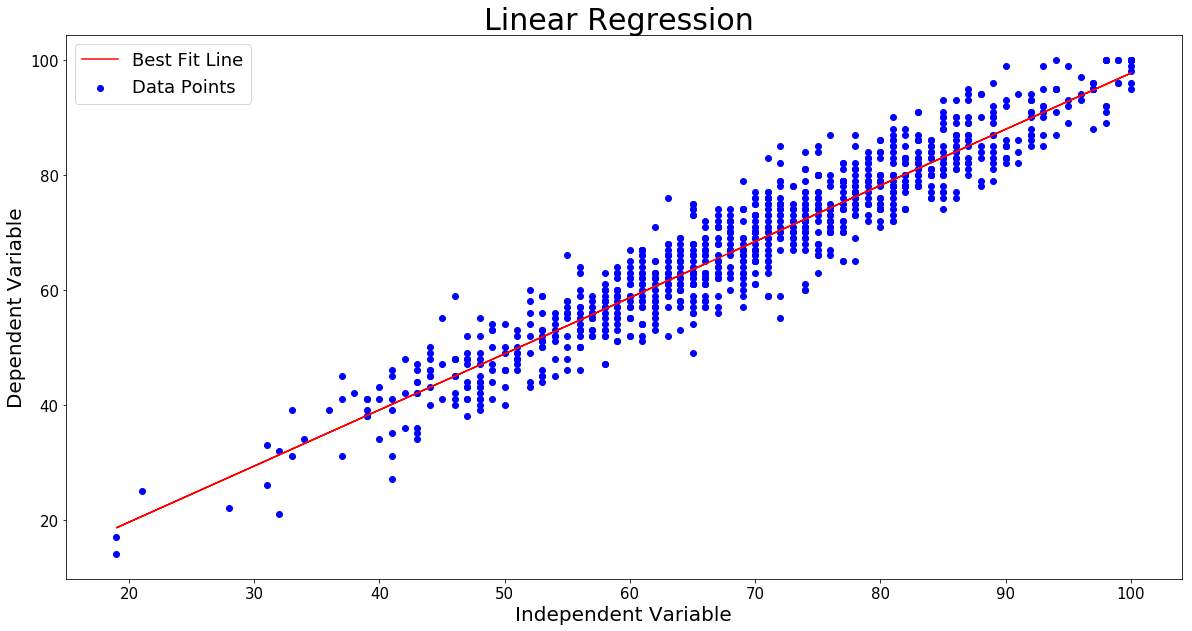

[0.0133686  0.97693688]


In [10]:
new_weights, cost_history = gradient_descent(X, Y, B, 0.00001, 100)

# Values of weight
print(new_weights)


In [11]:
slope=new_weights[1]
intercept=new_weights[0]
print("The Value of slope and intercept are {},{}  ".format(slope,intercept))

The Value of slope and intercept are 0.9769368793910503,0.013368596546312757  


In [12]:
# R-Squared Value Calculation
ss_t = 0
ss_r = 0

Y_mean=np.mean(Y)
for i in range(num):
    y_pred = intercept + slope * x[i]
    ss_t += (Y[i] - Y_mean) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.9060672008910959


### Here the value of R-Squared is close to 1, That we can say that the model is an good one